<a href="https://colab.research.google.com/github/kikiymini/7506R-1C2024-GRUPO02/blob/main/7506R_1C2024_GRUPO02_N1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Organizaci&oacute;n de Datos</center>

<font color='red'>Agregar a la carpeta 7506R-1C2024-GRUPO02 QUE TENGO EN DRIVE el archivo barrio.csv Descargarlo de acá [GCBA](https://data.buenosaires.gob.ar/dataset/barrios/resource/juqdkmgo-191-resource) y subirlo a carpeta /Dataset</font>

#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1: Propiedades en venta</center>

### <center> Grupo 2</center>

## Integrantes:

*   Aramayo Carolina
*   Utrera Maximo Damian
*   Villalba Ana Daniela
*   Fiorilo Roy


# Importación de librerias

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn as sk

from matplotlib import pyplot as plt

from shapely import wkt
from shapely.geometry import MultiPolygon, Polygon, Point

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Lectura de archivo

### Desde google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/7506R-1C2024-GRUPO02/Dataset/properati_argentina_2021.csv'
barrios_file = '/content/drive/MyDrive/7506R-1C2024-GRUPO02/Dataset/barrios.csv'
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Desde maquina local

In [ ]:
# Si se esta trabajando en local, descomentar esta celta y comentar la de arriba
# file_path = './dataset/properati_argentina_2021.csv'
# barrios_file = './dataset/barrios.csv'
# df = pd.read_csv(file_path)

In [ ]:
df.head()

id  start_date    end_date  created_on    latitud  \
0  XZq2dFGxBiboHY3Bo/tqlw==  2021-09-09  2022-01-27  2021-09-09 -38.957632   
1  8afoK+yMH/rnnlYiktwgNA==  2021-09-09  2021-10-23  2021-09-09 -34.888878   
2  iVaG5rBB47dd1Ya4BMXREA==  2021-09-09  2022-03-09  2021-09-09 -32.488717   
3  QE1QVMWKAHWkd0qT0FtPWA==  2021-09-09  2022-01-27  2021-09-09 -34.900165   
4  tJ5lSk7IysG/71OGhacNZA==  2021-09-09  2022-01-27  2021-09-09 -38.954528   

    longitud    place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
0 -68.105443     Neuquén      NaN      NaN      NaN       NaN     Venta   
1 -56.092368  Montevideo      NaN      NaN      NaN       NaN     Venta   
2 -58.257499  Entre Ríos      NaN      NaN      NaN       NaN     Venta   
3 -54.808453   Maldonado      NaN      NaN      NaN       NaN     Venta   
4 -68.041862     Neuquén      NaN      NaN      NaN       NaN     Venta   

  property_type  property_rooms  property_bedrooms  property_surface_total  \
0          Casa             6.0                NaN                     NaN   
1          Casa             4.0                3.0                   193.0   
2          Casa             NaN                NaN                   110.0   
3          Casa             NaN                3.0                     NaN   
4            PH             3.0                2.0                     NaN   

   property_surface_covered  property_price property_currency  \
0                     206.0             NaN               NaN   
1                     193.0        390000.0               USD   
2                      45.0         47000.0               USD   
3                     180.0        400000.0               USD   
4                      98.0        102000.0               USD   

       property_title  
0      Casa - Capital  
1       Casa - Malvín  
2      Casa - Uruguay  
3    Casa - El Chorro  
4  PH - Villa Farrell

# Análisis Exploratorio y Pre-procesamiento de Datos

En esta sección vamos a filtrar y seleccionar los datos a trabajar a lo largo del proyecto.




#### Filtrado

Se deben filtrar
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD).

En la etapa de filtrado, vamos a utilizar la funcionalidad de `str.contains()` de pandas. Este código se basa en la documentación oficial de pandas que puedes encontrar en [este enlace](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html).


In [ ]:
# filtro por tipo de propiedad
# str.contains() se utiliza para buscar patrones de texto dentro de las cadenas en una serie.
# USD: indica el patrón que busco
# case: no distingue entre mayúsculas y minúsculas
# na: no registro valores NaN
filtro = df.property_type.str.contains('Casa|PH|Departamento',case=False,na=False)
ds_propiedades_filtradas = df[filtro]
ds_propiedades_filtradas = ds_propiedades_filtradas[~ds_propiedades_filtradas['property_type'].str.contains('Casa de campo')]

In [ ]:
# filtro propiedades en Capital Federal
filtro = ds_propiedades_filtradas.place_l2.str.contains('Capital Federal',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [ ]:
# filtro propiedades en venta
filtro = ds_propiedades_filtradas.operation.str.contains('Venta',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [ ]:
# filtro por moneda DÓLAR
filtro = ds_propiedades_filtradas.property_currency.str.contains('USD',case=False,na=False)
ds_propiedades_filtradas = ds_propiedades_filtradas[filtro]

In [ ]:
# DataSet filtrado
ds_propiedades_filtradas.head()

id  start_date    end_date  created_on    latitud  \
25  CyZu6IaZgmQYGk8jmPajCg==  2021-09-09  2021-09-26  2021-09-09        NaN   
42  d3Z0MblSb2IMBoOBMGJEEQ==  2021-09-09  2021-09-26  2021-09-09 -34.637319   
43  rL7qPkQnomsMGu2ViS3sBw==  2021-09-09  2021-09-28  2021-09-09 -34.628647   
49  vuX/ccLAMVml4qWRFcOJUA==  2021-09-09  2022-01-05  2021-09-09 -34.610027   
51  ZTtSCeqZ3HUgf5jjwEzRcw==  2021-09-09  2022-03-09  2021-09-09 -34.631621   

     longitud         place_l2 place_l3 place_l4 place_l5  place_l6 operation  \
25        NaN  Capital Federal      NaN      NaN      NaN       NaN     Venta   
42 -58.361124  Capital Federal     Boca      NaN      NaN       NaN     Venta   
43 -58.361871  Capital Federal     Boca      NaN      NaN       NaN     Venta   
49 -58.401934  Capital Federal     Once      NaN      NaN       NaN     Venta   
51 -58.416825  Capital Federal    Boedo      NaN      NaN       NaN     Venta   

   property_type  property_rooms  property_bedrooms  property_surface_total  \
25          Casa             4.0                3.0                   171.0   
42  Departamento             3.0                2.0                    58.0   
43  Departamento             4.0                3.0                    70.0   
49  Departamento             4.0                2.0                     NaN   
51            PH             4.0                2.0                     NaN   

    property_surface_covered  property_price property_currency  \
25                     133.0        210000.0               USD   
42                      55.0         82900.0               USD   
43                      70.0         99000.0               USD   
49                     104.0        146000.0               USD   
51                      73.0        250000.0               USD   

                                 property_title  
25  VENTA CASA LLAVE EN MANO - COSTA ESMERALDA   
42       VENTA TRES AMBIENTES LA BOCA PISO ALTO  
43   Departamento - 4 Ambientes - Catalinas Sur  
49          Venta departamento 4 ambientes Once  
51                                   PH - Boedo

#### Sets de entrenamiento y test

Se debe separar un conjunto de entrenamiento (80%) y un conjunto de test (20%).

En esta sección se utiliza el método `train_test_split()` de Scikit-learn para dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Este método es útil para evaluar el rendimiento de un modelo de aprendizaje automático.

El método `train_test_split()` se puede encontrar en la documentación oficial de Scikit-learn:

- [train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/cross_validation.html)
- [Documentación de train_test_split() en Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split)


In [ ]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
prop_train, prop_test = train_test_split(ds_propiedades_filtradas, train_size=0.8)
print("Propiedades para entrenar:", len(prop_train))
print("Propiedades para testear:", len(prop_test))

Propiedades para entrenar: 75399
Propiedades para testear: 18850


## Exploración Inicial

### Medidas de resumen de las variables cuantitativas del Dataset

In [ ]:
# Creo resumen con describe
prop_train_resumen = prop_train.describe()
# Agrego moda a la tabla resumen
prop_train_resumen.loc['mode'] = prop_train.mode().iloc[0]
prop_train_resumen


latitud      longitud  place_l6  property_rooms  \
count  72422.000000  72422.000000       0.0    74574.000000   
mean     -34.591272    -58.450271       NaN        2.824121   
std        0.168533      0.297990       NaN        1.431607   
min      -41.168947    -71.471192       NaN        1.000000   
25%      -34.615762    -58.466523       NaN        2.000000   
50%      -34.595726    -58.439056       NaN        3.000000   
75%      -34.577395    -58.408934       NaN        4.000000   
max      -24.219827    -54.133330       NaN       40.000000   
mode     -34.541250    -58.472966       NaN        3.000000   

       property_bedrooms  property_surface_total  property_surface_covered  \
count       66573.000000            71521.000000              72762.000000   
mean            2.015787              107.463416                 84.274085   
std             1.135521              908.703867                602.700052   
min            -1.000000               10.000000                  1.000000   
25%             1.000000               45.000000                 40.000000   
50%             2.000000               65.000000                 58.000000   
75%             3.000000              105.000000                 89.000000   
max            70.000000           137000.000000             123000.000000   
mode            1.000000               50.000000                 40.000000   

       property_price  
count    7.539900e+04  
mean     2.269309e+05  
std      3.212201e+05  
min      5.000000e+03  
25%      9.500000e+04  
50%      1.442000e+05  
75%      2.380000e+05  
max      2.140000e+07  
mode     1.100000e+05

En esta tabla resumen se pueden apreciar (en orden):

* El recuento de las entradas validas por atributo.
* El mean de cada atributo.
* La desviacion estandar.
* El valor minimo de cada atributo.
* El percentil 25.
* El percentil 50.
* El percentil 75.
* El valor maximo de cada atributo.
* La moda de cada atributo.

### Cantidad de valores posibles para cada variable cualitativo

In [ ]:
# Mostrar la cantidad de valores posibles para cada variable cualitativa
variables_cualitativas = [
    'property_type',
    'operation',
    'property_currency',
    'start_date',
    'end_date',
    'created_on',
    'place_l2',
    'place_l3',
    'place_l4',
    'place_l5',
    'place_l6',
    ]
prop_train[variables_cualitativas].nunique()

property_type          3
operation              1
property_currency      1
start_date           365
end_date             604
created_on           365
place_l2               1
place_l3              57
place_l4               4
place_l5               0
place_l6               0
dtype: int64

### Frecuencia de los valores posibles de variables cualitativas

En un grafico de barras se veran las frecuencias de los valores posibles para los atributos cualitativos mas importantes y donde hay mas de 1 alternativa, es decir no se tomara por ejemplo *place_l2* porque se sabe que por el filtro el 100% de los valores sera 'Capital Federal', asi mismo para *operation* que sera 'Venta' y *property_currency* que sera 'USD'.

* place_l3 (los 15 mas frecuentes)
* place_l4
* property_type

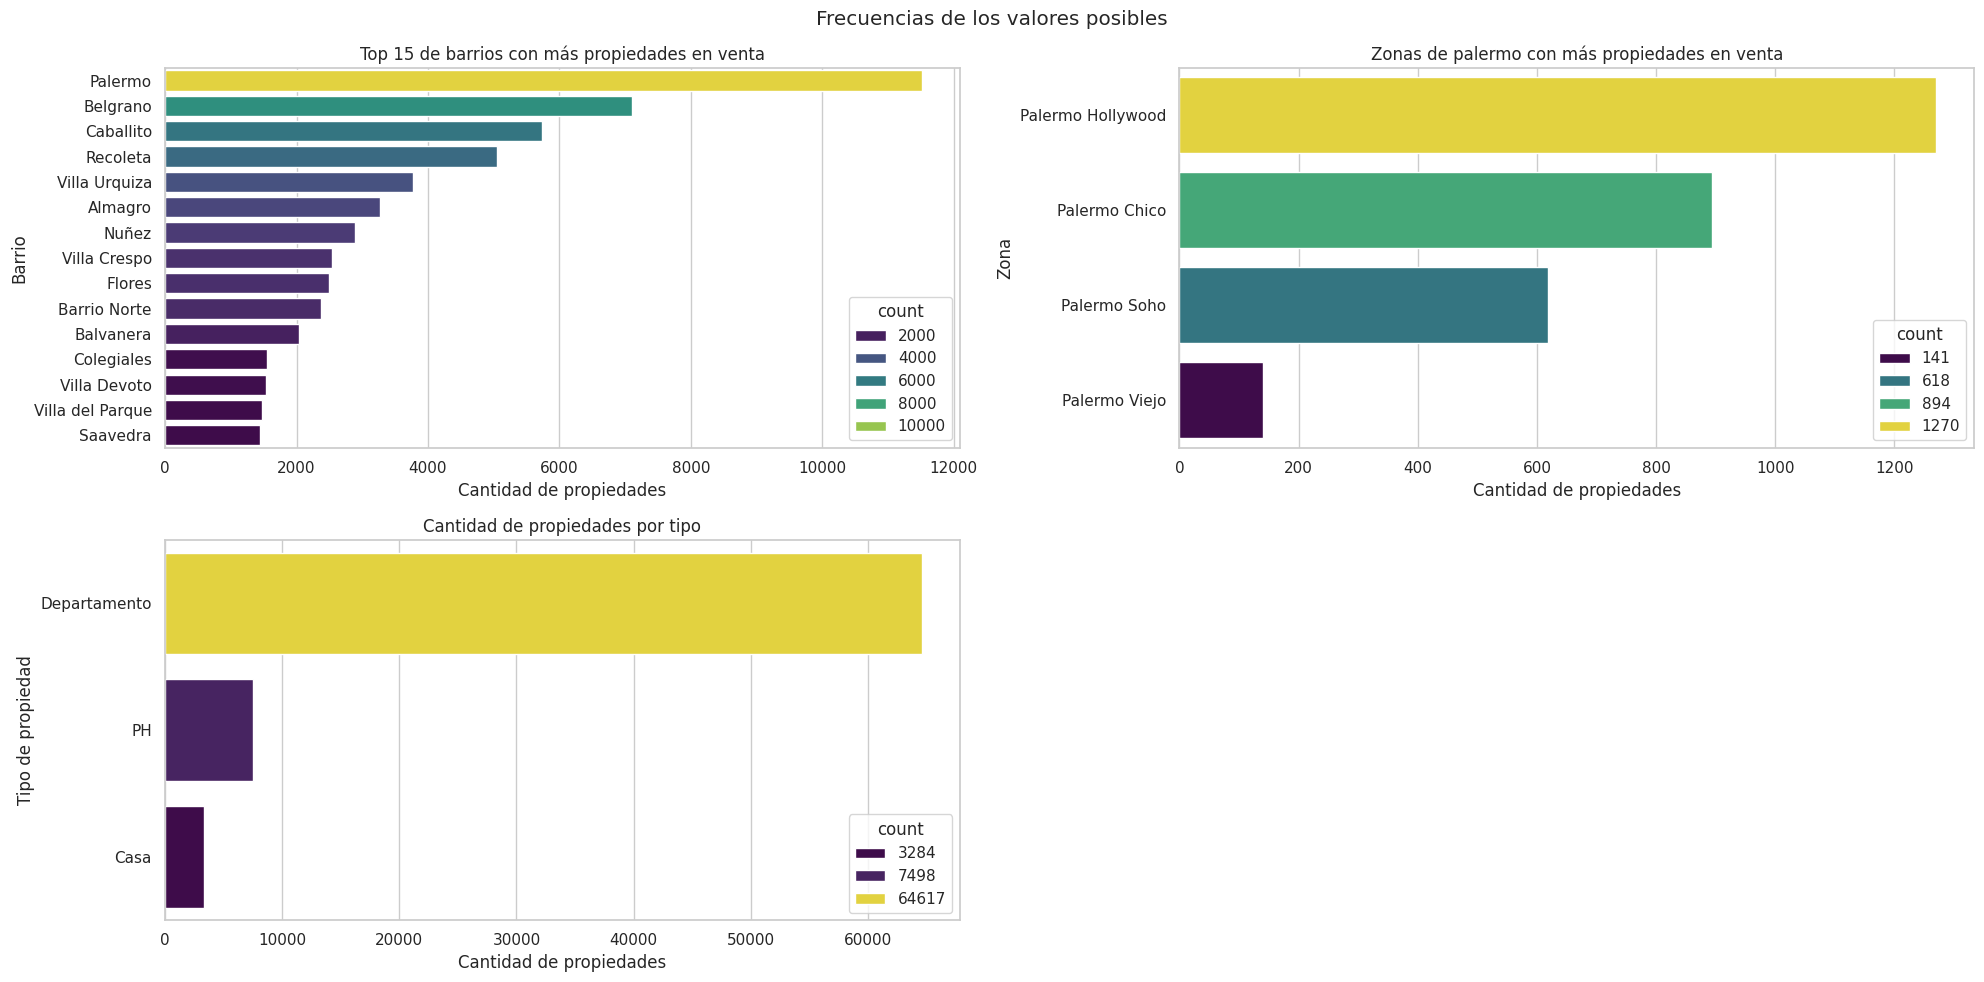

In [ ]:
plt.figure(figsize=(20, 10)) # 10x10 inches
plt.suptitle('Frecuencias de los valores posibles')

# bar plot por place_l3
plt.subplot(2, 2, 1) # 2 filas, 2 columnas, 1 posicion
frecuencias_place_3 = prop_train["place_l3"].value_counts().head(15)
sns.barplot(x=frecuencias_place_3.values, y=frecuencias_place_3.index, hue=frecuencias_place_3, palette='viridis')
plt.title('Top 15 de barrios con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Barrio')

# bar plot por place_l4
plt.subplot(2, 2, 2) # 2 filas, 2 columnas, 2 posicion
frecuencias_place_4 = prop_train["place_l4"].value_counts()
sns.barplot(x=frecuencias_place_4.values, y=frecuencias_place_4.index, hue=frecuencias_place_4, palette='viridis')
# Ya que los 4 valores posibles pertenecen a Palermo
plt.title('Zonas de palermo con más propiedades en venta')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Zona')

# bar plot por property_type
plt.subplot(2, 2, 3) # 2 filas, 2 columnas, 3 posicion
frecuencias_property_type = prop_train["property_type"].value_counts()
sns.barplot(x=frecuencias_property_type.values, y=frecuencias_property_type.index, hue=frecuencias_property_type, palette='viridis')
plt.title('Cantidad de propiedades por tipo')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Tipo de propiedad')

plt.tight_layout()
plt.show()

*Anotacion: todos los place_l4 que no son NaN son zonas de palermo.*

### Variables irrelevantes para el analisis

Las variables que se pueden considerar irrelevantes para el analisis que se les dara son:

* **ID**: no aporta informacion para analizar, sin embargo puede ser util para propositos de manejo de datos.
* **Place_l2**: siempre son capital federal debido al primer filtro
* **Place_l5/l6**: no tienen ningun valor en ningun registro lo que los hace innecesarios.
* **Operation**: debido a el pre-procesamiento de los datos todos los registros tendran una operacion de venta, es decir que este atributo pasa a ser redundante.
* **Property_currency**: similarmente como pasa con *operation* pasa con este otro atributo, es un atributo redundante ya que todos seran USD.
* **Property_title**: no aporta informacion relevante al analisis.
* **Latitud/Longitud**: como ya se tiene el barrio de la propiedad en place_l2 esta informacion puede o no ser relevante dependiendo si se quiere ver la ubicacion exacta o si se quiere validar el barrio.
* **Variables de fechas (start/end/created)**: estas variables podrian ser utiles si se hace un analisis por ejemplo para ver cuales son las fechas donde mas ventas empiezan/terminan/se crean, de lo contrario no es relevante.

#### En sintesis

En base a lo anterior dicho se toma la decision de dejar de contar con los atributos:

* place_l2
* place_l5/l6 (se abordara en la seccion de datos faltantes)
* operation
* property_currency
* property title

In [ ]:
# Nuevo filtro para eliminar dichas columnas
columnas_a_eliminar = ['place_l2', 'operation', 'property_currency', 'property_title']
prop_train.drop(columns = columnas_a_eliminar,inplace=True)
prop_test.drop(columns = columnas_a_eliminar,inplace=True)

### Analisis grafico de distribucion de variables mas relevantes

* distribucion de precios
* distribucion de publicaciones por mes
* distribucion de habitaciones y dormitorios

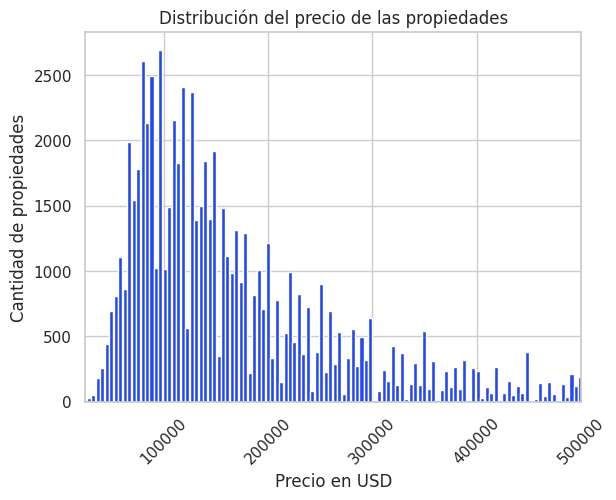

In [ ]:
# plot de distribucion de property_price

plt.hist(data=prop_train,x="property_price",bins=5000, color="#2348F0",rwidth=0.9)
plt.xlim(25000,500000)
plt.xlabel("Precio en USD")
plt.ylabel("Cantidad de propiedades")
plt.title("Distribución del precio de las propiedades")
plt.xticks(rotation=45)

plt.show()

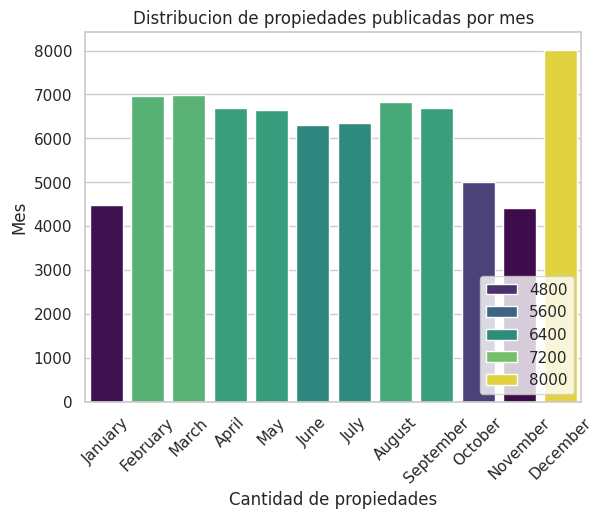

In [ ]:
# bar plot distribucion de ventas por mes

prop_train["created_on"] = pd.to_datetime(prop_train["created_on"])
meses = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
frecuencias_mes = prop_train["created_on"].dt.month_name().value_counts().reindex(meses)
sns.barplot(x=frecuencias_mes.index, y=frecuencias_mes.values, hue=frecuencias_mes, palette='viridis')
plt.legend(loc='lower right')
plt.title('Distribucion de propiedades publicadas por mes')
plt.xlabel('Cantidad de propiedades')
plt.ylabel('Mes')
plt.xticks(rotation=45)

plt.show()

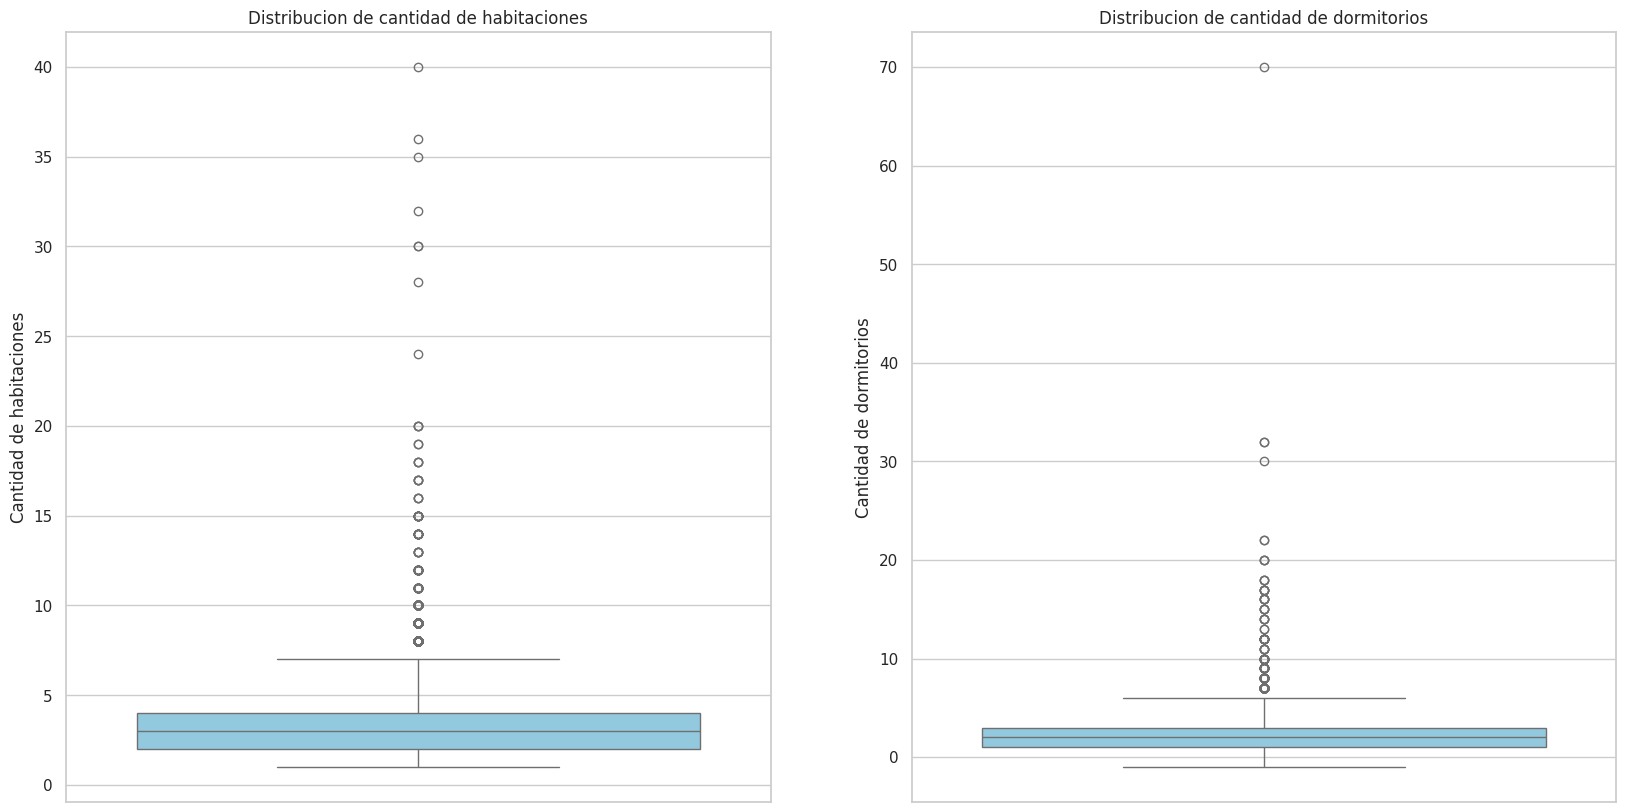

In [ ]:
# Boxplot de property_rooms y property_bedrooms
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, 1 posicion
sns.boxplot(data=prop_train, y='property_rooms', color='skyblue')
plt.title('Distribucion de cantidad de habitaciones')
plt.ylabel('Cantidad de habitaciones')

plt.subplot(1, 2, 2) # 1 fila, 2 columnas, 2 posicion
sns.boxplot(data=prop_train, y='property_bedrooms', color='skyblue')
plt.title('Distribucion de cantidad de dormitorios')
plt.ylabel('Cantidad de dormitorios')

plt.show()

### Analisis de correlaciones existentes entre variables

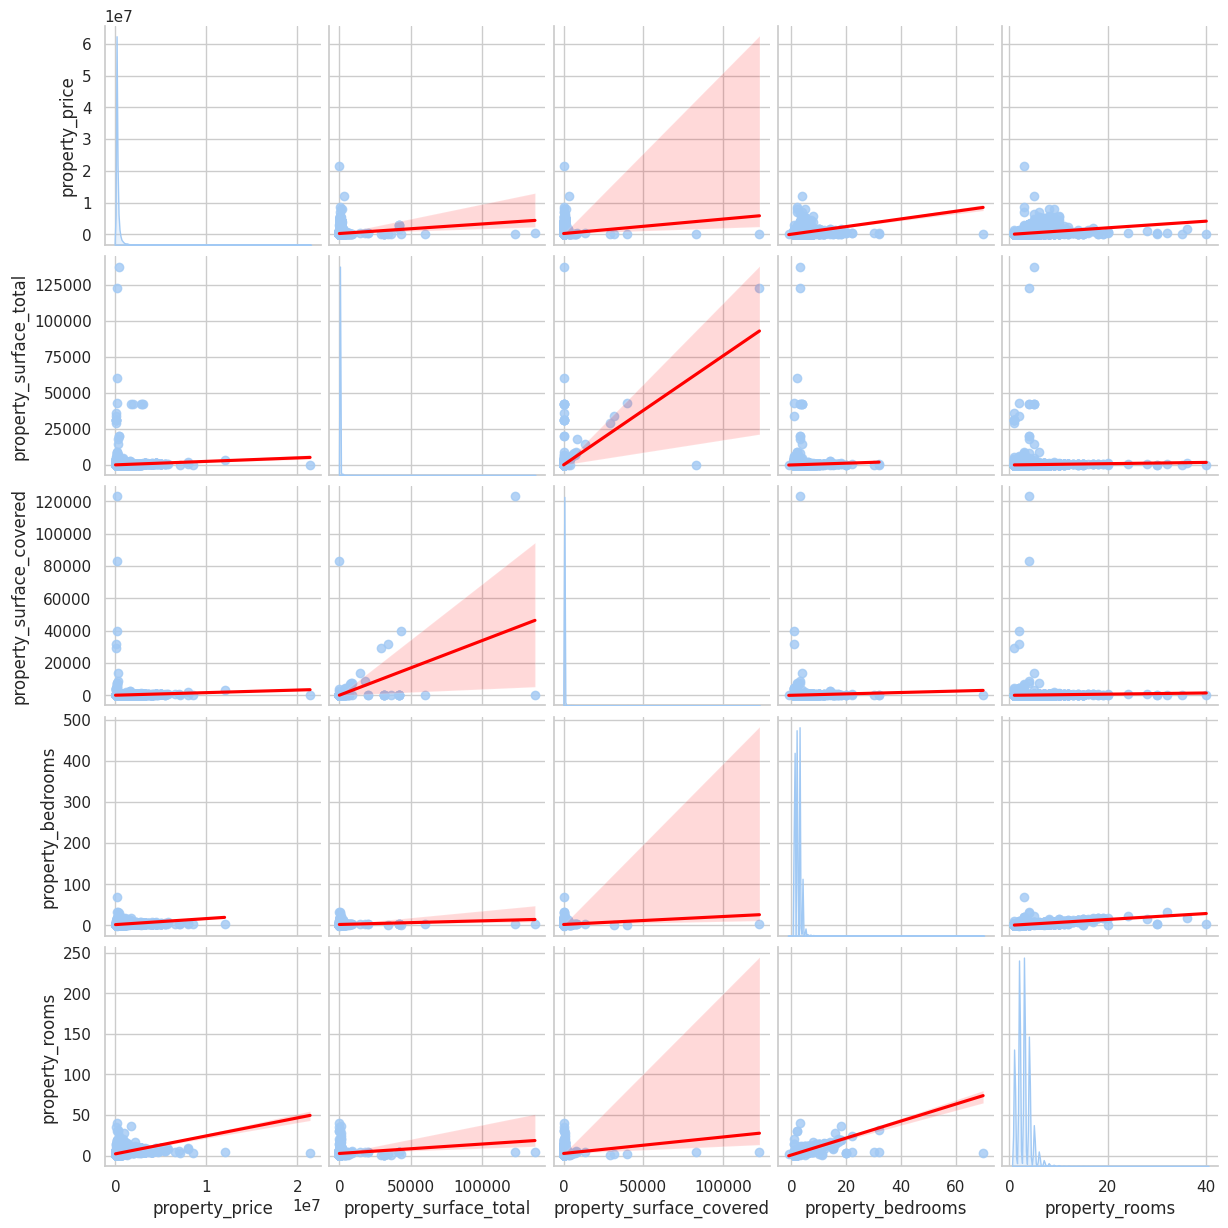

In [ ]:
# pairplot con price, surface_total, surface_covered, bedrooms, rooms
sns.pairplot(prop_train[['property_price', 'property_surface_total', 'property_surface_covered', 'property_bedrooms', 'property_rooms']], diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

Observando este grafico de relaciones se pueden ver que algunas de estas variables tienen claramente una relacion y otras no tanto.

* La relacion entre la **superficie total** y **superficie cubierta** es lineal y acendente, es decir da la impresion que una dependiera de la otra, y si se piensa logicamente esto tiene sentido (si hay mas espacio se cubre mas espacio) aunque no siempre es necesariamente el caso (puede haber una casa pequeña en un terreno grande)
* La relacion entre el **precio** y la cantidad de **habitaciones** y **dormitorios**, en esta se puede notar que a mas habitaciones y/o dormitorios mas aumenta el maximo precio pero no deja de haber precios mas bajos, sin embargo, pasada una cierta cantidad (aproximadamente ~15) el precio deja de aumentar y mas bien se queda constante (entre los valores hasta ~250,000 USD)
* La relacion entre **habitaciones** y **dormitorios** tambien es lineal y acendente, lo cual puede deberse a que cuando una casa tiene muchas habitaciones esta probablemente tenga tambien muchos dormitorios.

*Extra: hay ciertos valores outliers que pueden afectar a la correlacion entre variables por ejemplo una propiedad con mas de 60 habitaciones, estos seran analizados en la seccion de valores atipicos*

Para hacer un analisis mas profundo de estos datos se analiza la *covarianza* y *correlacion* entre las variables usadas en la figura anterior:

In [ ]:
# covarianza y correlacion entre property_surface_total y property_surface_covered
covariance = prop_train['property_surface_total'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_surface_total'].corr(prop_train['property_surface_covered'])
print(f'Surface Total vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_rooms
covariance = prop_train['property_price'].cov(prop_train['property_rooms'])
correlation = prop_train['property_price'].corr(prop_train['property_rooms'])
print(f'Price vs Rooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_bedrooms
covariance = prop_train['property_price'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_price'].corr(prop_train['property_bedrooms'])
print(f'Price vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_total
covariance = prop_train['property_price'].cov(prop_train['property_surface_total'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_total'])
print(f'Price vs Surface Total\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre price y property_surface_covered
covariance = prop_train['property_price'].cov(prop_train['property_surface_covered'])
correlation = prop_train['property_price'].corr(prop_train['property_surface_covered'])
print(f'Price vs Surface Covered\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

# covarianza y correlacion entre property_rooms y property_bedrooms
covariance = prop_train['property_rooms'].cov(prop_train['property_bedrooms'])
correlation = prop_train['property_rooms'].corr(prop_train['property_bedrooms'])
print(f'Rooms vs Bedrooms\nCovariance: {covariance:.2f} & Correlation: {correlation:.2f}\n')

Surface Total vs Surface Covered
Covariance: 289511.71 & Correlation: 0.51

Price vs Rooms
Covariance: 214661.17 & Correlation: 0.48

Price vs Bedrooms
Covariance: 155549.47 & Correlation: 0.42

Price vs Surface Total
Covariance: 24901432.38 & Correlation: 0.09

Price vs Surface Covered
Covariance: 16515698.65 & Correlation: 0.09

Rooms vs Bedrooms
Covariance: 1.31 & Correlation: 0.87



Esto nos dice que en efecto lo previamente observado era el caso. Tambien ahora gracias a este analisis se ve que las relaciones mas debiles son las dadas entre el precio y las superficies totales/cubiertas.

## Visualización de los datos

In [ ]:
# Crear una copia del DataFrame original prop_train
visu_prop_train = prop_train.copy()

# Aplicar el filtro por la columna 'property_rooms' < 6 en la copia
visu_prop_train = visu_prop_train[visu_prop_train['property_rooms'] < 6]

# Filtrar propiedades con precios entre 20,000 y 500,000
visu_prop_train = visu_prop_train[(visu_prop_train['property_price'] > 20000) &
                             (visu_prop_train['property_price'] < 500000)]

# Crear una tabla pivote para calcular el precio promedio por barrio y cantidad de habitaciones
df_visu = visu_prop_train.pivot_table(values='property_price',
                                      index='place_l3',
                                      columns='property_rooms',
                                      aggfunc='mean')

df_visu

#Modificamos un rango para que se vea mejor la visualizacion

property_rooms                  1.0            2.0            3.0  \
place_l3                                                            
Abasto                 67556.361702   94955.539683  129238.461538   
Agronomía              73549.785714  102312.224490  176061.818182   
Almagro                76297.750809   98025.785380  141275.666008   
Balvanera              66175.153631   77704.108153  117674.482026   
Barracas               86334.521739  107778.643443  156878.168605   
Barrio Norte           96790.438642  116261.956240  197178.465662   
Belgrano              104554.554994  145414.366002  214837.386589   
Boca                   59173.684211   70317.741935   95518.417582   
Boedo                  71370.761538   90546.835052  133742.152239   
Caballito              85596.074180  109981.963785  165258.024022   
Catalinas              50500.000000            NaN  127500.000000   
Centro / Microcentro   59808.823529   83727.272727  125230.769231   
Chacarita              83380.230216  109003.672222  179909.141892   
Coghlan                87302.703704  124187.016807  196028.316327   
Colegiales             88436.914498  129227.881210  191761.578829   
Congreso               66396.271930   82052.741379  115855.780702   
Constitución           60949.699029   67510.797872   95309.648352   
Flores                 71606.338843   90821.006431  133444.192960   
Floresta               66678.130081   86883.583333  129195.737037   
Las Cañitas                     NaN  178166.666667            NaN   
Liniers                65128.787234   87267.079755  136245.335714   
Mataderos              64256.408163   90930.825000  133597.222772   
Monserrat              75908.766129   84774.781395  118124.404348   
Monte Castro           79988.255814   97117.483333  153554.463415   
Nuñez                 102939.762557  140916.831795  210937.546218   
Once                   52469.767442   75998.684211  115414.814815   
Palermo               104639.106787  150295.034185  236955.059457   
Parque Avellaneda      71261.538462   81175.862069  113890.816327   
Parque Centenario      80885.714286  104018.555556  144942.857143   
Parque Chacabuco       78095.809917   95328.680952  141811.383459   
Parque Chas            77775.891892  108802.409639  183523.205128   
Parque Patricios       67391.767123   91390.690265  110460.279330   
Paternal               77772.243902   92098.568493  128506.181818   
Pompeya                46672.727273   59835.714286   93763.333333   
Puerto Madero         254701.136986  333706.185668  400992.653061   
Recoleta               97048.981767  127643.391344  228261.978706   
Retiro                 99095.483516  103373.084746  178680.270270   
Saavedra               94528.121406  119712.004808  184491.942559   
San Cristobal          62321.772727   78200.324723  113180.266447   
San Nicolás            59706.948220   79408.154088  116553.964286   
San Telmo              79530.435065  102724.464968  142263.206406   
Tribunales             58532.642857   89936.363636  112495.454545   
Velez Sarsfield        71188.461538   93067.346939  143462.745098   
Versalles              77803.333333  104982.549020  153975.000000   
Villa Crespo           82196.029126  106144.143791  153238.074766   
Villa Devoto           93096.130841  114361.190955  180359.992263   
Villa General Mitre    70033.333333   86054.375000  131996.460177   
Villa Lugano           58964.285714   83731.833333   89078.151515   
Villa Luro             71812.820513   93230.433121  137599.970060   
Villa Ortuzar          77693.805310  100206.206897  184934.934426   
Villa Pueyrredón       79451.275229  110200.188119  162537.436620   
Villa Real             81500.000000  104681.250000  138417.142857   
Villa Riachuelo                 NaN   95000.000000   91557.142857   
Villa Santa Rita       77575.442308   97667.755814  142649.210526   
Villa Soldati          53000.000000   67000.000000   89937.500000   
Villa Urquiza          91975.344668  123849.579656  190264.495205  

Text(70.93749999999999, 0.5, 'Zonas de Capital Federal')

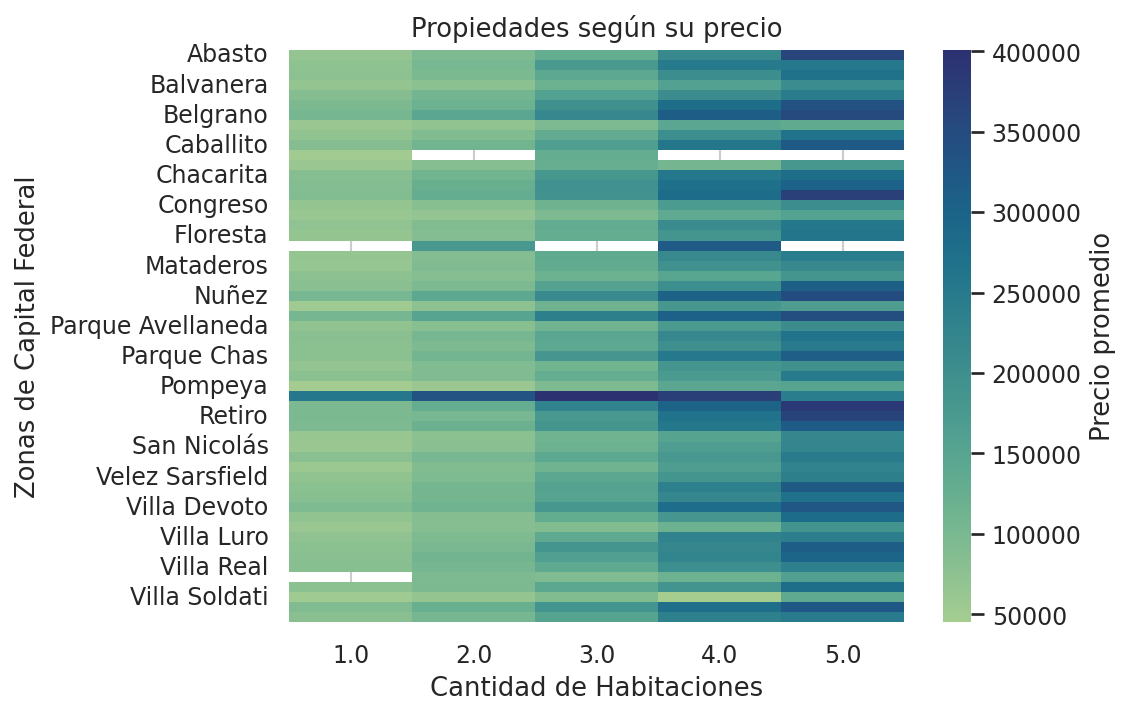

In [ ]:
# Nueva figura con un dpi de 155 para mejorar la calidad de la visualización
plt.figure(dpi=155)

# Establecer el título de la visualización
plt.title("Propiedades según su precio")

# Crear un heatmap utilizando Seaborn con los datos de df_visu
sns.heatmap(df_visu, square=False, cmap='crest', fmt=".0f", cbar_kws={'label': 'Precio promedio'})

# Establecer etiquetas para los ejes x e y
plt.xlabel("Cantidad de Habitaciones")
plt.ylabel("Zonas de Capital Federal")

# Heatmap que muestra el precio promedio por propiedad tomando en cuenta la cantidad de habitaciones y su ubicación

La visualización presentada es un mapa de calor (heatmap) que muestra el precio promedio de las propiedades en función de la cantidad de habitaciones y su ubicación en diferentes zonas de la Ciudad Autónoma de Buenos Aires (CABA). Al observar el heatmap, es posible identificar patrones en los precios según la ubicación y el tamaño de la propiedad. Por ejemplo, puede haber áreas donde las propiedades con más habitaciones tienden a tener precios más altos, mientras que en otras zonas los precios son más uniformes independientemente del tamaño de la propiedad.La visualización proporciona una manera efectiva de entender cómo se relacionan el precio promedio de las propiedades, la cantidad de habitaciones y la ubicación en diferentes áreas de la Ciudad Autónoma de Buenos Aires. Ayuda a los interesados a tomar decisiones informadas sobre la compra o inversión en propiedades en la ciudad.

<ipython-input-325-ee8e753002fe>:6: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



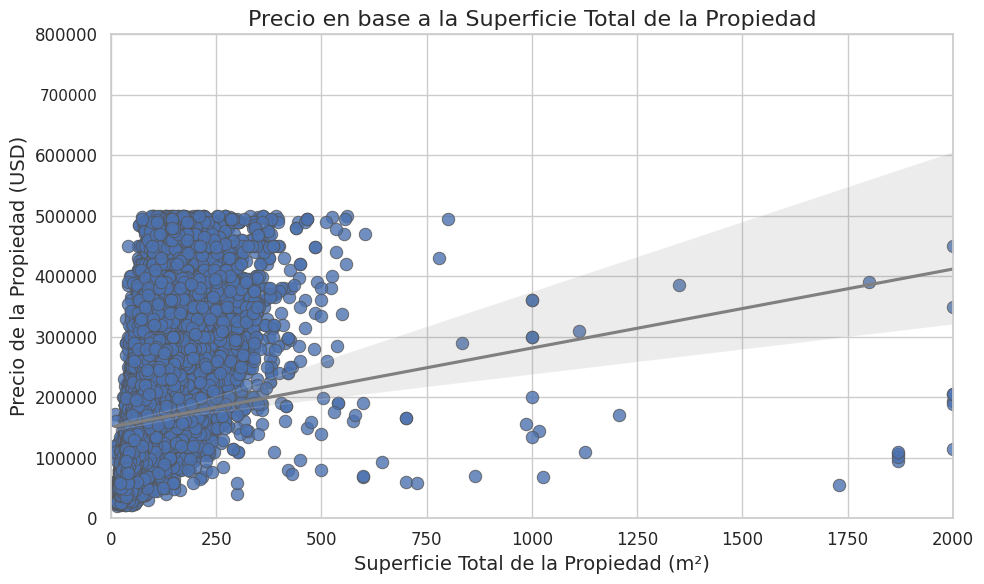

In [ ]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el scatter plot utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
                x='property_surface_total', y='property_price', palette='pastel', s=80, alpha=0.8)

# Agregar una línea de regresión
sns.regplot(data=visu_prop_train[visu_prop_train['property_surface_total'] < 20000],
            x='property_surface_total', y='property_price', scatter=False, color='gray')

# Ajustar título y etiquetas
plt.title('Precio en base a la Superficie Total de la Propiedad', fontsize=16)
plt.xlabel('Superficie Total de la Propiedad (m²)', fontsize=14)
plt.ylabel('Precio de la Propiedad (USD)', fontsize=14)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el rango de los ejes
plt.xlim(0, 2000)  # Establecer el rango x hasta 20,000
plt.ylim(0, 800000)
# Añadir sombreado alrededor de las burbujas
plt.gca().collections[0].set_edgecolor("#555555")

plt.tight_layout()
plt.show()

Esta visualización muestra un diagrama de dispersión (scatter plot) que relaciona el precio de la propiedad con su superficie total, con el agregado de una línea de regresión para visualizar la tendencia general de los datos.La línea de regresión trazada en el gráfico muestra la tendencia general de los datos. Permite ver si hay una relación lineal entre el precio y la superficie total de la propiedad. En este caso, la pendiente de la línea de regresión indica la tasa de cambio en el precio para cada unidad adicional de superficie.Cada punto en el diagrama de dispersión representa una propiedad individual, y su posición relativa en el gráfico indica su precio y superficie total. Esto facilita la identificación de propiedades que pueden estar por encima o por debajo de la tendencia general.

In [ ]:
import plotly.express as px
import pandas as pd

# Calcular el precio promedio por barrio
precio_promedio_por_barrio = visu_prop_train.groupby('place_l3')['property_price'].mean().reset_index()

# Crear el gráfico de burbujas agrupadas
fig = px.scatter(precio_promedio_por_barrio,
                 x='place_l3', y='property_price',
                 size='property_price',
                 color='place_l3',
                 hover_name='place_l3',
                 size_max=50,
                 title='Precio promedio por barrio',
                 labels={'place_l3': 'Barrio', 'property_price': 'Precio promedio'})
fig.show()

Esta visualización muestra un gráfico de burbujas agrupadas que representa el precio promedio de las propiedades en cada barrio.El gráfico de burbujas agrupadas proporciona una representación visual del precio promedio de las propiedades en cada barrio de interés. Cada burbuja representa un barrio, y el tamaño de la burbuja indica el precio promedio de las propiedades en ese barrio. Los colores de las burbujas pueden indicar diferentes barrios para facilitar la identificación visual, las burbujas más grandes representan barrios con precios promedio más altos, mientras que las burbujas más pequeñas representan barrios con precios promedio más bajos.El gráfico de burbujas agrupadas es interactivo, lo que permite a los usuarios explorar los datos con mayor detalle al pasar el cursor sobre las burbujas para ver información adicional, como el nombre del barrio y el precio promedio.

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Filtramos los Nan de latitud ya que es impresindible contar con este dato para asignarlo al mapa
visu_prop_train = visu_prop_train.dropna(subset=['latitud'])

def generar_mapa_con_registros_por_barrio(df):
    """
    Función para generar un mapa con los registros por barrio.

    Parámetros:
    - visu_prop_train: DataFrame que contiene los datos de las propiedades filtradas.

    Devuelve:
    - mapa: Objeto del mapa de Folium.
    """
    # Coordenadas del centro de la Ciudad Autónoma de Buenos Aires
    latitud_caba = -34.6037
    longitud_caba = -58.3816

    # Crear el mapa centrado en CABA
    mapa = folium.Map(location=[latitud_caba, longitud_caba], zoom_start=12)

    # Agregar un grupo de marcadores
    marker_cluster = MarkerCluster().add_to(mapa)

    # Contar la cantidad de registros por barrio
    registros_por_barrio = visu_prop_train['place_l3'].value_counts()

    # Agregar marcadores en el mapa para cada barrio
    for barrio, cantidad in registros_por_barrio.items():
        latitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['latitud'].iloc[0]
        longitud = visu_prop_train[visu_prop_train['place_l3'] == barrio]['longitud'].iloc[0]

        folium.Marker(location=[latitud, longitud],
                      tooltip=f"{barrio}: {cantidad} Propiedad en Venta").add_to(marker_cluster)

    return mapa

# Generar el mapa con los registros por barrio
mapa = generar_mapa_con_registros_por_barrio(visu_prop_train)

# Mostrar el mapa
mapa

La visualización proporciona un mapa interactivo que muestra la ubicación de las propiedades en venta en la Ciudad Autónoma de Buenos Aires (CABA), agrupadas por barrio.Cada marcador en el mapa representa una propiedad, y su ubicación específica está determinada por las coordenadas de latitud y longitud proporcionadas en los datos.Los grupos de marcadores en el mapa indican la concentración de propiedades en cada barrio, lo que puede proporcionar información sobre la popularidad y la demanda de viviendas en diferentes áreas de CABA.

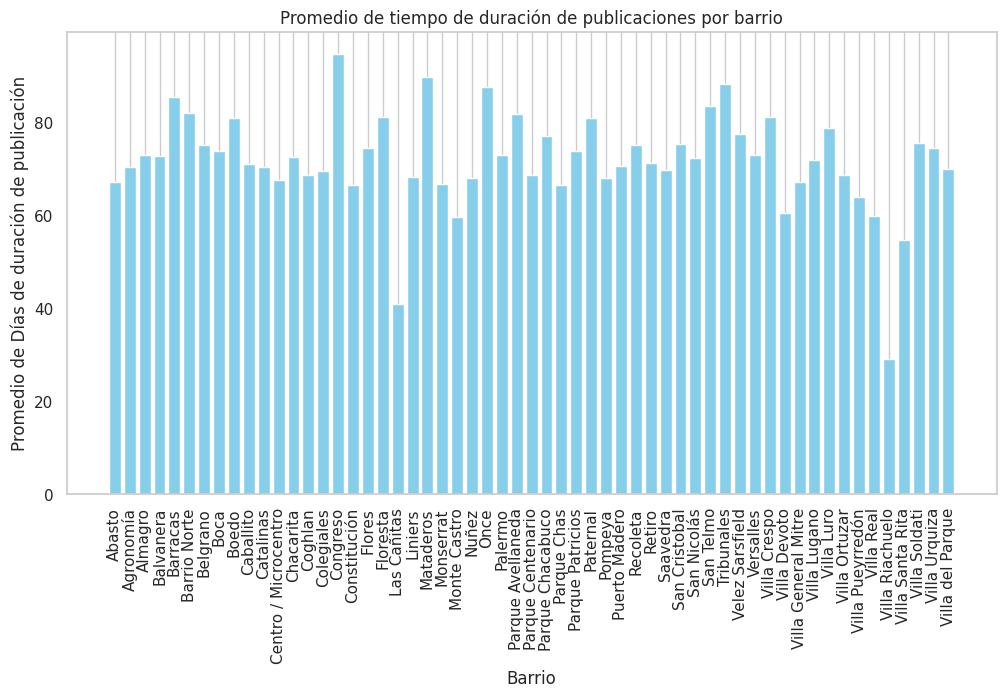

In [ ]:
# Convertir las fechas a tipo datetime si no están en ese formato
visu_prop_train['start_date'] = pd.to_datetime(visu_prop_train['start_date'], errors='coerce')
visu_prop_train['end_date'] = pd.to_datetime(visu_prop_train['end_date'], errors='coerce')

# Calcular la duración de cada publicación
visu_prop_train['duracion_publicacion'] = (visu_prop_train['end_date'] - visu_prop_train['start_date']).dt.days

# Agrupar por barrio y calcular el promedio de duración de las publicaciones
promedio_duracion_por_barrio = visu_prop_train.groupby('place_l3')['duracion_publicacion'].mean().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(promedio_duracion_por_barrio['place_l3'], promedio_duracion_por_barrio['duracion_publicacion'], color='skyblue')
plt.title('Promedio de tiempo de duración de publicaciones por barrio')
plt.xlabel('Barrio')
plt.ylabel('Promedio de Días de duración de publicación')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.show()

Esta visualización presenta un gráfico de barras que muestra el promedio de tiempo de duración de las publicaciones por barrio en la Ciudad Autónoma de Buenos Aires (CABA). Cada barra en el gráfico representa un barrio específico, y su altura indica el promedio de días que las publicaciones permanecen activas en ese barrio.La visualización permite comparar fácilmente la duración promedio de las publicaciones entre diferentes barrios de la ciudad. Las barras más altas indican que las publicaciones en ese barrio tienden a permanecer activas por más tiempo, mientras que las barras más cortas indican una duración promedio más corta de las publicaciones.Los barrios con barras más altas pueden indicar áreas de la ciudad donde la demanda de propiedades es más alta o donde las propiedades tienden a permanecer en el mercado por períodos más prolongados. Esto puede ser útil para comprender las dinámicas del mercado inmobiliario en diferentes áreas de la ciudad.

## Datos Faltantes
En esta sección se va a realizar el análsis de la presencia de datos faltantes

### Análisis de datos faltantes a nivel columna

Realizar análisis de datos faltantes a nivel de columna. Graficar para cada variable el porcentaje de datos faltantes con respecto al total del dataset.

#### Análisis previo

In [ ]:
ds_train = prop_train
ds_test = prop_test

In [ ]:
ds_train.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l3', 'place_l4', 'place_l5', 'place_l6', 'property_type',
       'property_rooms', 'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price'],
      dtype='object')

Para iniciar, vamos a analizar la cantidad de datos faltantes por columna y su porcentaje

In [ ]:
def obtener_filas(ds):
  return ds.shape[0]

def obtener_columnas(ds):
  return ds.shape[1]

In [ ]:
filas = obtener_filas(ds_train)
columnas = obtener_columnas(ds_train)
print("El dataset de entrenamiento tiene {} filas y {} columnas".format(filas,columnas))

El dataset de entrenamiento tiene 75399 filas y 16 columnas


Obtengo el promedio de cada columna que contiene datos nulos

In [ ]:
def obtener_promedio_nulos(ds):
  return ds.isna().sum() / obtener_filas(ds) * 100

promedio_datos_nulos = obtener_promedio_nulos(ds_train)
promedio_datos_nulos

id                            0.000000
start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       3.948328
longitud                      3.948328
place_l3                      0.440324
place_l4                     96.123291
place_l5                    100.000000
place_l6                    100.000000
property_type                 0.000000
property_rooms                1.094179
property_bedrooms            11.705726
property_surface_total        5.143304
property_surface_covered      3.497394
property_price                0.000000
dtype: float64

Muestro la cantidad de datos nulos por columna

In [ ]:
def obtener_cantidad_nulos_ds(ds):
  return ds.isna().sum()

cant_datos_nulos = obtener_cantidad_nulos_ds(ds_train)
cant_datos_nulos

id                              0
start_date                      0
end_date                        0
created_on                      0
latitud                      2977
longitud                     2977
place_l3                      332
place_l4                    72476
place_l5                    75399
place_l6                    75399
property_type                   0
property_rooms                825
property_bedrooms            8826
property_surface_total       3878
property_surface_covered     2637
property_price                  0
dtype: int64

Grafico esta relación

<ipython-input-335-f848825aef01>:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



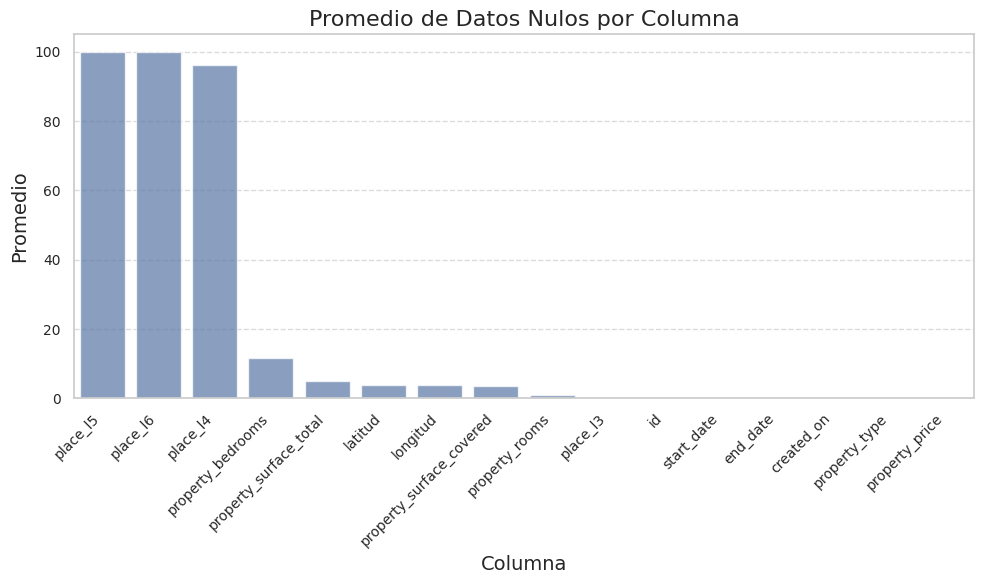

In [ ]:
ds_porcentaje = promedio_datos_nulos

# Ordenar los valores en orden descendente
ds_porcentaje = ds_porcentaje.sort_values(ascending = False)

# Establecer el estilo del gráfico
sns.set_style("whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Graficar el gráfico de barras
bar_plot = sns.barplot(x=ds_porcentaje.index, y=ds_porcentaje.values, alpha=0.7)

# Agregar título y etiquetas
bar_plot.set_title("Promedio de Datos Nulos por Columna", fontsize=16)
bar_plot.set_xlabel("Columna", fontsize=14)
bar_plot.set_ylabel("Promedio", fontsize=14)

# Rotar etiquetas del eje x para una mejor legibilidad
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, horizontalalignment='right')

# Agregar líneas de la cuadrícula y ajustar el tamaño de la fuente
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

Entonces los datos que debo analizar son:

In [ ]:
def obtener_cantidad_nulos(ds):
  promedio_datos_nulos = obtener_promedio_nulos(ds)
  promedio_datos_nulos.sort_values(ascending = False,inplace=True)
  filtro = promedio_datos_nulos!=0
  return promedio_datos_nulos[filtro] if not promedio_datos_nulos[filtro].empty else 'No existen valores NaN'

obtener_cantidad_nulos(ds_train)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.123291
property_bedrooms            11.705726
property_surface_total        5.143304
latitud                       3.948328
longitud                      3.948328
property_surface_covered      3.497394
property_rooms                1.094179
place_l3                      0.440324
dtype: float64

In [ ]:
obtener_cantidad_nulos(ds_test)

place_l5                    100.000000
place_l6                    100.000000
place_l4                     96.180371
property_bedrooms            11.464191
property_surface_total        5.124668
latitud                       3.994695
longitud                      3.994695
property_surface_covered      3.803714
property_rooms                1.161804
place_l3                      0.450928
dtype: float64

#### Elimino places (place_l6, place_l5, place_l4)

Al ver el gráfico y el análisis previo de nulos. Puedo eliminar las columnas ```place_l6```, ```place_l5``` y ```place_l4```, pues tienen en su totalidad de datos nulos. El ```place_l4``` tiene casi su totalidad de nulos.

Consideramos que las columnas ```place_l6```, ```place_l5``` son datos faltantes de tipo MCAR

In [ ]:
columnas = ['place_l6','place_l5','place_l4']
ds_train.drop(columns=columnas, inplace=True)
ds_test.drop(columns=columnas, inplace=True)

In [ ]:
ds_train.head()

id  start_date    end_date created_on  \
308580  2tDcWrPW06OU2VTLqlOaBw==  2021-04-28  2021-05-01 2021-04-28   
368781  y3AnoNhKDUkaPR22VUfb3Q==  2021-05-06  2021-06-05 2021-05-06   
449679  SZLiwyscxtmDnQUa+AgGpQ==  2021-12-16  2022-02-09 2021-12-16   
428026  QOOeCO6nYiu9hgF66L7n7Q==  2021-12-16  2022-02-09 2021-12-16   
137647  u74hGoL0NcwJtn6RvwikCg==  2021-01-22  2021-03-08 2021-01-22   

          latitud   longitud  place_l3 property_type  property_rooms  \
308580 -34.582632 -58.421627   Palermo  Departamento             4.0   
368781 -34.562958 -58.446183  Belgrano  Departamento             3.0   
449679 -34.592420 -58.384979    Retiro  Departamento             4.0   
428026 -34.598637 -58.389624  Recoleta  Departamento             3.0   
137647 -34.591705 -58.395967  Recoleta  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
308580                3.0                    75.0                      74.0   
368781                2.0                   171.0                     171.0   
449679                3.0                    90.0                      90.0   
428026                2.0                    68.0                      61.0   
137647                3.0                   106.0                     106.0   

        property_price  
308580        165000.0  
368781       1200000.0  
449679        210000.0  
428026        170000.0  
137647        360000.0

In [ ]:
ds_test.head()

id  start_date    end_date  created_on  \
204053  SKQfJLAoW0xqWTAzOy+pYg==  2021-05-10  2021-06-05  2021-05-10   
194510  hInPSiHerbiDxcTYA9WXCA==  2021-11-02  2022-01-27  2021-11-02   
398572  GKFrRcASEB4CTIaW0mKVRw==  2021-02-13  2021-03-01  2021-02-13   
92904   yb6XvVd10Xq5cSQSfnyYEw==  2021-08-03  2021-08-08  2021-08-03   
257125  jl7luTfL+r9nWwzi6zZhDg==  2021-11-03  2022-02-02  2021-11-03   

          latitud   longitud          place_l3 property_type  property_rooms  \
204053        NaN        NaN          Belgrano  Departamento             1.0   
194510 -34.582420 -58.498516  Villa Pueyrredón  Departamento             3.0   
398572 -34.594870 -58.403794          Recoleta  Departamento             2.0   
92904  -34.619612 -58.374833         San Telmo  Departamento             3.0   
257125 -34.595069 -58.384554          Recoleta  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
204053                1.0                    38.0                      35.0   
194510                2.0                    54.0                      54.0   
398572                1.0                    43.0                      32.0   
92904                 1.0                    58.0                      55.0   
257125                1.0                    35.0                      35.0   

        property_price  
204053        107000.0  
194510        119000.0  
398572        125000.0  
92904         119000.0  
257125        115000.0

In [ ]:
nulos_preimputacion = obtener_cantidad_nulos(ds_train)

In [ ]:
obtener_cantidad_nulos(ds_test)

property_bedrooms           11.464191
property_surface_total       5.124668
latitud                      3.994695
longitud                     3.994695
property_surface_covered     3.803714
property_rooms               1.161804
place_l3                     0.450928
dtype: float64

#### Generar funciones para análisis

In [ ]:
# establezco si son o no nulos
def generar_ds_nulo(columnas):
  return ds_train[columnas].isna()

def filtrar_nulo(columna,ds):
  return ds[columna]==True

def filtrar_no_nulo(columna,ds):
  return ds[columna]==False

def aplicar_filtro(ds,filtro,columna,nulidad):
  ds.loc[filtro,columna] = nulidad
  return ds

In [ ]:
def contar_ds(ds,columna):
  return ds[columna].value_counts()

def imprimir_cantidades(nulos,no_nulos,columna):
  print("Cantidad de datos NULOS en {}: {}".format(columna,nulos))
  print("Cantidad de datos NO NULOS en {}: {}".format(columna,no_nulos))

In [ ]:
def generar_grafico(ds, columna):
    titulo = "Gráfico de barras: Cantidad de nulos en la variable " + columna
    ds[columna].value_counts().plot.bar(alpha=0.5, title=titulo, xlabel="tipo de dato", ylabel="cantidad de filas", fontsize=10)

#### Latitud y longitud
Vamos a anlizar los nulos de estas dos variables

In [ ]:
latatitud_longitud = generar_ds_nulo(['latitud','longitud'])
# filtros latitud
v_filtro_latitud = filtrar_nulo('latitud',latatitud_longitud)
f_filtro_latitud = filtrar_no_nulo('latitud',latatitud_longitud)
# filtros longitud
v_filtro_longitud = filtrar_nulo('longitud',latatitud_longitud)
f_filtro_longitud = filtrar_no_nulo('longitud',latatitud_longitud)
# aplico los filtros
latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_latitud,'latitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_latitud,'latitud','no nulo')

latatitud_longitud = aplicar_filtro(latatitud_longitud,v_filtro_longitud,'longitud','nulo')
latatitud_longitud = aplicar_filtro(latatitud_longitud,f_filtro_longitud,'longitud','no nulo')

latatitud_longitud.head()



latitud longitud
308580  no nulo  no nulo
368781  no nulo  no nulo
449679  no nulo  no nulo
428026  no nulo  no nulo
137647  no nulo  no nulo

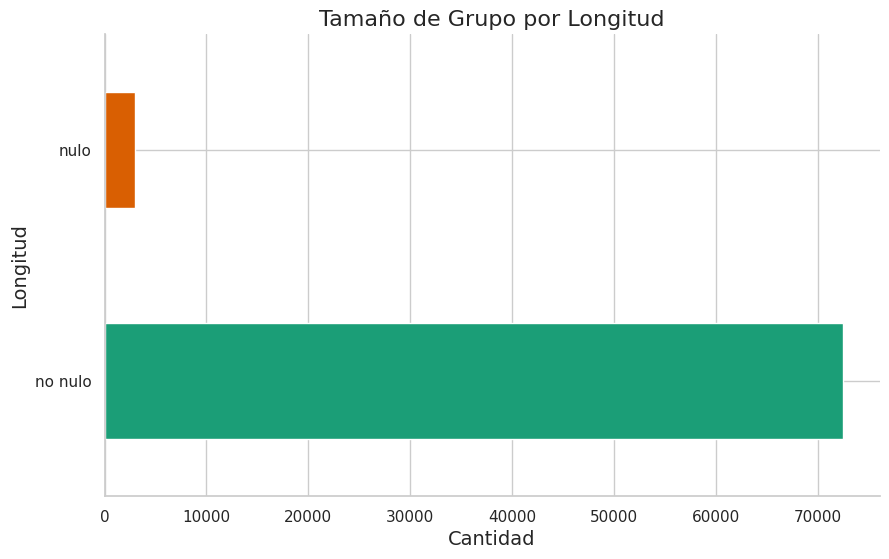

In [ ]:
# @title Longitud
# Suponiendo que 'latatitud_longitud' es tu DataFrame
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Agrupar por 'longitud' y obtener el tamaño de cada grupo, luego trazar el gráfico de barras horizontales
latatitud_longitud.groupby('longitud').size().plot(kind='barh', color=sns.color_palette('Dark2'))

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Configurar el tamaño de la letra del título y las etiquetas
plt.title('Tamaño de Grupo por Longitud', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Longitud', fontsize=14)

# Mostrar el gráfico
plt.show()


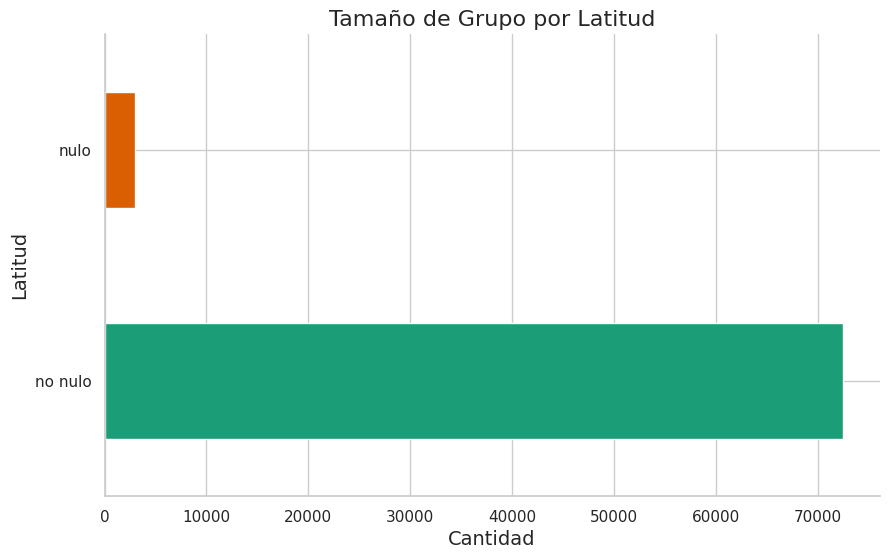

In [ ]:
# @title Latitud
# Suponiendo que 'latatitud_longitud' es tu DataFrame
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Agrupar por 'latitud' y obtener el tamaño de cada grupo, luego trazar el gráfico de barras horizontales
latatitud_longitud.groupby('latitud').size().plot(kind='barh', color=sns.color_palette('Dark2'))

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Configurar el tamaño de la letra del título y las etiquetas
plt.title('Tamaño de Grupo por Latitud', fontsize=16)
plt.xlabel('Cantidad', fontsize=14)
plt.ylabel('Latitud', fontsize=14)

# Mostrar el gráfico
plt.show()

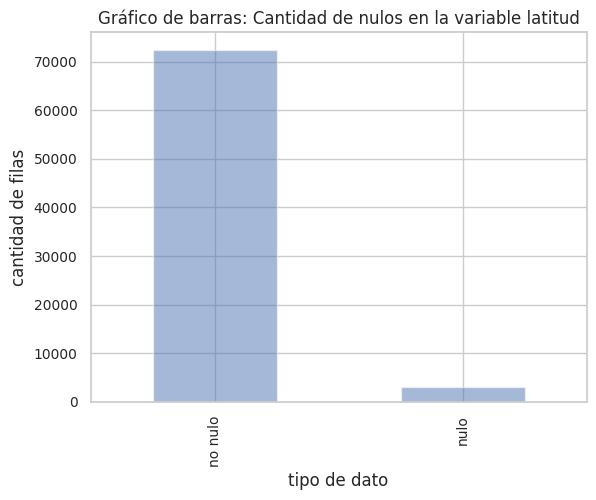

In [ ]:
generar_grafico(latatitud_longitud,'latitud')

In [ ]:
cant_nulos_longitud,cant_no_nulos_longitud = contar_ds(latatitud_longitud,'longitud')
imprimir_cantidades(cant_nulos_longitud,cant_no_nulos_longitud,'longitud')

Cantidad de datos NULOS en longitud: 72422
Cantidad de datos NO NULOS en longitud: 2977


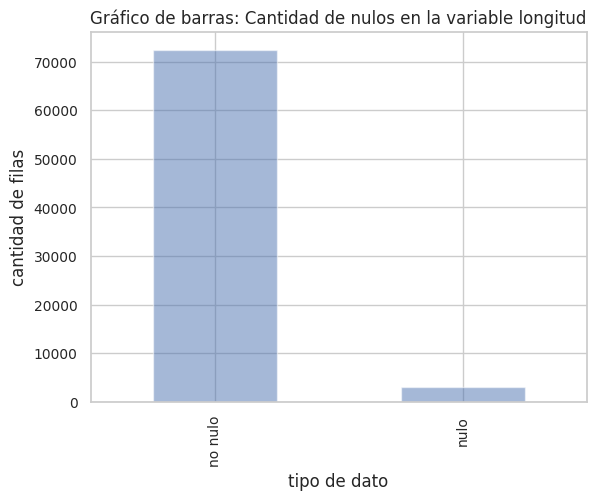

In [ ]:
generar_grafico(latatitud_longitud,'longitud')

#### Superficie total y Superficie cubierta (property_surface_total, property_surface_covered)

In [ ]:
# establezco si son o no nulos
sup_total_cubierta = generar_ds_nulo(['property_surface_total','property_surface_covered'])
# creo filtro si son o no nulos
v_filtro_total =  filtrar_nulo('property_surface_total',sup_total_cubierta)
f_filtro_total =  filtrar_no_nulo('property_surface_total',sup_total_cubierta)

v_filtro_cubierto =  filtrar_nulo('property_surface_covered',sup_total_cubierta)
f_filtro_cubierto =  filtrar_no_nulo('property_surface_covered',sup_total_cubierta)
# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_total,'property_surface_total','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_total,'property_surface_total','no nulo')

# establezco los nulos y no nulos
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,v_filtro_cubierto,'property_surface_covered','nulo')
sup_total_cubierta = aplicar_filtro(sup_total_cubierta,f_filtro_cubierto,'property_surface_covered','no nulo')

sup_total_cubierta.head()

property_surface_total property_surface_covered
308580                no nulo                  no nulo
368781                no nulo                  no nulo
449679                no nulo                  no nulo
428026                no nulo                  no nulo
137647                no nulo                  no nulo

In [ ]:
cant_nulos_total, cant_no_nulos_total = contar_ds(sup_total_cubierta,'property_surface_total')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_surface_total')

Cantidad de datos NULOS en property_surface_total: 71521
Cantidad de datos NO NULOS en property_surface_total: 3878


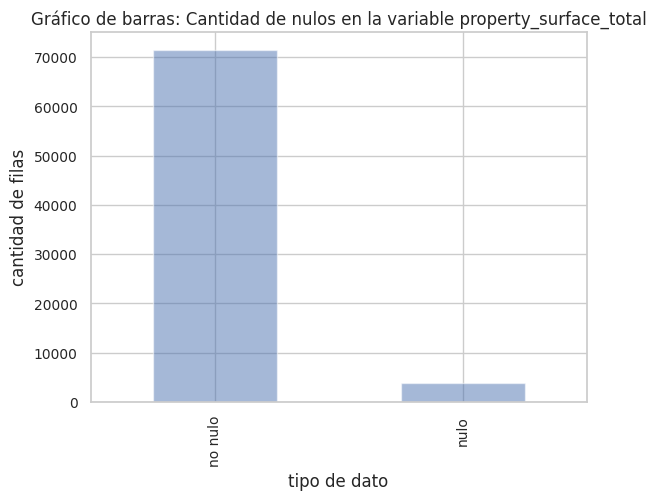

In [ ]:
generar_grafico(sup_total_cubierta,'property_surface_total')

In [ ]:
cant_nulos_total, cant_no_nulos_total = contar_ds(sup_total_cubierta,'property_surface_covered')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_surface_covered')

Cantidad de datos NULOS en property_surface_covered: 72762
Cantidad de datos NO NULOS en property_surface_covered: 2637


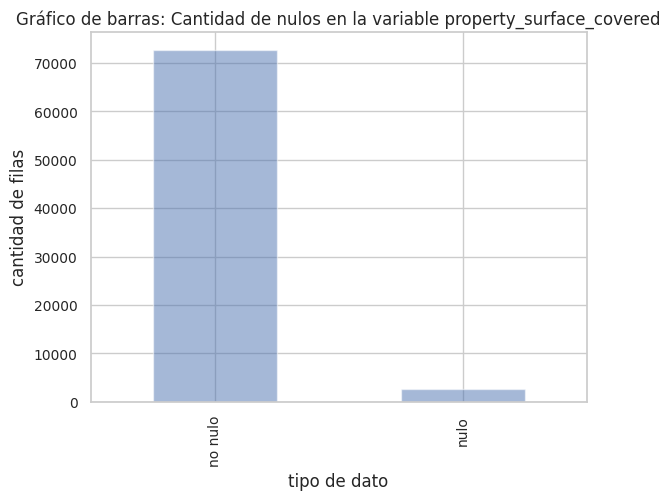

In [ ]:
generar_grafico(sup_total_cubierta,'property_surface_covered')

#### Habitaciones y dormitorios (property_rooms, property_bedrooms)

In [ ]:
# establezco si son o no nulos
habitaciones_dormis = generar_ds_nulo(['property_rooms','property_bedrooms'])
# creo filtro si son o no nulos
v_filtro_hab = filtrar_nulo('property_rooms',habitaciones_dormis)
f_filtro_hab =  filtrar_no_nulo('property_rooms',habitaciones_dormis)

v_filtro_dormis =  filtrar_nulo('property_bedrooms',habitaciones_dormis)
f_filtro_dormis =  filtrar_no_nulo('property_bedrooms',habitaciones_dormis)

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_hab,'property_rooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_hab,'property_rooms','no nulo')

# establezco los nulos y no nulos
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,v_filtro_dormis,'property_bedrooms','nulo')
habitaciones_dormis = aplicar_filtro(habitaciones_dormis,f_filtro_dormis,'property_bedrooms','no nulo')

habitaciones_dormis.head()

property_rooms property_bedrooms
308580        no nulo           no nulo
368781        no nulo           no nulo
449679        no nulo           no nulo
428026        no nulo           no nulo
137647        no nulo           no nulo

In [ ]:
cant_nulos_total, cant_no_nulos_total = contar_ds(habitaciones_dormis,'property_rooms')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_rooms')

Cantidad de datos NULOS en property_rooms: 74574
Cantidad de datos NO NULOS en property_rooms: 825


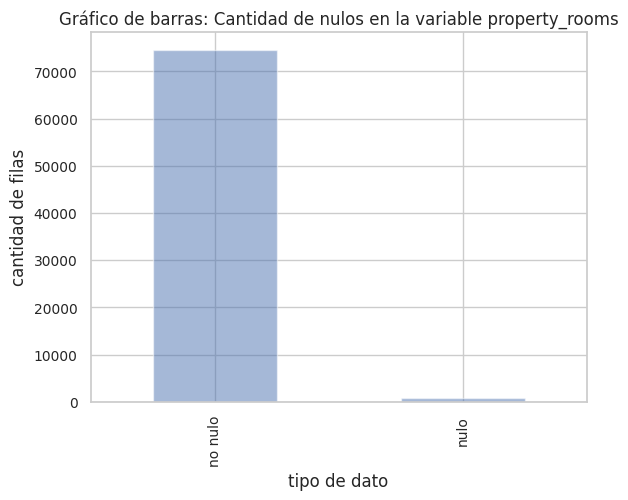

In [ ]:
generar_grafico(habitaciones_dormis,'property_rooms')

In [ ]:
cant_nulos_total, cant_no_nulos_total = contar_ds(habitaciones_dormis,'property_bedrooms')
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'property_bedrooms')

Cantidad de datos NULOS en property_bedrooms: 66573
Cantidad de datos NO NULOS en property_bedrooms: 8826


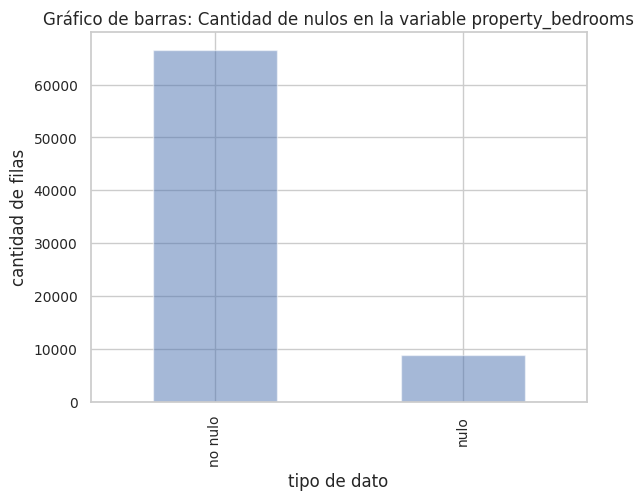

In [ ]:
generar_grafico(habitaciones_dormis,'property_bedrooms')

#### Barrio (place_l3)

In [ ]:
# establezco si son o no nulos
barrio = generar_ds_nulo('place_l3')
# creo filtro si son o no nulos
v_filtro_barrio =  barrio == True
f_filtro_barrio =  barrio == False
# establezco los nulos y no nulos
barrio.loc[v_filtro_barrio] = 'nulo'
barrio.loc[f_filtro_barrio] = 'no nulo'

barrio.head()

308580    no nulo
368781    no nulo
449679    no nulo
428026    no nulo
137647    no nulo
Name: place_l3, dtype: object

In [ ]:
cant_nulos_barrio,cant_no_nulos_barrio = barrio.value_counts()
imprimir_cantidades(cant_nulos_total,cant_no_nulos_total,'place_l3')

Cantidad de datos NULOS en place_l3: 66573
Cantidad de datos NO NULOS en place_l3: 8826


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable place_l3'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

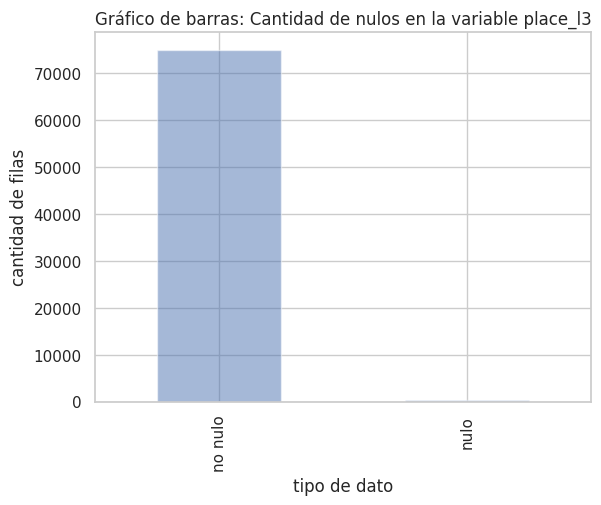

In [ ]:
barrio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable place_l3", xlabel="tipo de dato" , ylabel="cantidad de filas")

#### Precio

In [ ]:
precio = generar_ds_nulo('property_price')
# creo filtro si son o no nulos
v_filtro_precio =  precio == True
f_filtro_precio =  precio == False
# establezco los nulos y no nulos
precio.loc[v_filtro_precio] = 'nulo'
precio.loc[f_filtro_precio] = 'no nulo'

precio.head()

308580    no nulo
368781    no nulo
449679    no nulo
428026    no nulo
137647    no nulo
Name: property_price, dtype: object

In [ ]:
print("Cantidad de datos NO NULOS en property_price: {}".format(precio.value_counts()))

Cantidad de datos NO NULOS en property_price: property_price
no nulo    75399
Name: count, dtype: int64


<Axes: title={'center': 'Gráfico de barras: Cantidad de nulos en la variable property_price'}, xlabel='tipo de dato', ylabel='cantidad de filas'>

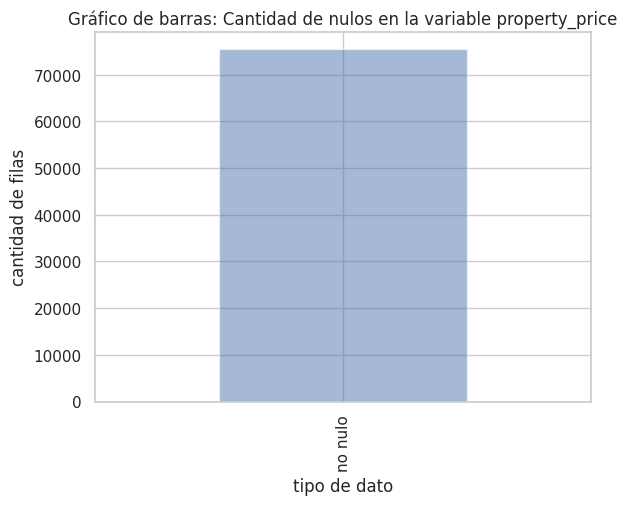

In [ ]:
precio.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de nulos en la variable property_price", xlabel="tipo de dato" , ylabel="cantidad de filas")

### Análisis de datos faltantes a nivel fila

Realizar un análisis de datos faltantes a nivel de fila. Calcular el porcentaje de datos
faltantes de cada registro. Realizar un gráfico que permita conocer la proporción de
faltantes por fila en el dataset.


In [ ]:
# Calcular la cantidad de filas nulas
cantidad_filas_nulas = ds_train.isna().sum(axis=1)
filtro = cantidad_filas_nulas > 0
cantidad_filas_nulas = cantidad_filas_nulas[filtro]
print("La cantidad de filas que tienen al menos un dato nulo es: ",len(cantidad_filas_nulas))

La cantidad de filas que tienen al menos un dato nulo es:  17120


<Axes: title={'center': 'Gráfico de barras: Cantidad de filas nulas en ds_train'}, xlabel='cantidad de nulos', ylabel='cantidad de filas'>

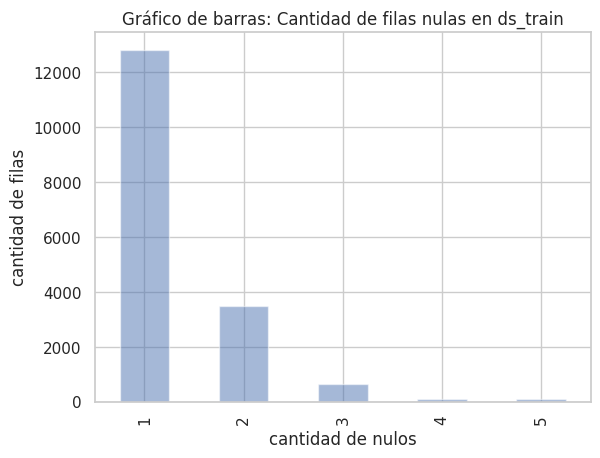

In [ ]:
cantidad_filas_nulas.value_counts().plot.bar(alpha=0.5,title="Gráfico de barras: Cantidad de filas nulas en ds_train", xlabel="cantidad de nulos" , ylabel="cantidad de filas")

### Revisión de datos faltantes o mal ingresados

Revisar los datos faltantes o mal ingresados y tomar una decisión sobre estos: reemplazo de
valores, eliminación de registros incompletos, etc.

Recordemos los datos nulos que tenemos en ds_train

In [ ]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.705726
property_surface_total       5.143304
latitud                      3.948328
longitud                     3.948328
property_surface_covered     3.497394
property_rooms               1.094179
place_l3                     0.440324
dtype: float64

Veremos unas de las estrategias para para trabajar con datos faltantes. Procederemos a imputar datos

#### Imputación Cold Deck
Vamos a trabajar con los datos ```latitud``` y ```longitud``` para completar la variable ```place_l3```.
Para ello vamos a utilizar el csv ```barrios.csv``` provisto por [GCBA](https://data.buenosaires.gob.ar/dataset/barrios/resource/juqdkmgo-191-resource) que nos da la localización y límites geográficos de los barrios de la Ciudad.

Antes de imputar vamos a hacer una copia para analizar la imputación en el siguiente punto.

In [ ]:
ds_pre_imputacion = ds_train.copy()

Para ello vamos a usar Geopandas correspondiente a la documentación wkt

In [ ]:
ds_barrios = pd.read_csv(barrios_file, header=0,sep=';')
def completar_barrios(ds):
  for index, propiedad in ds.iterrows():
    if isinstance(propiedad["place_l3"], str):
      continue

    for index,barrio in ds_barrios.iterrows():
      barrio_aux = barrio['BARRIO']
      if barrio_aux == '' or barrio_aux is None:
        continue
      coordenada = Point(propiedad['longitud'],propiedad['latitud'])
      # uso wkt Para deserializar una cadena y obtener un nuevo objeto geométrico del tipo apropiado
      # uso covers para ver si está cubierta la coordenada de ds_barrios por lo que tiene mi ds
      if wkt.loads(barrio['WKT']).covers(coordenada):
        ds.loc[index,'place_l3'] = barrio_aux

  return

completar_barrios(ds_train)
completar_barrios(ds_test)

Visualizamos el dataset para ver si podemos ver algún nulo rápido.

In [ ]:
# Ordenar el DataFrame por 'place_l3'
ds_train_sorted = ds_train.sort_values(by='place_l3')

# Extraer la columna 'place_l3'
place_l3_column = ds_train_sorted['place_l3']

# Elimino la columna 'place_l3' del DataFrame
ds_train_sorted.drop(columns=['place_l3'], inplace=True)

# Inserto la columna 'place_l3' en la primera posición
ds_train_sorted.insert(0, 'place_l3', place_l3_column)

# Ahora ds_train_sorted tiene 'place_l3' como la primera columna
# para visualizarlo mejor
ds_train_sorted

place_l3                        id  start_date    end_date  \
27      AGRONOMIA                       NaN         NaN         NaN   
4         ALMAGRO                       NaN         NaN         NaN   
238096     Abasto  1ojXberGTTzVjBBXZOjo/w==  2021-02-27  2021-03-01   
311132     Abasto  cJESjrNKMUHtut7US8CWow==  2021-04-25  2021-06-05   
277102     Abasto  fQnNEttk6gvKUjQLbsesRA==  2021-12-23  2022-01-27   
...           ...                       ...         ...         ...   
190496        NaN  ohDVjeJQkP8w0k780qHn4A==  2021-10-09  9999-12-31   
218048        NaN  vRA/0y8xkAUweY9h1T7EzA==  2021-11-30  9999-12-31   
84681         NaN  FDP0I8rP+WzTtwUj4Gc2iQ==  2021-03-26  2021-04-13   
142639        NaN  Rz0b5avJ+Y05s1qSNFVmsw==  2021-06-08  2021-11-04   
186032        NaN  Ubrfweth05Vi5lt26ycpSA==  2021-08-07  2021-08-08   

       created_on    latitud   longitud property_type  property_rooms  \
27            NaT        NaN        NaN           NaN             NaN   
4             NaT        NaN        NaN           NaN             NaN   
238096 2021-02-27 -34.602871 -58.412632  Departamento             1.0   
311132 2021-04-25 -34.603684 -58.415155  Departamento             1.0   
277102 2021-12-23 -34.605197 -58.411885  Departamento             3.0   
...           ...        ...        ...           ...             ...   
190496 2021-10-09 -34.615136 -58.429657  Departamento             2.0   
218048 2021-11-30        NaN        NaN          Casa             NaN   
84681  2021-03-26        NaN        NaN  Departamento             3.0   
142639 2021-06-08        NaN        NaN          Casa             5.0   
186032 2021-08-07 -33.081035 -68.468102  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
27                    NaN                     NaN                       NaN   
4                     NaN                     NaN                       NaN   
238096                NaN                    33.0                      28.0   
311132                1.0                    28.0                       NaN   
277102                2.0                     NaN                      42.0   
...                   ...                     ...                       ...   
190496                NaN                    59.0                      38.0   
218048                2.0                   100.0                     100.0   
84681                 2.0                    87.0                      87.0   
142639                NaN                   236.0                     250.0   
186032                1.0                    49.0                      49.0   

        property_price  
27                 NaN  
4                  NaN  
238096         72000.0  
311132         69800.0  
277102        105000.0  
...                ...  
190496        115000.0  
218048        318000.0  
84681         120000.0  
142639        330000.0  
186032         87000.0  

[75417 rows x 13 columns]

Vemos que hay datos NaN en el barrio

In [ ]:
ds_train['place_l3'].isna().value_counts()

place_l3
False    75085
True       332
Name: count, dtype: int64

Estos datos en NaN pueden ser datos mal ingresados. Se ingresó mal la coordenada de la propiedad y se la clasificó como Capital Federal. Lo mismo puede suceder de que no tengan latitud ni longitud. Procedo a eliminar dichos datos

In [ ]:
columnas_a_eliminar = ['latitud','longitud','place_l3']
ds_train = ds_train.dropna(subset=columnas_a_eliminar)
ds_test =  ds_test.dropna(subset=columnas_a_eliminar)

Verifico mis datos_nulos en mi dataset

In [ ]:
obtener_cantidad_nulos(ds_train)

property_bedrooms           11.628036
property_surface_total       5.051092
property_surface_covered     3.479549
property_rooms               0.940157
dtype: float64

#### Análisis de property's
Ahora vamos a seguir con el análisis de las siguientes variables:
*     property_bedrooms
*     property_rooms
*     property_surface_total
*     property_surface_covered

Podemos identificar que estas variables son tipos de datos faltantes MAR.

##### Análisis de ceros

Para empezar verifico si alguno de estos datos es negativo. Pues valores negativos para alguno de estos atributos no tiene sentido.

In [ ]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                          True
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Vemos que existen valores menores o iguales que 0 en el atributo ```property_bedrooms```. Procedo a ver cuantos registros cumplen con esta condición.

In [ ]:
filtro = ds_propiedades_filtradas['property_bedrooms'] < 1
ds_propiedades_filtradas[filtro]

id  start_date    end_date  created_on  \
406880  3WI+zCCMeb9TR5kOBm7rhg==  2021-01-07  2021-03-18  2021-01-07   

          latitud   longitud         place_l2       place_l3 place_l4  \
406880 -34.577595 -58.495185  Capital Federal  Villa Urquiza      NaN   

       place_l5  place_l6 operation property_type  property_rooms  \
406880      NaN       NaN     Venta  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
406880               -1.0                    61.0                      43.0   

        property_price property_currency  \
406880        125000.0               USD   

                                           property_title  
406880  Jardines de Roosevelt - Hermoso 3 ambientes co...

Como hay un registro, procedo a asignarlo nulo.

In [ ]:
ds_train.loc[ds_train['property_bedrooms'] < 1,'property_bedrooms'] = np.nan

Verifico si hay valores menores o iguales que cero.

In [ ]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_train[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

Realizo el mismo análisis con ds_test

In [ ]:
columnas_con_numeros = ['property_bedrooms','property_rooms','property_surface_total','property_surface_covered']
(ds_test[columnas_con_numeros] <= 0).any().to_frame("Menor o igual que 0 ?")

Menor o igual que 0 ?
property_bedrooms                         False
property_rooms                            False
property_surface_total                    False
property_surface_covered                  False

##### Análisis de duplicados

Verifico si hay datos duplicados en estas columnas

In [ ]:
ds_train[ds_train.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_test[ds_test.duplicated(keep=False)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

Procedo a eliminar filas duplicadas

In [ ]:
size_antes = len(ds_train)
ds_train_filtrado = ds_train.drop_duplicates()
size_despues = len(ds_train_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_train")

Se eliminaron: 0 filas duplicadas de ds_train


In [ ]:
ds_train_filtrado.reset_index(drop=True, inplace=True)

In [ ]:
size_antes = len(ds_test)
ds_test_filtrado = ds_test.drop_duplicates()
size_despues = len(ds_test_filtrado)
print(f"Se eliminaron: {size_antes-size_despues} filas duplicadas de ds_test")

Se eliminaron: 0 filas duplicadas de ds_test


In [ ]:
ds_test_filtrado.reset_index(drop=True, inplace=True)

##### Completo las columnas de forma multivariada

Como las variables faltantes son datos de tipo MAR (Missing At Random), elijo el proceso de imputación de datos MICE (Multivariate Imputation by Chained Equations)

In [ ]:
# la variable columnas_con_numeros tiene las columnas a analizar
lr = LinearRegression()
imp = IterativeImputer(
    estimator=lr,
    missing_values = np.nan,
    max_iter = 20,
    verbose = 0,
    random_state = 0,
    min_value = 1
)


def rellenar_variables(ds,columnas):
  df_eliminar_nans_op3_completo = ds[columnas].copy()
  ds[columnas] = imp.fit_transform(df_eliminar_nans_op3_completo)

rellenar_variables(ds_train,columnas_con_numeros)


<ipython-input-388-72180959683a>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
obtener_promedio_nulos(ds_train)

id                          0.0
start_date                  0.0
end_date                    0.0
created_on                  0.0
latitud                     0.0
longitud                    0.0
place_l3                    0.0
property_type               0.0
property_rooms              0.0
property_bedrooms           0.0
property_surface_total      0.0
property_surface_covered    0.0
property_price              0.0
dtype: float64

In [ ]:
obtener_cantidad_nulos(ds_train)

'No existen valores NaN'

### Comparación de distribuciones
En caso de realizar imputaciones comparar las distribuciones de cada atributo reparado con
la distribución anterior a la imputación de los datos faltantes.

Para ello veamos nuestro ```ds_pre_imputacion```

In [ ]:
ds_pre_imputacion.head()

id  start_date    end_date created_on  \
308580  2tDcWrPW06OU2VTLqlOaBw==  2021-04-28  2021-05-01 2021-04-28   
368781  y3AnoNhKDUkaPR22VUfb3Q==  2021-05-06  2021-06-05 2021-05-06   
449679  SZLiwyscxtmDnQUa+AgGpQ==  2021-12-16  2022-02-09 2021-12-16   
428026  QOOeCO6nYiu9hgF66L7n7Q==  2021-12-16  2022-02-09 2021-12-16   
137647  u74hGoL0NcwJtn6RvwikCg==  2021-01-22  2021-03-08 2021-01-22   

          latitud   longitud  place_l3 property_type  property_rooms  \
308580 -34.582632 -58.421627   Palermo  Departamento             4.0   
368781 -34.562958 -58.446183  Belgrano  Departamento             3.0   
449679 -34.592420 -58.384979    Retiro  Departamento             4.0   
428026 -34.598637 -58.389624  Recoleta  Departamento             3.0   
137647 -34.591705 -58.395967  Recoleta  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
308580                3.0                    75.0                      74.0   
368781                2.0                   171.0                     171.0   
449679                3.0                    90.0                      90.0   
428026                2.0                    68.0                      61.0   
137647                3.0                   106.0                     106.0   

        property_price  
308580        165000.0  
368781       1200000.0  
449679        210000.0  
428026        170000.0  
137647        360000.0

Recordemos que datos imputamos

In [ ]:
nulos_preimputacion

property_bedrooms           11.705726
property_surface_total       5.143304
latitud                      3.948328
longitud                     3.948328
property_surface_covered     3.497394
property_rooms               1.094179
place_l3                     0.440324
dtype: float64

In [ ]:
nulos_preimputacion.index.tolist()

['property_bedrooms',
 'property_surface_total',
 'latitud',
 'longitud',
 'property_surface_covered',
 'property_rooms',
 'place_l3']

Para ver la distribuciones de las variables imputadas vamos a utilizar un gráfico de distribución continua BoxPlot. El cual nos va a ayudar a visualizar la distribución de los datos y la asimetría de los mismos mediante la visualización de cuartiles y promedios de los datos.

#### Funciones de distribución

In [ ]:
def generar_distribucion(variable):
  # Configuración de estilo y colores
  sns.set(style="whitegrid")
  sns.set_palette("pastel")

  # Creo la cuadrícula de subgráficos con una fila y dos columnas
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0], width=0.5)
  axes[0].set_title("Boxplot {} pre-imputación".format(variable), fontsize=14)
  axes[0].set_ylabel("Valor", fontsize=12)
  axes[0].set_xlabel("", fontsize=12)

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1], width=0.5)
  axes[1].set_title("Boxplot {} post-imputación".format(variable), fontsize=14)
  axes[1].set_ylabel("Valor", fontsize=12)
  axes[1].set_xlabel("", fontsize=12)

  # Ajusto el diseño
  plt.tight_layout()

  plt.show()

  return

In [ ]:
def generar_distribucion_zoom(variable):
  fig, axes = plt.subplots(1, 2, figsize=(12, 6))

  # Genero boxplot para ds_pre_imputacion en el primer subgráfico
  sns.boxplot(y=variable, data=ds_pre_imputacion, ax=axes[0])
  axes[0].set_title("Boxplot {} pre-imputacion".format(variable))
  axes[0].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Genero boxplot para ds_train en el segundo subgráfico
  sns.boxplot(y=variable, data=ds_train, ax=axes[1])
  axes[1].set_title("Boxplot {} post-imputacion".format(variable))
  axes[1].set_ylim(0, 10)  # Ajustar el rango del eje y

  # Ajustar el diseño
  plt.tight_layout()

  plt.show()
  return

In [ ]:
def obtener_cantidad_variables(ds,columna):
  analisis = ds[columna].value_counts().reset_index()
  analisis.columns = [columna, 'cantidad']
  return analisis

In [ ]:
def comparar_imputacion(pre, post, columna):
    for i in range(len(pre)):
        registros_imputados = post['cantidad'][i] - pre['cantidad'][i]
        registros_imputados = abs(registros_imputados)  # Tomar el valor absoluto
        print("{} registros se imputaron con el valor de {} {}".format(registros_imputados, pre[columna][i], columna))
    return

#### Comparación property_bedrooms

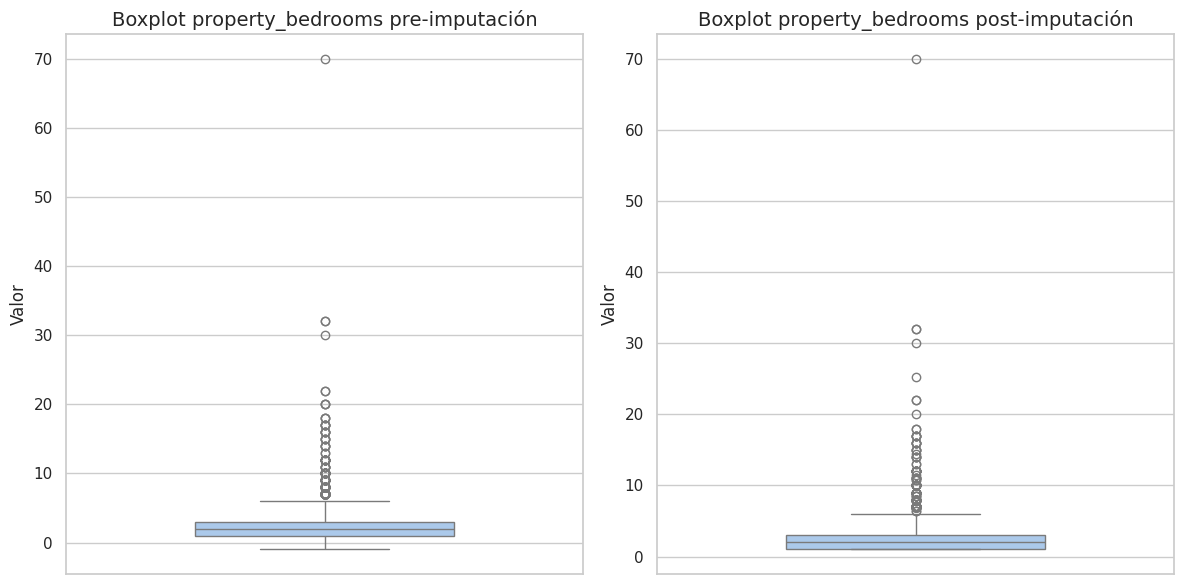

In [ ]:
generar_distribucion("property_bedrooms")

Un poco de zoom

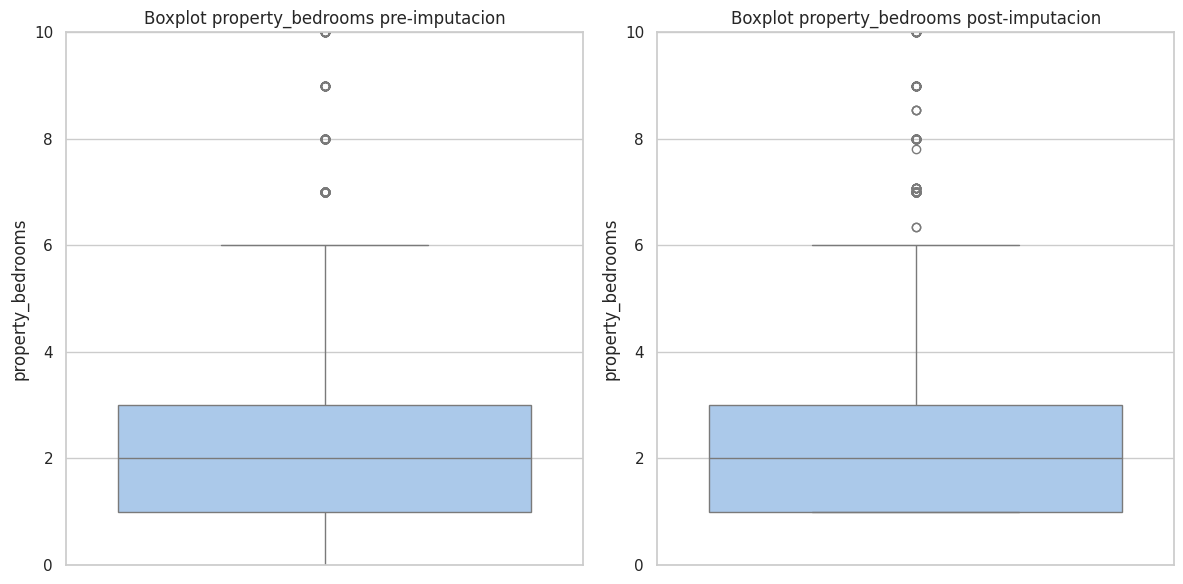

In [ ]:
generar_distribucion_zoom("property_bedrooms")

La comparación de los boxplots revela una gran coherencia en la distribución de la variable entre los conjuntos de datos antes y después de la imputación. Aunque se observa una discrepancia leve entre los valores de aproximadamente 20 y 30, esta diferencia es mínima en comparación con la totalidad de los datos. Esto sugiere que las imputaciones se realizaron de manera consistente y dentro de los límites razonables de la variable, sin introducir valores atípicos o extremos.

Vamos a analizar cada property_bedrooms

In [ ]:
pre_bedrooms = obtener_cantidad_variables(ds_pre_imputacion,'property_bedrooms')
pre_bedrooms.head()

property_bedrooms  cantidad
0                1.0     25487
1                2.0     21954
2                3.0     14163
3                4.0      3808
4                5.0       736

In [ ]:
post_bedrooms = obtener_cantidad_variables(ds_train,'property_bedrooms')
post_bedrooms.head()

property_bedrooms  cantidad
0                1.0     31903
1                2.0     21137
2                3.0     13494
3                4.0      3608
4                5.0       679

Con esto podemos ver la cantidad de imputaciones que se hicieron gracias al método MICE.

In [ ]:
comparar_imputacion(pre_bedrooms,post_bedrooms,'property_bedrooms')

6416 registros se imputaron con el valor de 1.0 property_bedrooms
817 registros se imputaron con el valor de 2.0 property_bedrooms
669 registros se imputaron con el valor de 3.0 property_bedrooms
200 registros se imputaron con el valor de 4.0 property_bedrooms
57 registros se imputaron con el valor de 5.0 property_bedrooms
18 registros se imputaron con el valor de 6.0 property_bedrooms
4 registros se imputaron con el valor de 7.0 property_bedrooms
2 registros se imputaron con el valor de 8.0 property_bedrooms
1 registros se imputaron con el valor de 9.0 property_bedrooms
0 registros se imputaron con el valor de 10.0 property_bedrooms
0 registros se imputaron con el valor de 12.0 property_bedrooms
4 registros se imputaron con el valor de 17.0 property_bedrooms
2 registros se imputaron con el valor de 11.0 property_bedrooms
2 registros se imputaron con el valor de 16.0 property_bedrooms
3 registros se imputaron con el valor de 14.0 property_bedrooms
3 registros se imputaron con el valor 

Podemos concluir que la mayoría de los datos nulos en la variable property_bedrooms fueron llenados con la cantidad de un dormitorio

#### Comparación property_rooms

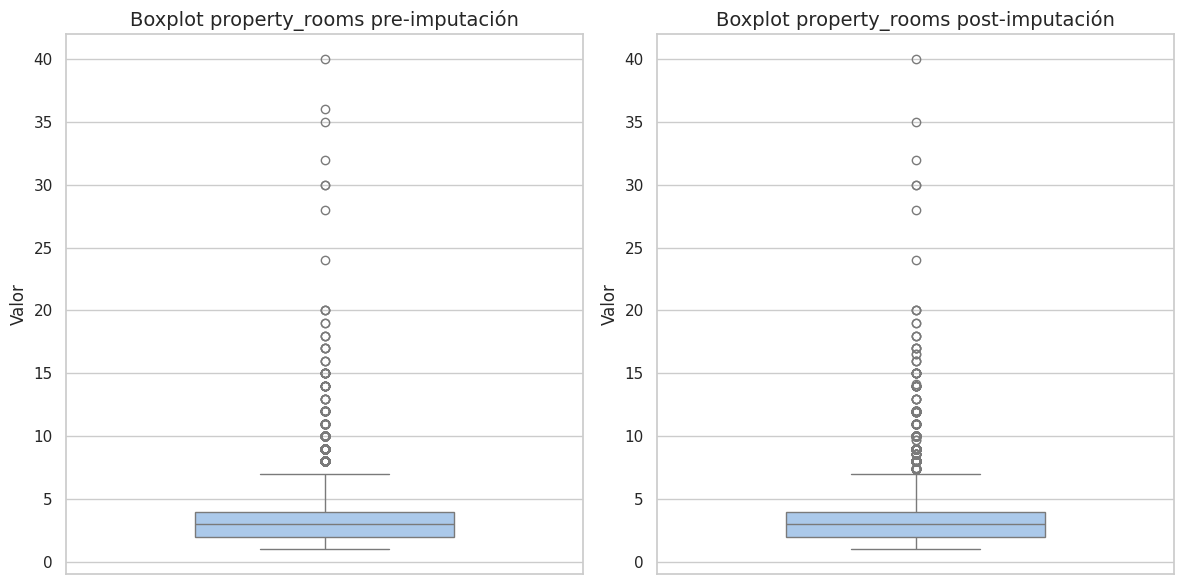

In [ ]:
generar_distribucion("property_rooms")

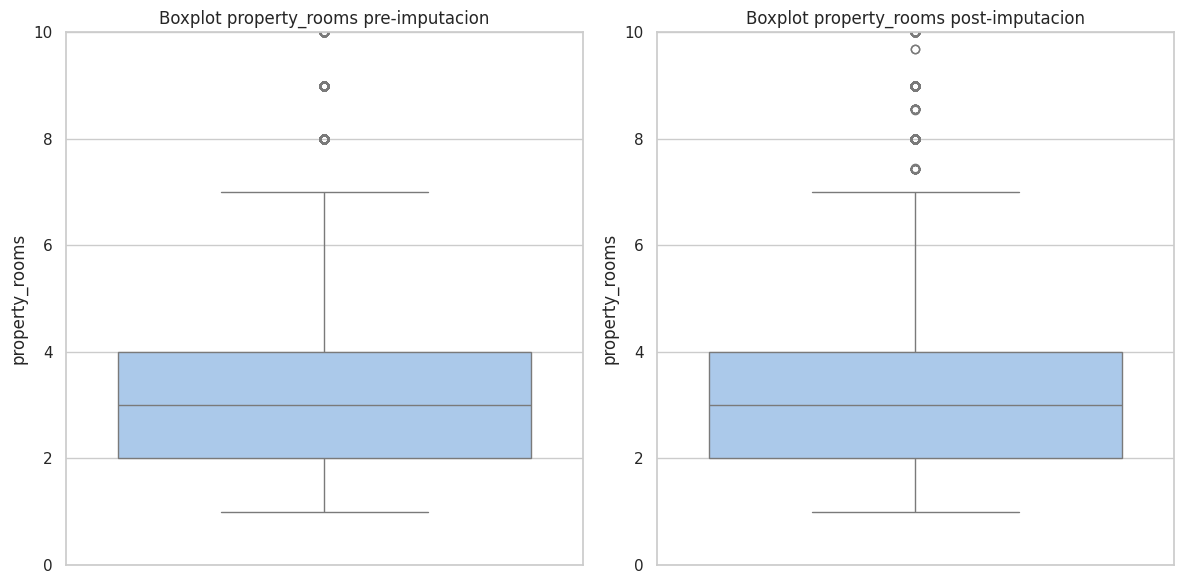

In [ ]:
generar_distribucion_zoom("property_rooms")

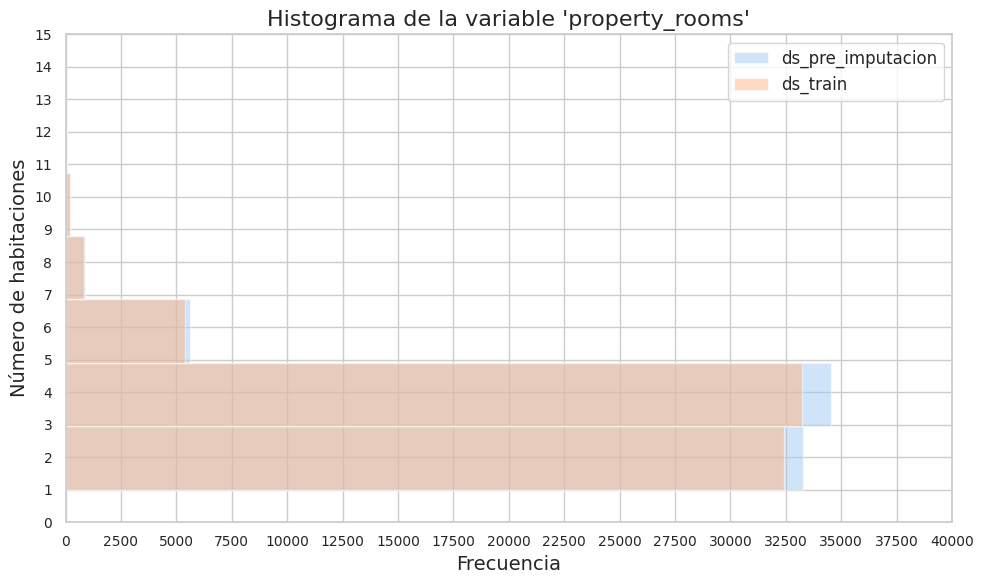

In [ ]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Histograma para ds_pre_imputacion en el eje y (invertido)
plt.hist(ds_pre_imputacion['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_pre_imputacion')

# Histograma para ds_train en el eje y (invertido)
plt.hist(ds_train['property_rooms'], bins=20, alpha=0.5, orientation='horizontal', label='ds_train')

# Ajustes de título y etiquetas
plt.title("Histograma de la variable 'property_rooms'", fontsize=16)
plt.xlabel("Frecuencia", fontsize=14)
plt.ylabel("Número de habitaciones", fontsize=14)

# Ajustes de límites de los ejes (zoom)
plt.ylim(0, 15)
plt.xlim(0, 40000)

# Establecer intervalos del eje x
plt.xticks(np.arange(0, 40001, 2500), fontsize=10)

# Añadir leyenda
plt.legend(fontsize=12)

# Establecer intervalos del eje y
plt.yticks(np.arange(16), fontsize=10)

plt.tight_layout()
plt.show()

<Axes: xlabel='property_rooms'>

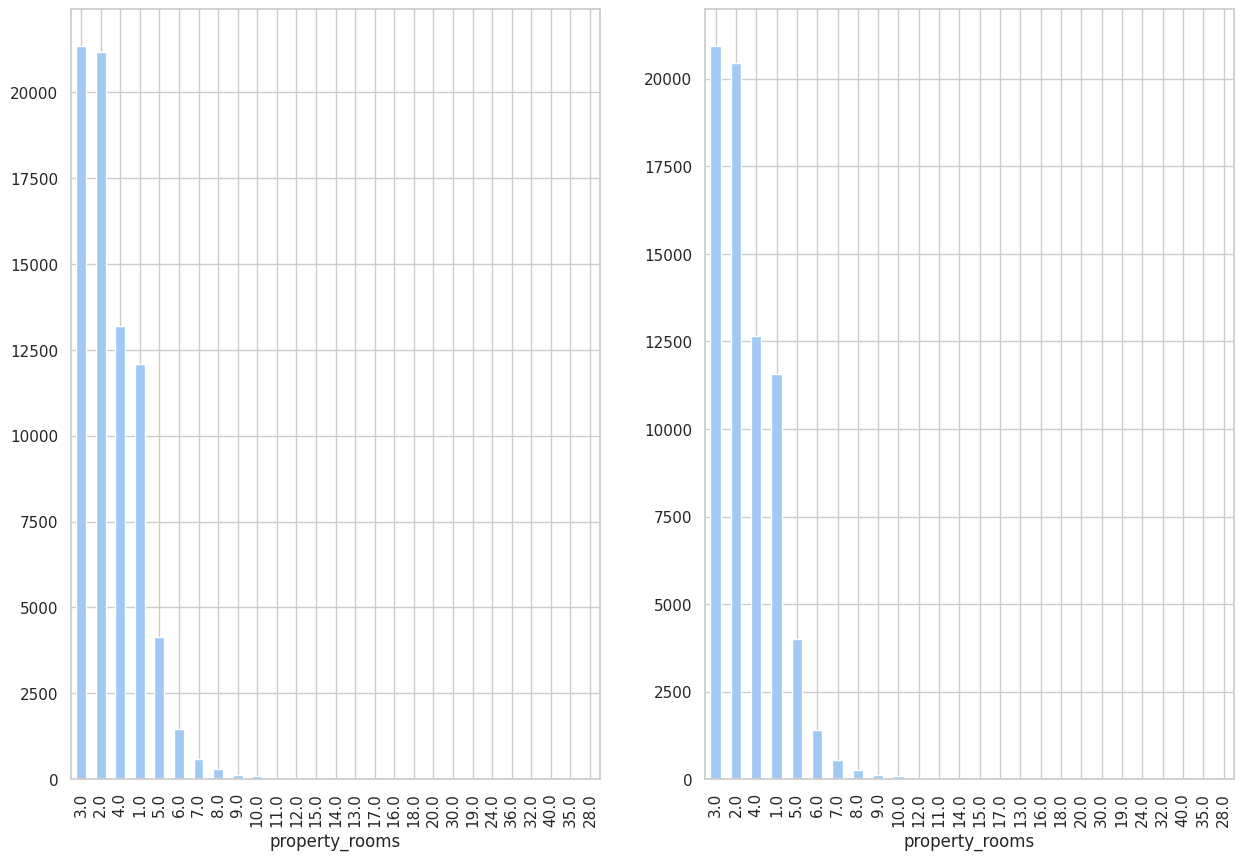

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(15,10)
ds_pre_imputacion["property_rooms"].value_counts().plot.bar(ax=axes[0])
ds_train["property_rooms"].round().value_counts().plot.bar(ax=axes[1])

A través de estos gráficos, se observan sutiles discrepancias al asignar la cantidad de habitaciones a la hora de realizar la imputación.

In [ ]:
pre_rooms = obtener_cantidad_variables(ds_pre_imputacion,'property_rooms')
pre_rooms.head()

property_rooms  cantidad
0             3.0     21345
1             2.0     21174
2             4.0     13179
3             1.0     12078
4             5.0      4137

In [ ]:
post_rooms = obtener_cantidad_variables(ds_train,'property_rooms')
post_rooms.head()

property_rooms  cantidad
0             3.0     20571
1             2.0     20388
2             4.0     12570
3             1.0     11576
4             5.0      3934

In [ ]:
comparar_imputacion(pre_rooms,post_rooms,'property_rooms')

774 registros se imputaron con el valor de 3.0 property_rooms
786 registros se imputaron con el valor de 2.0 property_rooms
609 registros se imputaron con el valor de 4.0 property_rooms
502 registros se imputaron con el valor de 1.0 property_rooms
203 registros se imputaron con el valor de 5.0 property_rooms
93 registros se imputaron con el valor de 6.0 property_rooms
43 registros se imputaron con el valor de 7.0 property_rooms
13 registros se imputaron con el valor de 8.0 property_rooms
2 registros se imputaron con el valor de 9.0 property_rooms
5 registros se imputaron con el valor de 10.0 property_rooms
0 registros se imputaron con el valor de 11.0 property_rooms
0 registros se imputaron con el valor de 12.0 property_rooms
0 registros se imputaron con el valor de 15.0 property_rooms
0 registros se imputaron con el valor de 14.0 property_rooms
6 registros se imputaron con el valor de 13.0 property_rooms
3 registros se imputaron con el valor de 17.0 property_rooms
4 registros se imput

Podemos inferir que la mayoría de los valores faltantes en la variable "property_rooms" fueron sustituidos por la cantidad de dos habitaciones.

#### Comparación property_surface_total

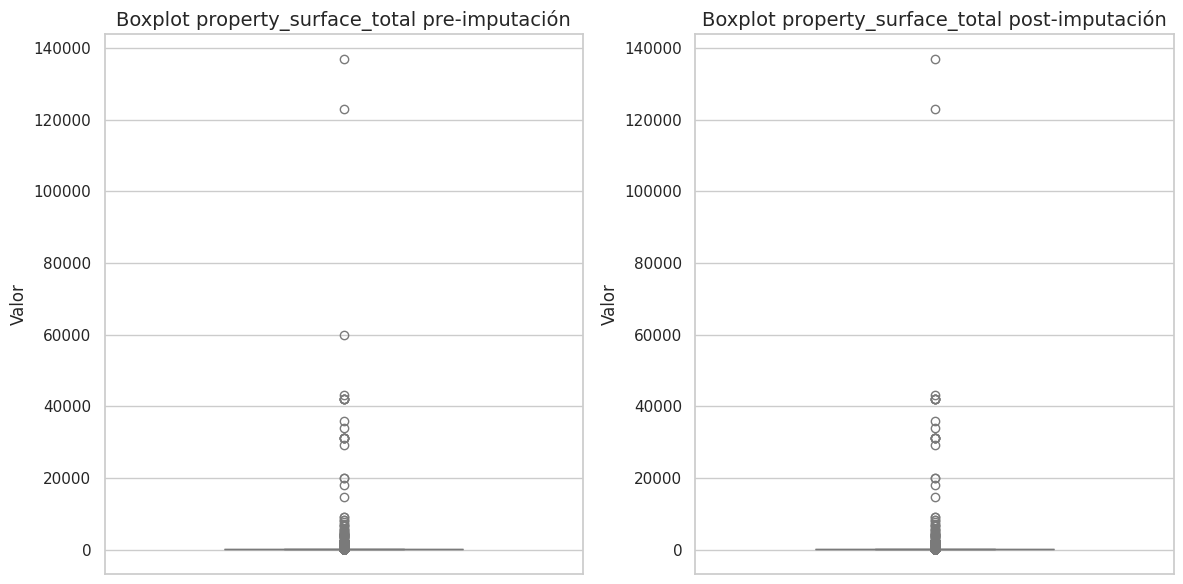

In [ ]:
generar_distribucion("property_surface_total")

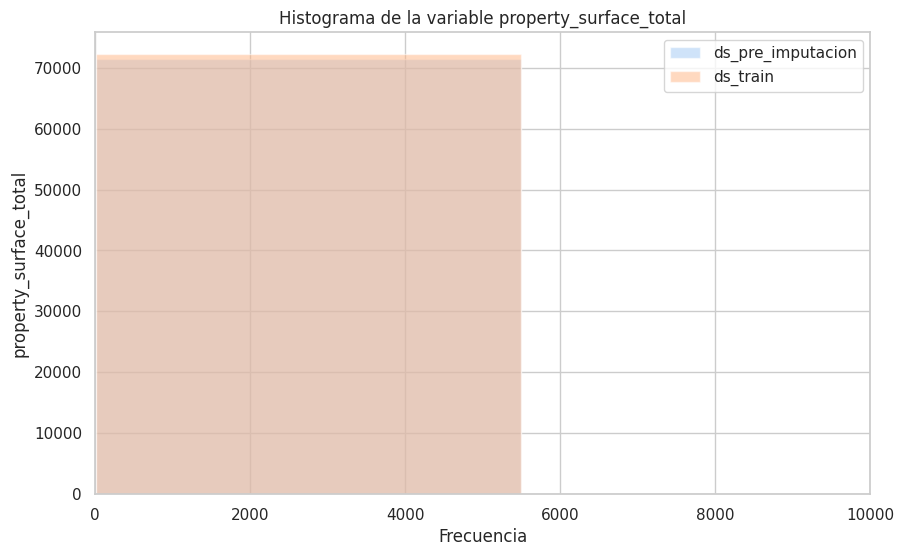

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_total'], bins=25, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_total'], bins=25, alpha=0.5, label='ds_train')

plt.title("Histograma de la variable property_surface_total")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_total")

plt.xlim(0, 10000)

plt.legend()

plt.show()

Observamos una notable disparidad en la cantidad de datos faltantes antes de la imputación de la variable "superficie total".

In [ ]:
pre_total = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_total')
pre_total.head()

property_surface_total  cantidad
0                    50.0      1426
1                    40.0      1362
2                    45.0      1280
3                    42.0      1248
4                    60.0      1193

In [ ]:
post_total = obtener_cantidad_variables(ds_train,'property_surface_total')
post_total.head()

property_surface_total  cantidad
0                    50.0      1356
1                    40.0      1328
2                    45.0      1230
3                    42.0      1199
4                    60.0      1142

In [ ]:
comparar_imputacion(pre_total,post_total,'property_surface_total')

70 registros se imputaron con el valor de 50.0 property_surface_total
34 registros se imputaron con el valor de 40.0 property_surface_total
50 registros se imputaron con el valor de 45.0 property_surface_total
49 registros se imputaron con el valor de 42.0 property_surface_total
51 registros se imputaron con el valor de 60.0 property_surface_total
52 registros se imputaron con el valor de 38.0 property_surface_total
56 registros se imputaron con el valor de 35.0 property_surface_total
40 registros se imputaron con el valor de 37.0 property_surface_total
42 registros se imputaron con el valor de 55.0 property_surface_total
32 registros se imputaron con el valor de 43.0 property_surface_total
34 registros se imputaron con el valor de 36.0 property_surface_total
35 registros se imputaron con el valor de 44.0 property_surface_total
44 registros se imputaron con el valor de 48.0 property_surface_total
53 registros se imputaron con el valor de 34.0 property_surface_total
24 registros se impu

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_total" fueron reemplazados con una superficie total de 73 m²


#### Comparación property_surface_covered

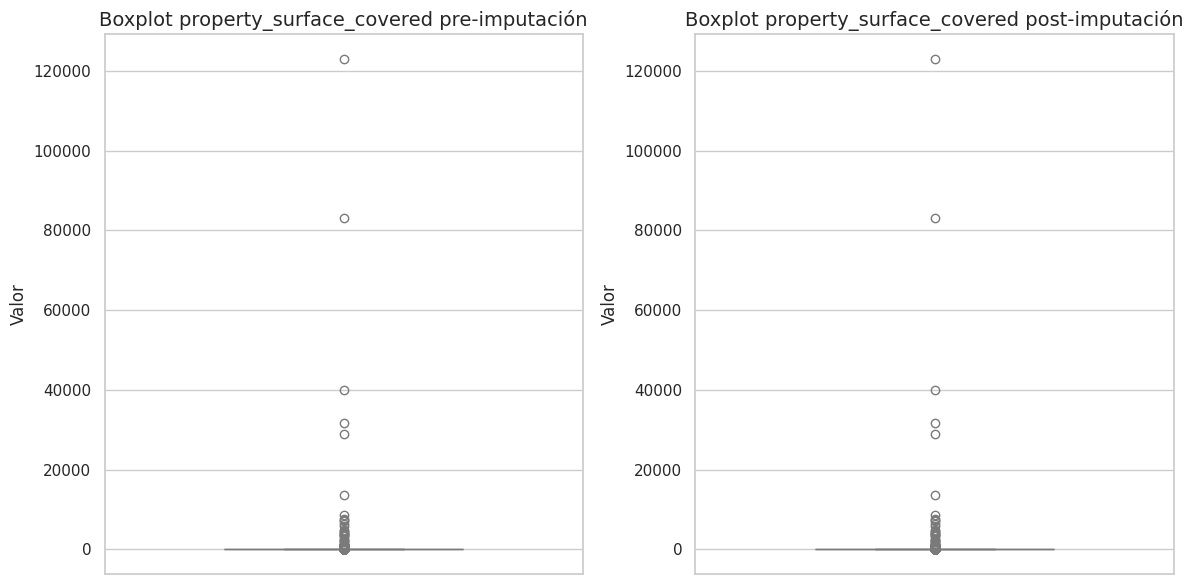

In [ ]:
generar_distribucion("property_surface_covered")

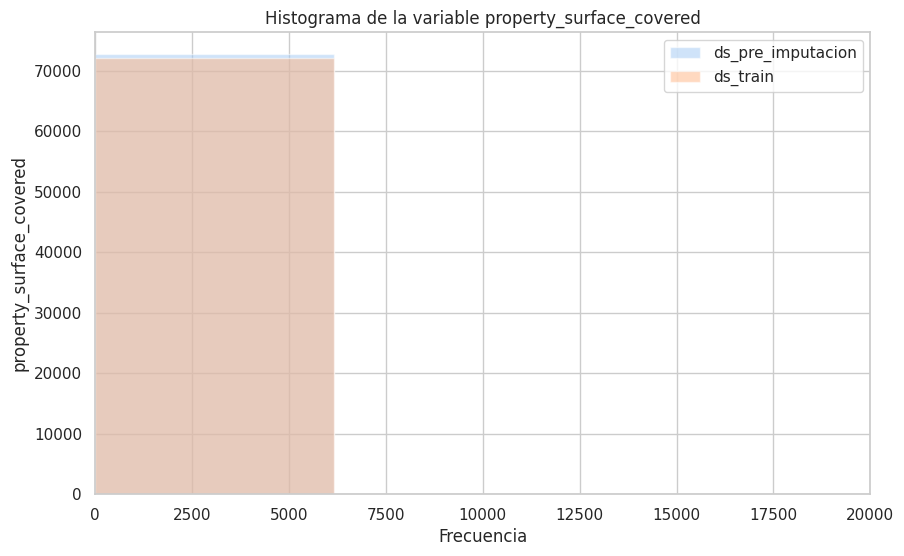

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['property_surface_covered'], bins=20, alpha=0.5,  label='ds_pre_imputacion')

plt.hist(ds_train['property_surface_covered'], bins=20, alpha=0.5,  label='ds_train')


plt.title("Histograma de la variable property_surface_covered")
plt.xlabel("Frecuencia")
plt.ylabel("property_surface_covered")


plt.xlim(0,20000)

plt.legend()

plt.show()

Se observa una ligera disparidad en los datos faltantes. Se puede inferir que se imputaron pocos datos para la variable "property_surface_covered", ya que esta variable tenía entre los menos valores nulos.

In [ ]:
pre_cubierto = obtener_cantidad_variables(ds_pre_imputacion,'property_surface_covered')
pre_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1899
1                      38.0      1638
2                      50.0      1581
3                      45.0      1564
4                      35.0      1464

In [ ]:
post_cubierto = obtener_cantidad_variables(ds_train,'property_surface_covered')
post_cubierto.head()

property_surface_covered  cantidad
0                      40.0      1843
1                      38.0      1567
2                      50.0      1522
3                      45.0      1500
4                      42.0      1405

In [ ]:
comparar_imputacion(pre_cubierto,post_cubierto,'property_surface_covered')

56 registros se imputaron con el valor de 40.0 property_surface_covered
71 registros se imputaron con el valor de 38.0 property_surface_covered
59 registros se imputaron con el valor de 50.0 property_surface_covered
64 registros se imputaron con el valor de 45.0 property_surface_covered
59 registros se imputaron con el valor de 35.0 property_surface_covered
48 registros se imputaron con el valor de 42.0 property_surface_covered
48 registros se imputaron con el valor de 60.0 property_surface_covered
42 registros se imputaron con el valor de 36.0 property_surface_covered
63 registros se imputaron con el valor de 32.0 property_surface_covered
49 registros se imputaron con el valor de 37.0 property_surface_covered
52 registros se imputaron con el valor de 30.0 property_surface_covered
51 registros se imputaron con el valor de 34.0 property_surface_covered
56 registros se imputaron con el valor de 33.0 property_surface_covered
46 registros se imputaron con el valor de 43.0 property_surface_

Podemos concluir que la mayoría de los valores faltantes en la variable "property_surface_covered" fueron completados con una superficie cubierta de 78 m²

#### Comparación latitud

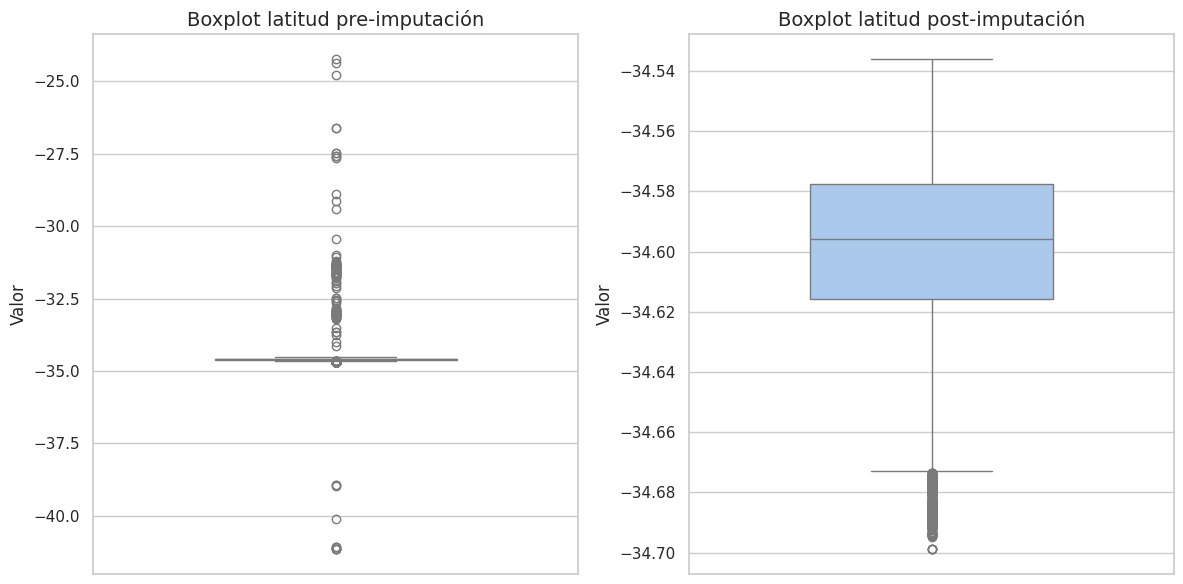

In [ ]:
generar_distribucion("latitud")

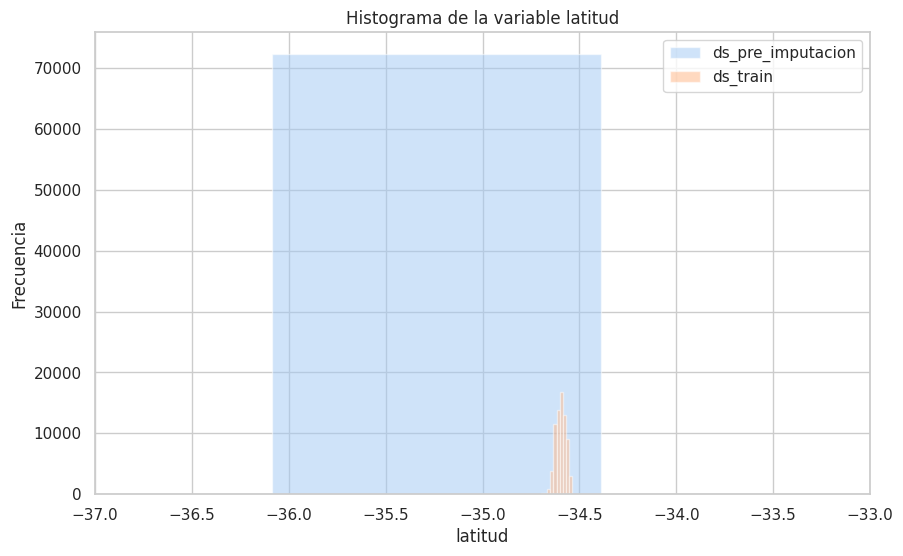

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['latitud'], bins=10, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['latitud'], bins=10, alpha=0.5, label='ds_train')

plt.xlim(-37, -33)

plt.title("Histograma de la variable latitud")
plt.xlabel("latitud")
plt.ylabel("Frecuencia")

plt.legend()

plt.show()

Se puede observar que antes de la imputación, la latitud tenía una frecuencia constante para todos sus valores. Sin embargo, al imputar los datos, la frecuencia varía más, generando una distribución en forma de campana de Gauss. Se destaca que la latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -34.58.

In [ ]:
pre_latitud = obtener_cantidad_variables(ds_pre_imputacion,'latitud')
pre_latitud

latitud  cantidad
0     -34.541250       128
1     -34.619406        98
2     -34.604538        89
3     -34.541616        85
4     -34.581910        80
...          ...       ...
39317 -34.584087         1
39318 -34.579300         1
39319 -34.603205         1
39320 -34.539105         1
39321 -34.581585         1

[39322 rows x 2 columns]

In [ ]:
post_latitud = obtener_cantidad_variables(ds_train,'latitud')
post_latitud

latitud  cantidad
0     -34.541250       128
1     -34.619406        98
2     -34.604538        89
3     -34.541616        85
4     -34.581910        80
...          ...       ...
39170 -34.584087         1
39171 -34.579300         1
39172 -34.603205         1
39173 -34.539105         1
39174 -34.581585         1

[39175 rows x 2 columns]

Parecieran ser iguales... pero lo hemos imputado

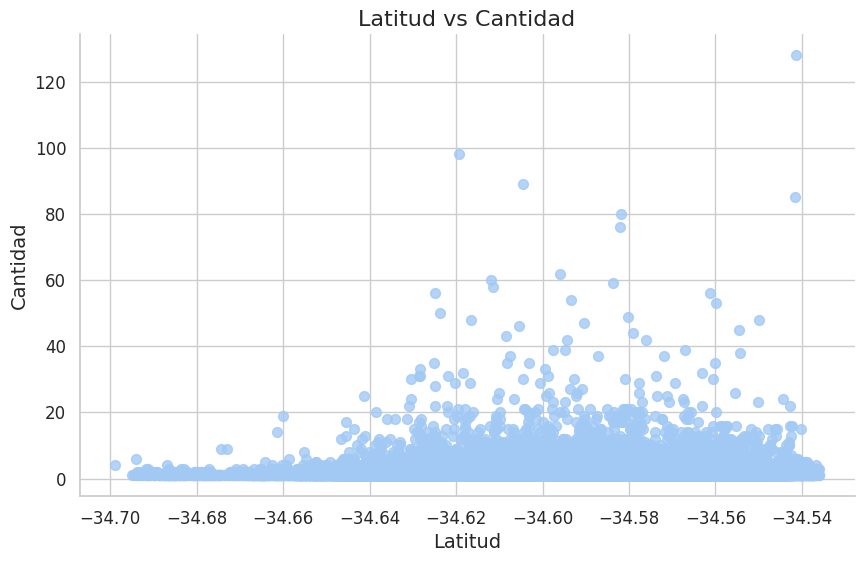

In [ ]:
# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_latitud['latitud'], post_latitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Latitud vs Cantidad", fontsize=16)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [ ]:
pre_latitud.equals(post_latitud)

False

In [ ]:
print(len(pre_latitud))
print(len(post_latitud))
print('diferencia: {}'.format(len(pre_latitud)-len(post_latitud)))

39322
39175
diferencia: 147


#### Comparación longitud

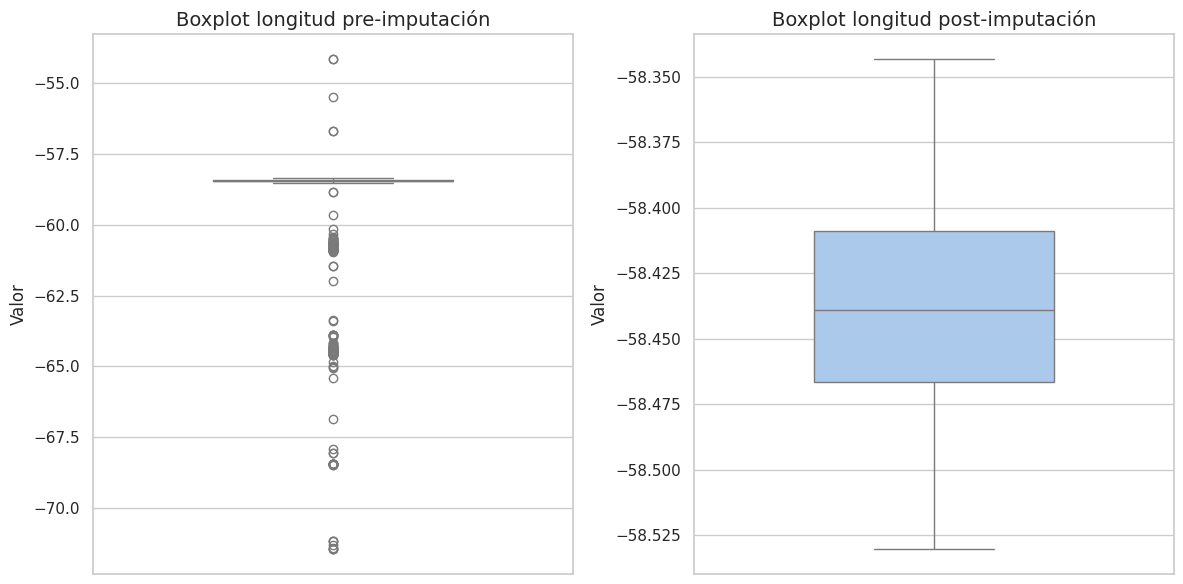

In [ ]:
generar_distribucion("longitud")

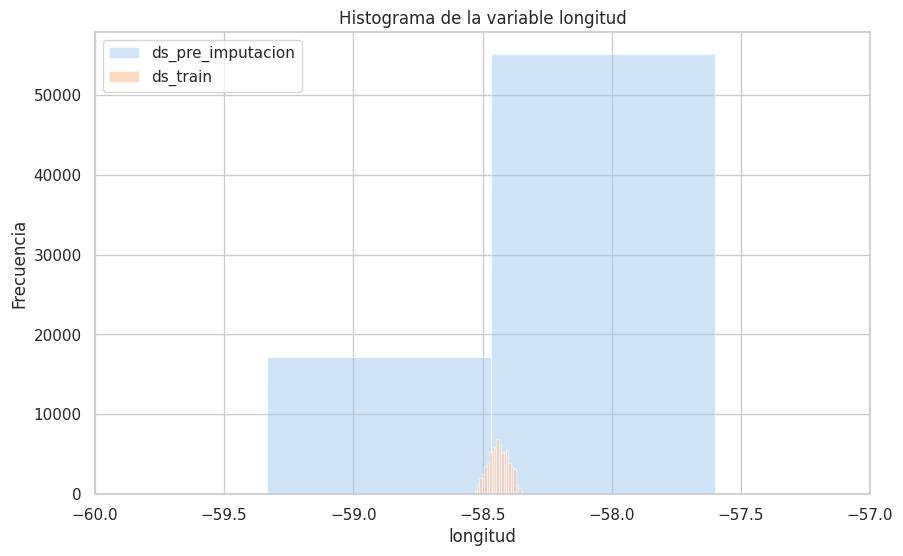

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(ds_pre_imputacion['longitud'], bins=20, alpha=0.5, label='ds_pre_imputacion')

plt.hist(ds_train['longitud'], bins=20, alpha=0.5, label='ds_train')


plt.title("Histograma de la variable longitud")
plt.xlabel("longitud")
plt.ylabel("Frecuencia")

plt.xlim(-60, -57)

plt.legend()

plt.show()

Todos los valores que se mencionarán en el siguiente párrafo se consideran aproximados.

Antes de la imputación, se observa que la latitud tenía una frecuencia medianamente constante. Desde la latitud -59.5 hasta -58.5, la frecuencia es de aproximadamente 18000, luego aumenta en más de 50000 hasta llegar a la latitud -57.5.

Tras la imputación de los datos, se observa una variación en la frecuencia que genera una distribución en forma de campana de Gauss. La latitud aproximada con la máxima cantidad de datos nulos completos es alrededor de -58.400.

In [ ]:
pre_longitud = obtener_cantidad_variables(ds_pre_imputacion,'longitud')
pre_longitud.head()

longitud  cantidad
0 -58.472966       128
1 -58.451999        98
2 -58.424956        89
3 -58.473377        85
4 -58.449381        80

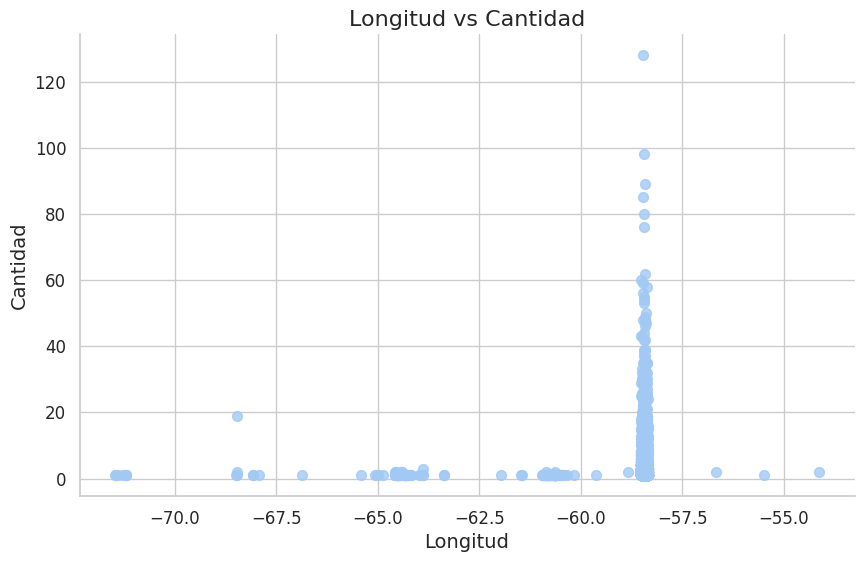

In [ ]:
# @title longitud vs cantidad

# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(pre_longitud['longitud'], pre_longitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Longitud vs Cantidad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
post_longitud = obtener_cantidad_variables(ds_train,'longitud')
post_longitud.head()

longitud  cantidad
0 -58.472966       128
1 -58.451999        98
2 -58.424956        89
3 -58.473377        85
4 -58.449381        80

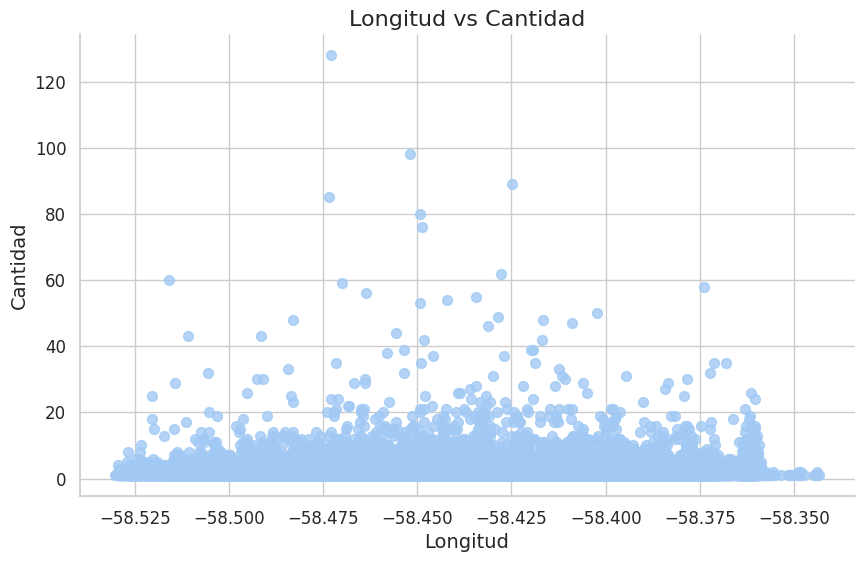

In [ ]:
# @title longitud vs cantidad

# Configuración de estilo y colores
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(post_longitud['longitud'], post_longitud['cantidad'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Longitud vs Cantidad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
pre_longitud.equals(post_longitud)

False

In [ ]:
print(len(pre_longitud))
print(len(post_longitud))
print('diferencia: {}'.format(len(pre_longitud)-len(post_longitud)))

39126
38979
diferencia: 147


#### Comparación place_l3

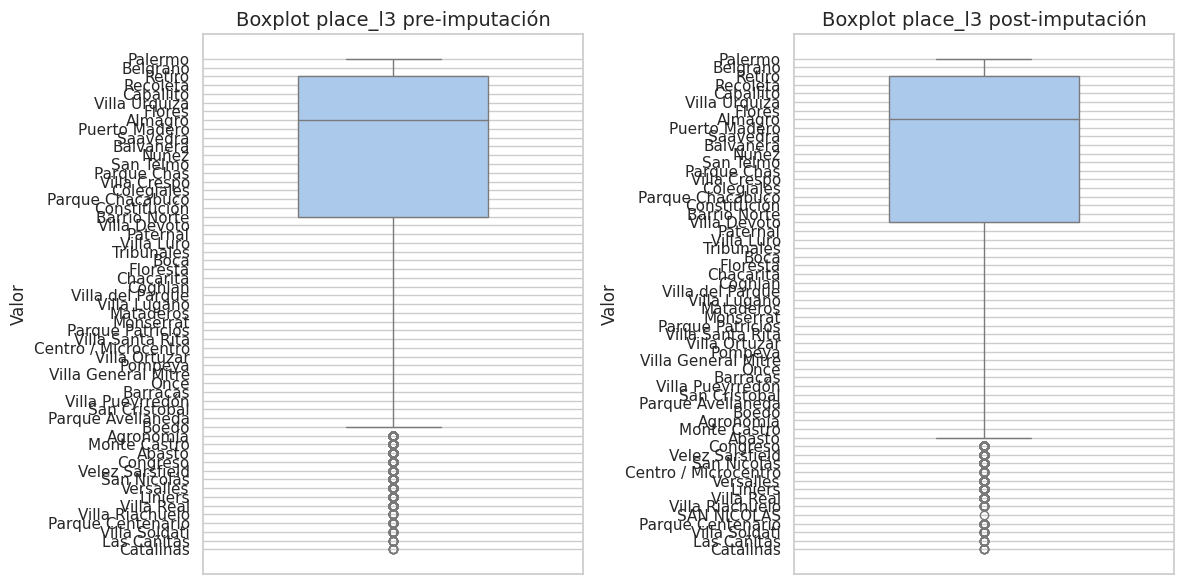

In [ ]:
generar_distribucion("place_l3")

Se observa que antes de la imputación, el barrio con mayor cantidad de propiedades era San Cristóbal, mientras que después de la imputación, la media ha cambiado y ahora es Villa Urquiza. No obstante, Palermo continúa siendo el barrio con la mayor cantidad de propiedades en ambos casos.

In [ ]:
pre_barrio = obtener_cantidad_variables(ds_pre_imputacion,'place_l3')
pre_barrio.head()

place_l3  cantidad
0        Palermo     11517
1       Belgrano      7107
2      Caballito      5730
3       Recoleta      5057
4  Villa Urquiza      3771

In [ ]:
post_barrio = obtener_cantidad_variables(ds_train,'place_l3')
post_barrio.head()

place_l3  cantidad
0        Palermo     10796
1       Belgrano      6582
2      Caballito      5595
3       Recoleta      4869
4  Villa Urquiza      3650

In [ ]:
comparar_imputacion(pre_barrio,post_barrio,'place_l3')

721 registros se imputaron con el valor de Palermo place_l3
525 registros se imputaron con el valor de Belgrano place_l3
135 registros se imputaron con el valor de Caballito place_l3
188 registros se imputaron con el valor de Recoleta place_l3
121 registros se imputaron con el valor de Villa Urquiza place_l3
123 registros se imputaron con el valor de Almagro place_l3
179 registros se imputaron con el valor de Nuñez place_l3
94 registros se imputaron con el valor de Villa Crespo place_l3
87 registros se imputaron con el valor de Flores place_l3
153 registros se imputaron con el valor de Barrio Norte place_l3
59 registros se imputaron con el valor de Balvanera place_l3
8 registros se imputaron con el valor de Colegiales place_l3
6 registros se imputaron con el valor de Villa Devoto place_l3
8 registros se imputaron con el valor de Villa del Parque place_l3
6 registros se imputaron con el valor de Saavedra place_l3
56 registros se imputaron con el valor de Puerto Madero place_l3
74 regist

Podemos concluir que la mayoría de los valores faltantes en la variable "place_l3" fueron completados con el nombre del barrio "Palermo".

# Valores atípicos

In [ ]:
# Hacemos una copia del dataset hasta el momento
ds_atipicos = ds_train.copy()

Funciones auxiliares para el análisis:



In [ ]:
#Función para cálculo de limite superior e inferior de outliers según cuartiles
def limite_rango_iq(df, variable):
  # Cuartiles
  Q1 = np.quantile(df[variable], 0.25)
  Q3 = np.quantile(df[variable], 0.75)

  # Rango intercuartil
  IQR = Q3 - Q1

  # Limite inferior Outliers
  out_inf = Q1 - 1.5 * IQR

  # Limite superior Outliers
  out_sup = Q1 + 1.5 * IQR

  return out_inf, out_sup

# Funcion para cálculo de Z Score normal
def calculo_z_score(serie):
  media = np.mean(serie)
  std = np.std(serie)
  return (serie - media) / std

#Función para calculo de Z Score modificado
def calculo_z_mod(serie):
  median = np.median(serie)
  MAD = np.median(np.absolute(serie - median))
  return (serie - median) * 0.6745 / MAD

# Grafico comparativo
def plot_comparativo(df_antes, df_despues, var):

  # Create subplots
  fig, axs = plt.subplots(1, 2, figsize=(12, 6))

  # Plot for df_antes
  sns.boxplot(y=df_antes[var], ax=axs[0])
  axs[0].set_title('Antes')

  # Plot for df_despues
  sns.boxplot(y=df_despues[var], ax=axs[1])
  axs[1].set_title('Después')

  # Show plots
  plt.tight_layout()
  plt.show()
  return

def plot_por_barrio(df, var):
  # Lista de barrios
  barrios = ['Boca', 'Palermo', 'Balvanera','Barracas', 'Caballito', 'Villa Ortuzar', 'Villa Luro', 'Puerto Madero', 'Pompeya', 'Saavedra', 'Parque Chacabuco', 'Belgrano', 'Recoleta', 'Floresta', 'Monserrat', 'Villa del Parque', 'San Telmo', 'Villa Crespo', 'Tribunales', 'Once', 'Barrio Norte', 'Villa Lugano', 'Congreso', 'Villa Urquiza', 'Mataderos' ]

  # Subplots
  fig, axs = plt.subplots(5, 5, figsize=(16, 8))
  axs = axs.flatten()

  for i, barrio in enumerate(barrios):
      filtered_data = df[df['place_l3'] == barrio]

      sns.boxplot(y=filtered_data[var], ax=axs[i])

      axs[i].set_title(f'{var} en {barrio}')

  # Adjust layout
  plt.tight_layout()
  # Show the plot
  plt.show()
  return



## Análisis univariado

Vamos a intentar identificar los outliers univariados utilizando los cuartiles:

*Análisis según cantidad de habitaciones(property_bedrooms)*

<Axes: ylabel='property_bedrooms'>

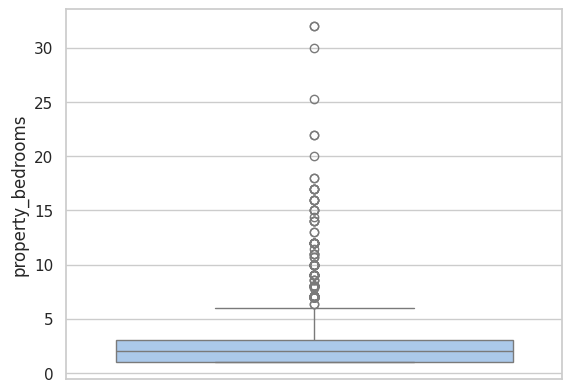

In [ ]:
sns.boxplot(y=ds_train.property_bedrooms)

In [ ]:
limite_rango_iq(ds_train, 'property_bedrooms')

(-2.0, 4.0)

Primero analizamos el outlier más notorio y verificamos si es un valor posible.

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 40]
outlier

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms, place_encoded, type_encoded, score_property_surface, score_price_surface_total, score_location_price, property_location_surface_covered]
Index: []

[0 rows x 21 columns]

Es un departamento de 3 ambientes con 70 habitaciones, lo cual no es posible. Tampoco podemos asumir que es un error de tipeo. A su vez, la superficie total es exagerada en comparación de la superficie cubierta y el precio de la propiedad.  Vamos a eliminar el outlier y visualizar nuevamente el código.  

<ipython-input-529-a0f165733f40>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: ylabel='property_bedrooms'>

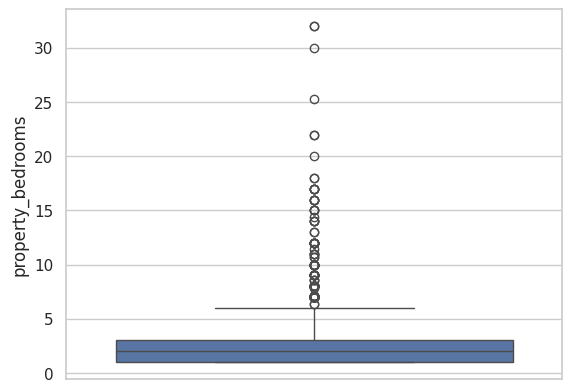

In [ ]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_bedrooms'] > 40].index
ds_train.drop(id_outlier,inplace=True)

# Visualizamos
sns.boxplot(y=ds_train.property_bedrooms)

Existen muchos valores atípicos por sobre el umbral marcado por los cuartiles, pero teniendo en cuenta que estamos trabajando con casas, PH y departamentos unicamente, revisaremos las anomalías mayores a 15, a partir de donde no hay muchas ocurrencias.



In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_bedrooms'] > 15]
outlier

id  start_date    end_date created_on  \
383153  yKLi8zMqxDh2Z65UKO+PkQ==  2021-04-27  2021-06-05 2021-04-27   
396876  pk29cMkSq8YlsIdX3l5pnA==  2021-02-13  2021-04-13 2021-02-13   
153687  hIYED3J2ES+FpL1hmHQ+RA==  2021-02-03  2022-01-05 2021-02-03   
139327  C6M8UyOpx6TJu01OIlOr2Q==  2021-07-15  9999-12-31 2021-07-15   
204253  fSMToafHbqIsdZX8lHKyPg==  2021-05-10  2021-06-05 2021-05-10   
...                          ...         ...         ...        ...   
383324  jrHFWarlhUgF+25jho+WNA==  2021-04-27  2021-09-30 2021-04-27   
329076  7pQB8q765/eK5r5+u1c/Jw==  2021-08-12  2021-09-02 2021-08-12   
147657  lDYicxwXwIHdylImPzFUtQ==  2021-08-19  2021-12-18 2021-08-19   
95788   3JcK/ixvJMkMLVWbpb+gJQ==  2021-07-02  2021-07-28 2021-07-02   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   

          latitud   longitud          place_l3 property_type  property_rooms  \
383153 -34.604356 -58.389095        Tribunales  Departamento             7.0   
396876 -34.604062 -58.405112              Once  Departamento            14.0   
153687 -34.597022 -58.385681      Barrio Norte            PH            17.0   
139327 -34.559671 -58.458406          Belgrano  Departamento            10.0   
204253 -34.597831 -58.388162      Barrio Norte  Departamento            11.0   
...           ...        ...               ...           ...             ...   
383324 -34.665193 -58.477331      Villa Lugano          Casa             8.0   
329076 -34.643577 -58.402385  Parque Patricios          Casa            10.0   
147657 -34.609154 -58.383631          Congreso  Departamento            10.0   
95788  -34.658535 -58.481791         Mataderos          Casa            12.0   
239181 -34.572554 -58.469842          Belgrano          Casa             8.0   

        property_bedrooms  ...  property_surface_covered  property_price  \
383153           7.000000  ...                     114.0        260000.0   
396876          12.000000  ...                     179.0        220000.0   
153687          14.000000  ...                     836.0        950000.0   
139327           7.079395  ...                     168.0        620000.0   
204253          10.000000  ...                     636.0        900000.0   
...                   ...  ...                       ...             ...   
383324           7.000000  ...                      85.0        185000.0   
329076           9.000000  ...                     489.0        395000.0   
147657           9.000000  ...                     227.0        370000.0   
95788           10.000000  ...                     400.0        130000.0   
239181           7.000000  ...                     400.0        920000.0   

        z_property_bedrooms  zm_property_bedrooms  place_encoded  \
383153             4.677254              4.677254             42   
396876             9.269269              9.269269             25   
153687            11.106075             11.106075              5   
139327             4.750170              4.750170              6   
204253             7.432463              7.432463              5   
...                     ...                   ...            ...   
383324             4.677254              4.677254             48   
329076             6.514060              6.514060             31   
147657             6.514060              6.514060             15   
95788              7.432463              7.432463             21   
239181             4.677254              4.677254              6   

        type_encoded  score_property_surface  score_price_surface_total  \
383153            42               -1.000000                  -0.987114   
396876            25               -0.996709                  -1.299475   
153687             5               -1.097851                  -3.660207   
139327             6               -1.000000                  -1.172751   
204253             5               -0.982847                  -2.291948   
...              ...                

Tenemos 230 anomalías. Los casos donde el número de ambientes es razonable, parece error de tipeo. Lo corregimos

In [ ]:
condition = (ds_train['property_bedrooms'] > 15) & (ds_train['property_rooms'] < 10)
ds_train.loc[condition, 'property_surface_covered'] /= 10

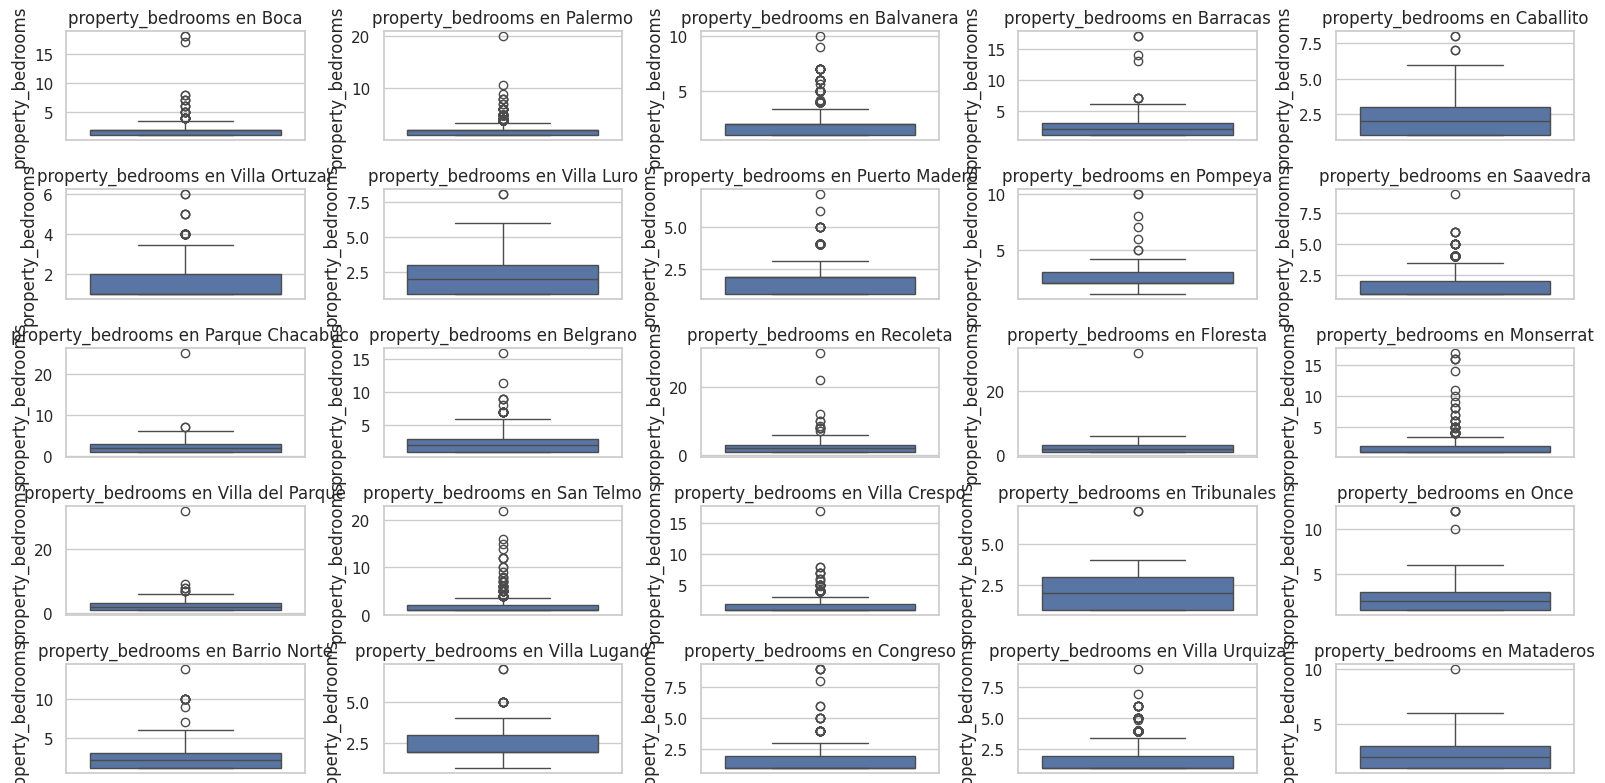

In [ ]:
plot_por_barrio(ds_train, 'property_bedrooms')

Analizando los boxplot de la cantidad de habitaciones pero dividido según el barrio en el que se encuentra la propiedad, podemos ver aún teniendo en cuenta las variaciones, que aquellos casos de casas con más de 8 habitaciones son outliers extremos y decidimos normalizarlas utilizando una transformación logaritmica.

Nota: el limite intercuartil en general para la zona de CABA era 4, pero como vemos en barrios como Caballito esto se encuentra totalmente dentro de la norma.

In [ ]:
ds_train.loc[ds_train['property_bedrooms'] > 7.0, 'property_bedrooms'] = np.log(ds_train['property_bedrooms'])

In [ ]:
ds_train[ds_train['property_bedrooms'] > 6]

id  start_date    end_date created_on  \
383153  yKLi8zMqxDh2Z65UKO+PkQ==  2021-04-27  2021-06-05 2021-04-27   
449071  o2xzCwXzVpbeYQv+JDXvZg==  2021-12-16  2022-02-09 2021-12-16   
115164  LRNvV58vN16ANMg0WmEEgw==  2021-12-07  2022-01-27 2021-12-07   
338774  +OlRqaMH9p1Z9IPpkiPABg==  2021-06-01  2021-06-19 2021-06-01   
74058   0mycft4Dy3FaSpULNEt6HA==  2021-07-03  2021-08-11 2021-07-03   
...                          ...         ...         ...        ...   
251811  AXcoUMwXUfZ/taJ27RlqYw==  2021-06-18  2021-08-25 2021-06-18   
48594   ySJjTglhdNcH9z9PTJhvZw==  2021-08-15  2022-02-09 2021-08-15   
325449  LZhr2owtQ83MiDi55T7vfA==  2021-08-27  2022-03-29 2021-08-27   
383324  jrHFWarlhUgF+25jho+WNA==  2021-04-27  2021-09-30 2021-04-27   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   

          latitud   longitud      place_l3 property_type  property_rooms  \
383153 -34.604356 -58.389095    Tribunales  Departamento             7.0   
449071 -34.621588 -58.455720        Flores            PH             8.0   
115164 -34.639049 -58.423623     Caballito            PH            10.0   
338774 -34.562157 -58.464230      Belgrano          Casa             7.0   
74058  -34.616128 -58.394715     Balvanera          Casa             8.0   
...           ...        ...           ...           ...             ...   
251811 -34.629273 -58.418845         Boedo          Casa            12.0   
48594  -34.604668 -58.396573     Balvanera  Departamento             8.0   
325449 -34.598801 -58.436084  Villa Crespo          Casa             5.0   
383324 -34.665193 -58.477331  Villa Lugano          Casa             8.0   
239181 -34.572554 -58.469842      Belgrano          Casa             8.0   

        property_bedrooms  ...  property_surface_covered  property_price  \
383153                7.0  ...                     114.0        260000.0   
449071                7.0  ...                     230.0        590000.0   
115164                7.0  ...                     430.0        270000.0   
338774                7.0  ...                     118.0        175000.0   
74058                 7.0  ...                     143.0        230000.0   
...                   ...  ...                       ...             ...   
251811                7.0  ...                     500.0        450000.0   
48594                 7.0  ...                     232.0        358000.0   
325449                7.0  ...                     274.0        430000.0   
383324                7.0  ...                      85.0        185000.0   
239181                7.0  ...                     400.0        920000.0   

        z_property_bedrooms  zm_property_bedrooms  place_encoded  \
383153             4.677254              4.677254             42   
449071             4.677254              4.677254             17   
115164             4.677254              4.677254              9   
338774             4.677254              4.677254              6   
74058              4.677254              4.677254              3   
...                     ...                   ...            ...   
251811             4.677254              4.677254              8   
48594              4.677254              4.677254              3   
325449             4.677254              4.677254             45   
383324             4.677254              4.677254             48   
239181             4.677254              4.677254              6   

        type_encoded  score_property_surface  score_price_surface_total  \
383153            42               -1.000000                  -0.987114   
449071            17               -1.067839                  -5.555790   
115164             9               -1.030651                  -3.819171   
338774             6               -1.000000                  -1.030568   
74058              3               -0.983950                  -1.153849   
...              ...                     ...                        ...   
251811   

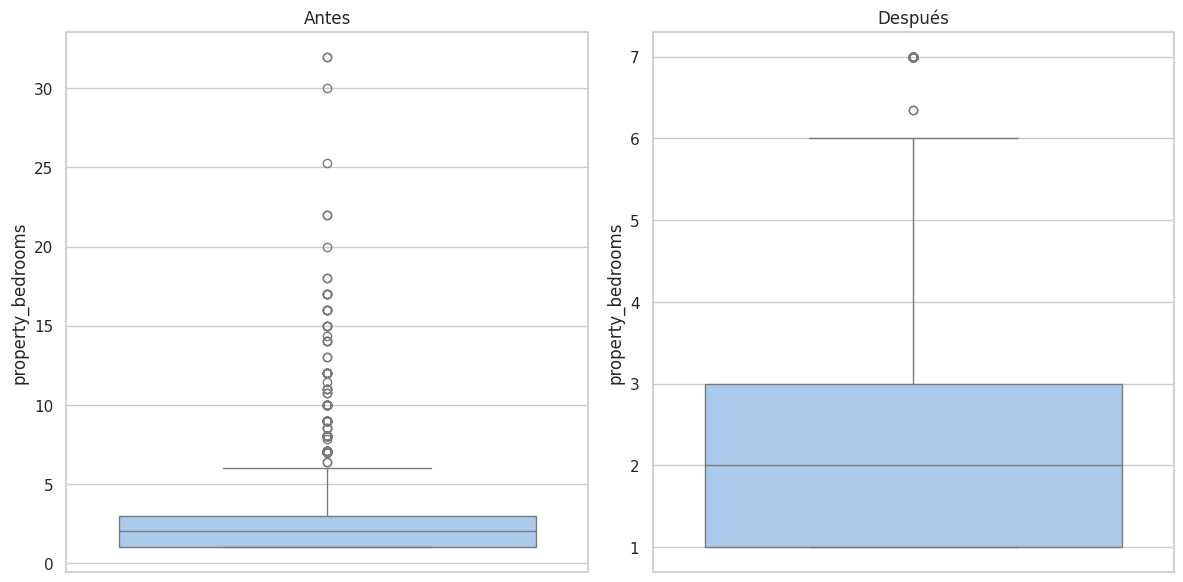

In [ ]:
plot_comparativo(ds_atipicos, ds_train, 'property_bedrooms')

Podemos ver que se han solucionado la mayoría de las anomalías. Dejaremos las restantes (84 registros) para el análisis multivariado.

*Análisis según cantidad de ambientes (property_rooms)*

<Axes: ylabel='property_rooms'>

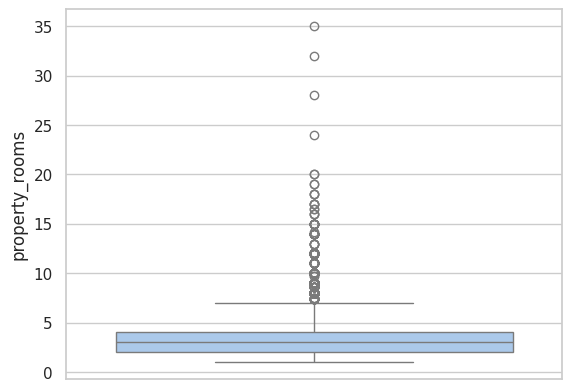

In [ ]:
sns.boxplot(y=ds_train.property_rooms)

In [ ]:
limite_rango_iq(ds_train, 'property_rooms')

(-1.0, 5.0)

Vemos que si bien hay muchos outliers por sobre el limite de 5 ambientes, esto se acentúa una vez que se superan los 20 ambientes.

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_rooms'] > 20]
outlier

id  start_date    end_date created_on  \
292167  CxZv3EmTnK+m6EJD2uQ5fw==  2021-02-23  2021-03-03 2021-02-23   
90004   TEs1aRnhJPwR0jRMq/Vzdg==  2021-08-03  9999-12-31 2021-08-03   
150885  X3WGOe/PrGS1u+xozM5elA==  2021-03-24  2021-06-05 2021-03-24   
389282  +xTrflFUv4fEGjwpwhP68w==  2021-05-05  2021-06-05 2021-05-05   

          latitud   longitud          place_l3 property_type  property_rooms  \
292167 -34.616487 -58.371596         San Telmo            PH            24.0   
90004  -34.633236 -58.480313          Floresta            PH            32.0   
150885 -34.642037 -58.438995  Parque Chacabuco  Departamento            35.0   
389282 -34.570959 -58.458106          Belgrano          Casa            28.0   

        property_bedrooms  ...  property_surface_covered  property_price  \
292167           3.091042  ...                     650.0        350000.0   
90004            3.465736  ...                     435.0        300000.0   
150885           3.229516  ...                      33.0         67000.0   
389282           2.772589  ...                     845.0        950000.0   

        z_property_bedrooms  zm_property_bedrooms  place_encoded  \
292167            18.453300             18.453300             41   
90004             27.637330             27.637330             18   
150885            21.454107             21.454107             29   
389282            12.942881             12.942881              6   

        type_encoded  score_property_surface  score_price_surface_total  \
292167            41               -1.148703                  -6.690355   
90004             18               -1.027860                  -3.421822   
150885            29               -1.000000                  -1.000000   
389282             6               -1.107942                  -3.711956   

        score_location_price  property_location_surface_covered  
292167             -1.651065                          -1.001785  
90004              -1.443859                          -1.152537  
150885             -1.077582                          -1.000000  
389282             -1.000392                          -1.179406  

[4 rows x 21 columns]

Si bien los datos de habitaciones y ambientes no son posibles, por ahora no serán borrados ya que el resto (superficie cubierta, precio) parecen coherentes con el resto del dataset y pueden ser útiles.

Controlaremos según barrio.

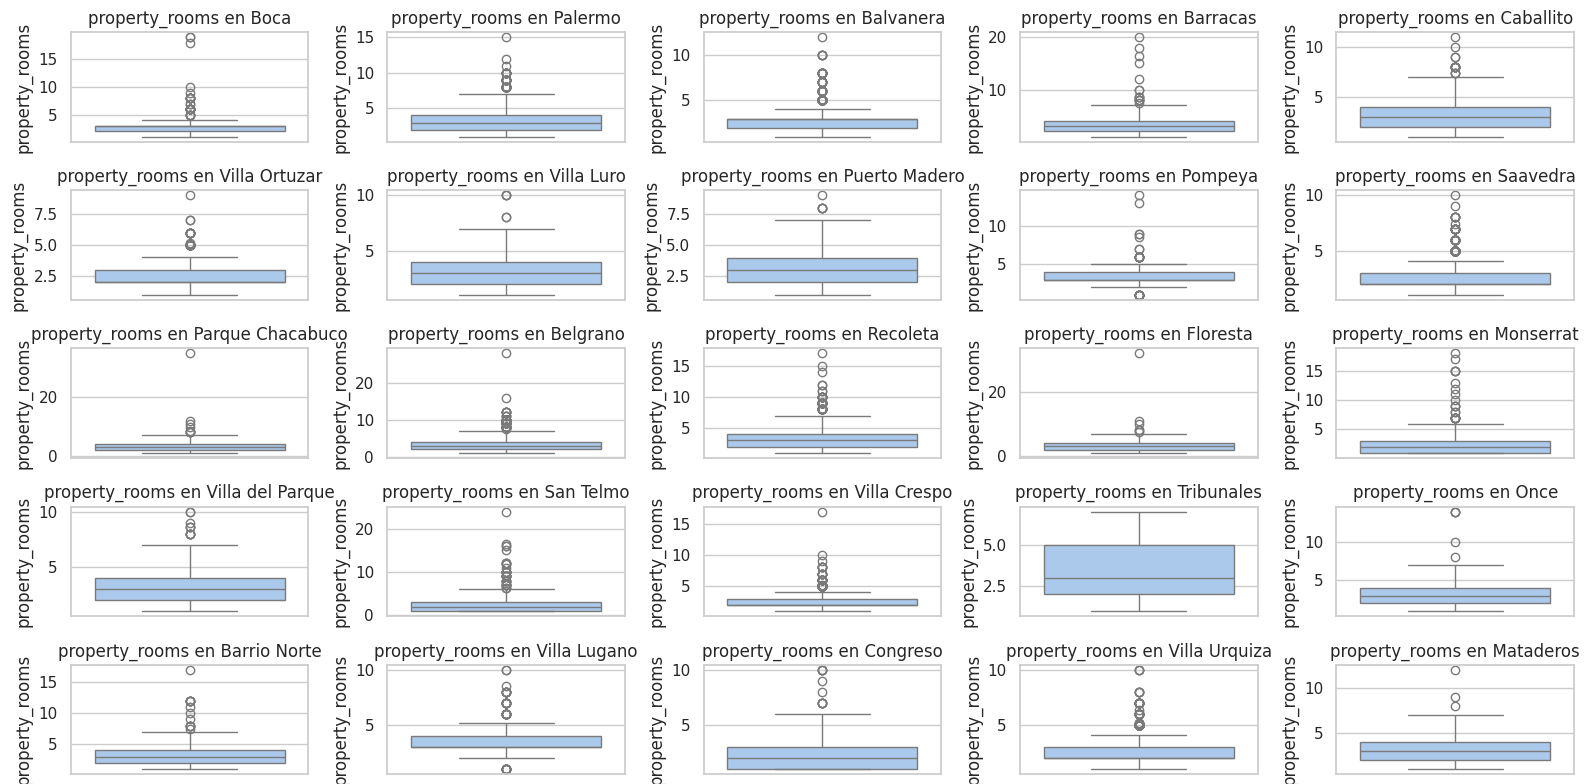

In [ ]:
plot_por_barrio(ds_train, 'property_rooms')

Si bien nuestro límite intercuartil era de 5.0 vemos una tendencia un poco superior al ver los boxplot por barrio, así que realizaremos una corrección en aquellos registros atípicos que superen los 10 ambientes.

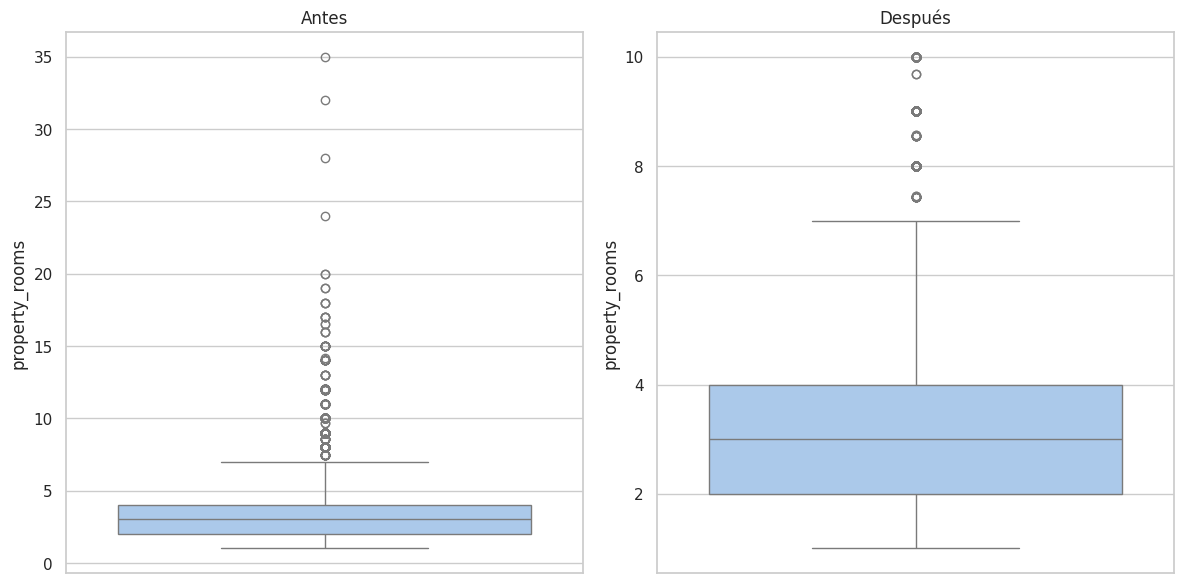

In [ ]:
#Normalizacion logaritmica
ds_train.loc[ds_train['property_rooms'] > 10.0, 'property_rooms'] = np.log(ds_train['property_rooms'])

#Comparación del antes y después del analisis de la variable
plot_comparativo(ds_atipicos, ds_train, 'property_rooms')

*Análisis según precio de la propiedad (property_price)*

<Axes: ylabel='property_price'>

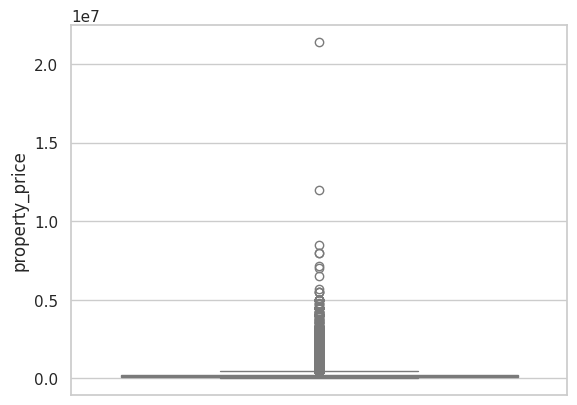

In [ ]:
sns.boxplot(y=ds_train.property_price)

In [ ]:
limite_rango_iq(ds_train, 'property_price')

(-115000.0, 305000.0)

Primero analizamos las anomalías más extremas, valores mayores o iguales a 8M.

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_price'] >= 8000000]
outlier

id  start_date    end_date created_on  \
60073   uoM9HDKq3jZKQKgHXTIGkg==  2021-01-25  2022-05-13 2021-01-25   
156777  8ChrVZoOYyEqAJMIP/pXoQ==  2021-02-17  2021-02-19 2021-02-17   
248285  I3+CMvLB+tmeXtDg3XmSBA==  2021-09-13  2021-09-16 2021-09-13   
148534  AExqjjuaRO2KtiPjC8BUiQ==  2021-05-12  2021-05-14 2021-05-12   
85725   pKJUYwxjs9j+ub8gzLyc/g==  2021-03-26  2021-06-05 2021-03-26   

          latitud   longitud   place_l3 property_type  property_rooms  \
60073  -34.616044 -58.458621  Caballito  Departamento             3.0   
156777 -34.608300 -58.371200  Monserrat          Casa             3.0   
248285 -34.596801 -58.383768   Recoleta  Departamento             8.0   
148534 -34.565947 -58.442326   Belgrano          Casa             9.0   
85725  -34.572494 -58.462433   Belgrano          Casa             5.0   

        property_bedrooms  ...  property_surface_covered  property_price  \
60073            1.985606  ...                      64.0      21400000.0   
156777           2.000000  ...                      93.0       8500000.0   
248285           2.000000  ...                     150.0       8000000.0   
148534           5.000000  ...                    1763.0       8000000.0   
85725            4.000000  ...                    3367.0      12000000.0   

        z_property_bedrooms  zm_property_bedrooms  place_encoded  \
60073              0.072020              0.072020              9   
156777             0.085239              0.085239             22   
248285             0.085239              0.085239             35   
148534             2.840448              2.840448              6   
85725              1.922045              1.922045              6   

        type_encoded  score_property_surface  score_price_surface_total  \
60073              9               -1.000000                 -18.587442   
156777            22               -1.106687                  -4.345021   
248285            35               -2.343593                  -3.963638   
148534             6               -4.581417                  -3.963639   
85725              6               -6.814072                  -8.025646   

        score_location_price  property_location_surface_covered  
60073             -20.739087                          -1.000000  
156777             -4.867850                          -1.169887  
248285             -4.402659                          -1.000000  
148534             -4.402659                          -5.620487  
85725              -8.986319                          -9.023390  

[5 rows x 21 columns]

Buscando propiedades actualmente en venta en barrios y tamaños similares, parecería haber un error. Sin embargo, incluso haciendo un reducción de un decimo (valores más coherentes para esos varrios y tamaños de casas), estaríamos por sobre el límite intercuartil, asi que por ahora no haremos transformaciones.

Analicemos según barrio:

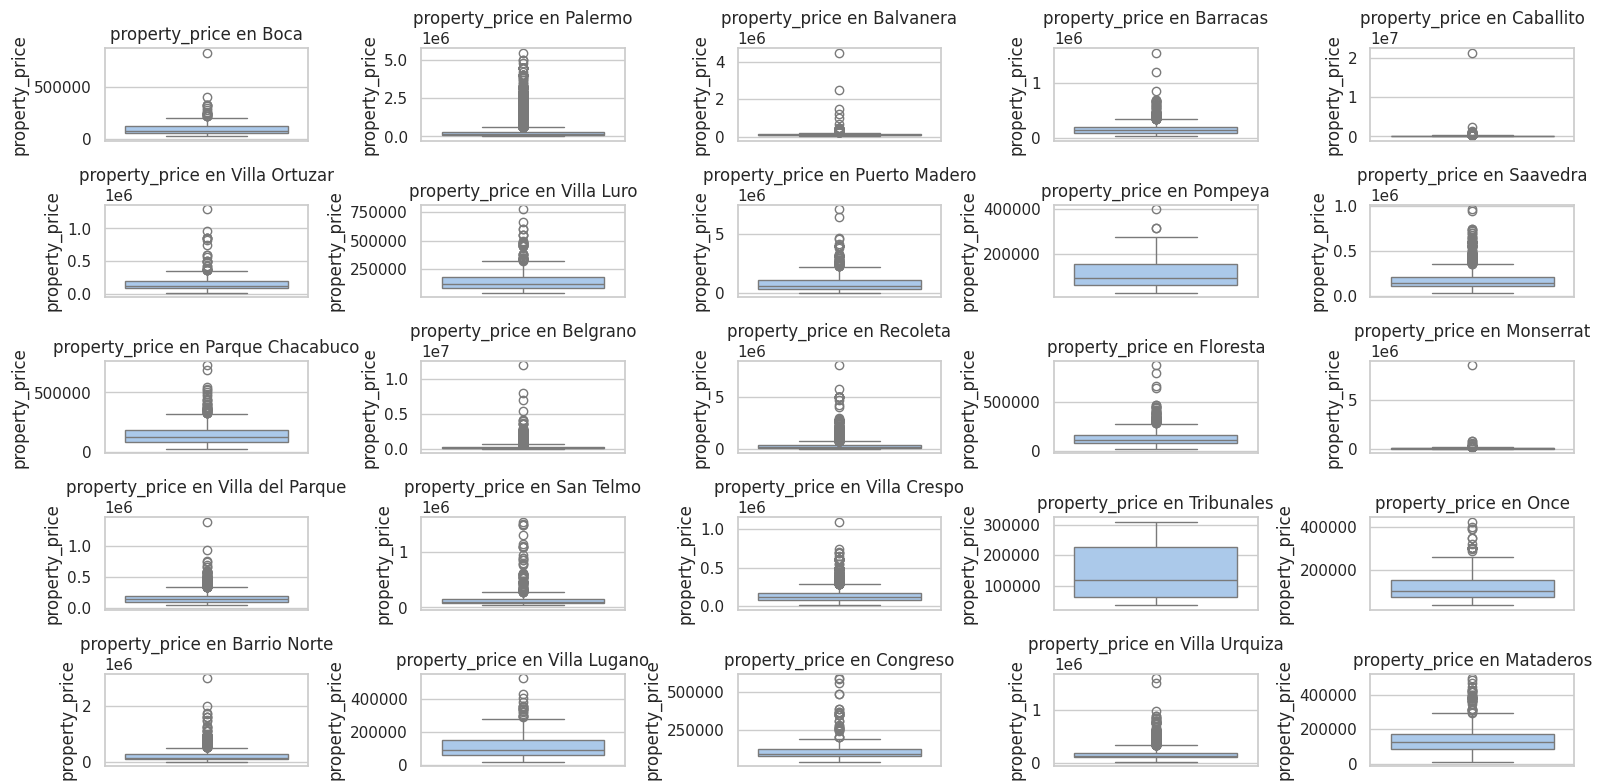

In [ ]:
plot_por_barrio(ds_train, 'property_price')

Hasta el momento, este el analisis según barrio menos homogéneo. Si tomamos el limite superior intercuartil general (305), se distorcionarían totalmente los datos de barrios como Palermo y Puerto Madero. Teniendo en cuenta lo relevante que es éste dato a la hora de que se establezca el precio de una propiedad, solo trabajaremos con los outliers que sean extremos en el contexto de cada barrio.

*Análisis según superficie cubierta (property_surface_covered)*

<Axes: ylabel='property_surface_covered'>

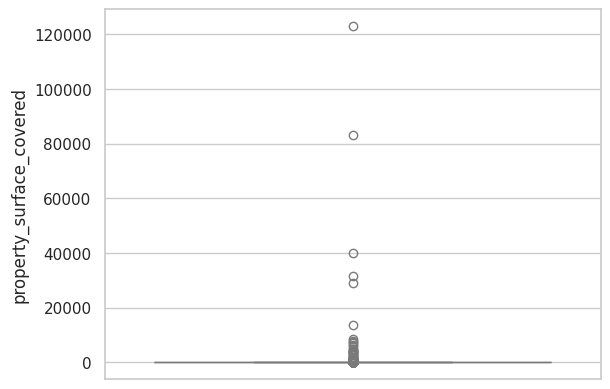

In [ ]:
sns.boxplot(y=ds_train.property_surface_covered)

In [ ]:
limite_rango_iq(ds_train, 'property_surface_covered')

(-32.0, 112.0)

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_covered'] < 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_covered'].idxmin()
ds_train.loc[min_surface_index]

id                          em6zu1jxzH6eFzsNOQhHBQ==
start_date                                2021-02-12
end_date                                  2021-03-05
created_on                       2021-02-12 00:00:00
latitud                                    -34.63343
longitud                                  -58.480731
place_l3                                    Floresta
property_type                                     PH
property_rooms                                   2.0
property_bedrooms                                1.0
property_surface_total                     25.232129
property_surface_covered                         1.0
property_price                               52000.0
Name: 227332, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [ ]:
ds_train[ds_train['property_surface_covered'] > 15000]

id  start_date    end_date created_on  \
199905  EDZUWORq83zRgdk9Zqlv+A==  2021-07-25  9999-12-31 2021-07-25   
117835  vyRPw0ch6cIj9Ki5yPUneA==  2021-08-18  2021-08-23 2021-08-18   
352883  aBZBrjan1XqHjgvjHK6K6Q==  2021-06-25  2021-07-08 2021-06-25   
405324  tHz32dZ72wYshPnoABftrg==  2021-01-07  2021-06-02 2021-01-07   
72521   csbBJk04jQXgGZLXTj5WAg==  2021-05-29  2021-06-13 2021-05-29   

          latitud   longitud       place_l3 property_type  property_rooms  \
199905 -34.604362 -58.392366   Barrio Norte  Departamento             4.0   
117835 -34.550093 -58.483034       Saavedra  Departamento             2.0   
352883 -34.550093 -58.483034       Saavedra  Departamento             1.0   
405324 -34.569963 -58.481658  Villa Urquiza            PH             4.0   
72521  -34.600113 -58.403649      Balvanera  Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
199905           2.996493                    83.0                   83000.0   
117835           1.000000                 43086.0                   40038.0   
352883           1.000000                 29064.0                   29064.0   
405324           3.000000                123000.0                  123000.0   
72521            1.000000                 33800.0                   31670.0   

        property_price  
199905        155000.0  
117835        114000.0  
352883         87400.0  
405324        165000.0  
72521          66000.0

Los casos de propiedades con superficie cubierta mayor a 15000, parecen ser errores de escala que pueden solucionarse facilmente.

In [ ]:
condition = ds_train['property_surface_covered'] > 15000
ds_train.loc[condition, 'property_surface_covered'] /= 1000

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 15000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
ds_train[ds_train['property_surface_covered'] > 4000]

id  start_date    end_date created_on  \
459847  zMligt7YdiayCjrfqlmbfg==  2021-01-05  2021-01-09 2021-01-05   
405272  f0j0vRkfBQUg9LkKhc/Nmw==  2021-01-07  2021-01-09 2021-01-07   
459842  Y4PuRUaAW17tsLGwFTukhA==  2021-01-05  2021-01-09 2021-01-05   
314541  /lzClyxH96pdJl/JI2ofKg==  2021-01-06  2021-01-09 2021-01-06   
398069  Z41Yr6x3GUjyoxu+Afv4og==  2021-02-13  2021-03-18 2021-02-13   
233699  McdySYNyXo2s4UZ2wypUig==  2021-03-20  2022-03-25 2021-03-20   
264624  6uTpssfQ51+UbuvaOXfeRw==  2021-02-26  2021-03-01 2021-02-26   
94789   jXPtdq0ibrnXyePLhTi27g==  2021-09-24  2021-09-26 2021-09-24   
313745  fx1g9YinBKRFrlnCnN6p4Q==  2021-01-06  2021-01-09 2021-01-06   
459841  9aQHQRqWMburSn+z+Qt5aQ==  2021-01-05  2021-01-09 2021-01-05   
459849  +9w0GBZbuObF0Nw6AAtu2Q==  2021-01-05  2021-01-09 2021-01-05   

          latitud   longitud       place_l3 property_type  property_rooms  \
459847 -34.628247 -58.437696      Caballito  Departamento             4.0   
405272 -34.634638 -58.473519       Floresta            PH             4.0   
459842 -34.628397 -58.437706      Caballito  Departamento             3.0   
314541 -34.555086 -58.459669       Belgrano  Departamento             1.0   
398069 -34.558309 -58.459923       Belgrano  Departamento             2.0   
233699 -34.606260 -58.452737   Villa Crespo  Departamento             2.0   
264624 -34.576139 -58.468259  Villa Ortuzar  Departamento             5.0   
94789  -34.614279 -58.361092      Caballito  Departamento             2.0   
313745 -34.649174 -58.413106        Pompeya            PH             6.0   
459841 -34.627876 -58.437996      Caballito  Departamento             3.0   
459849 -34.628282 -58.437803      Caballito  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
459847                3.0                 18096.0                    8568.0   
405272                3.0                  8306.0                    7755.0   
459842                2.0                  8136.0                    6472.0   
314541                1.0                  5741.0                    4276.0   
398069                1.0                  6470.0                    4664.0   
233699                1.0                  4224.0                    4224.0   
264624                4.0                 14744.0                   13717.0   
94789                 1.0                  5312.0                    4809.0   
313745                2.0                  8988.0                    7454.0   
459841                2.0                  7153.0                    7153.0   
459849                2.0                  7720.0                    5970.0   

        property_price  
459847        324558.0  
405272        129000.0  
459842        203550.0  
314541         85144.0  
398069        149900.0  
233699        100000.0  
264624        330000.0  
94789         145000.0  
313745        125000.0  
459841        177807.0  
459849        167894.0

Mismo que con las propiedades con superficie cubierta mayor a 5000, parece ser un problema de escala.

In [ ]:
condition = ds_train['property_surface_covered'] > 4000
ds_train.loc[condition, 'property_surface_covered'] /= 100

# Vemos si se ha solucionado la anomalía para ésta condición
ds_train[ds_train['property_surface_covered'] > 4000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

*Análisis según superficie total (property_surface_total)*



<Axes: ylabel='property_surface_total'>

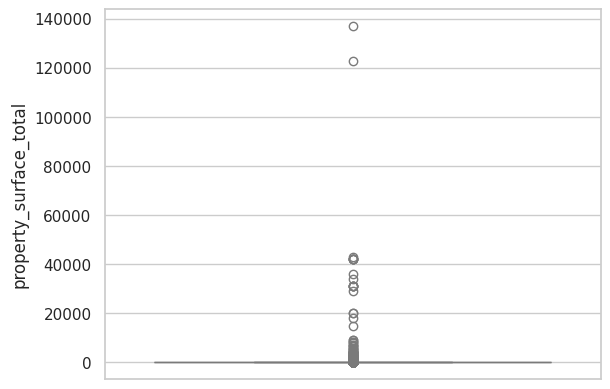

In [ ]:
sns.boxplot(y=ds_train.property_surface_total)

In [ ]:
limite_rango_iq(ds_train, 'property_surface_total')

(-46.5, 136.5)

In [ ]:
# Observación anómala
outlier = ds_train[ds_train['property_surface_total'] < 0]
outlier


Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

In [ ]:
# Comprobamos buscando indice con la propiedad con la mínima superficie.
min_surface_index = ds_train['property_surface_total'].idxmin()
ds_train.loc[min_surface_index]

id                          i16eZUm9vHNMrQMT82+9hQ==
start_date                                2021-02-16
end_date                                  2021-12-09
created_on                       2021-02-16 00:00:00
latitud                                   -34.634265
longitud                                  -58.505317
place_l3                                  Villa Luro
property_type                           Departamento
property_rooms                                   3.0
property_bedrooms                           1.985288
property_surface_total                          10.0
property_surface_covered                    52.68284
property_price                              120000.0
Name: 180380, dtype: object

 No existen propiedades con superficie negativa.
 Aún así, podemos ver que hay propiedades con superficies que si bien no son negativas, son demasiado pequeñas para el tipo de edificación.

In [ ]:
ds_train[ds_train['property_surface_total'] > 100000]

id  start_date    end_date created_on  \
129214  tJ7TjXeyIl+4KPkaPqyAYA==  2021-07-01  9999-12-31 2021-07-01   
405324  tHz32dZ72wYshPnoABftrg==  2021-01-07  2021-06-02 2021-01-07   

          latitud   longitud       place_l3 property_type  property_rooms  \
129214 -34.599421 -58.386867   Barrio Norte  Departamento             5.0   
405324 -34.569963 -58.481658  Villa Urquiza            PH             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
129214                3.0                137000.0                     135.0   
405324                3.0                123000.0                     123.0   

        property_price  
129214        390000.0  
405324        165000.0

En el caso de la propiedad de Parque Chacabuco, ninguno de los datos tiene coherencia al mirarlos en conjunto: una casa de 22.75 ambientes, y 17.23 habitaciones, con una superficie cubierta de 217.0 y total de 177198m2. Tendriamos que imputar todos estos datos lo cual no tendría sentido, nos quedariamos con poco material real.

En los otros dos casos, parece ser más un error de escala asi que lo normalizamos.

In [ ]:
# Eliminamos outlier por indice
id_outlier = ds_train[ds_train['property_surface_total'] > 170000].index
ds_train.drop(id_outlier,inplace=True)

<ipython-input-465-5a202d8d3887>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Modificamos los otros
condition = ds_train['property_surface_total'] > 100000
ds_train.loc[condition, 'property_surface_total'] /= 1000

ds_train[ds_train['property_surface_total'] > 100000]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price]
Index: []

### **Z-Score, normal y modificado**

In [ ]:
def plot_z(df, variable):
  plt.hist(df[variable])
  plt.title("Histograma Z-Score "+ variable)
  plt.xlabel("Z-Score "+variable)
  plt.tight_layout()
  plt.show()
  return

<ipython-input-468-1ce1084e760a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-468-1ce1084e760a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



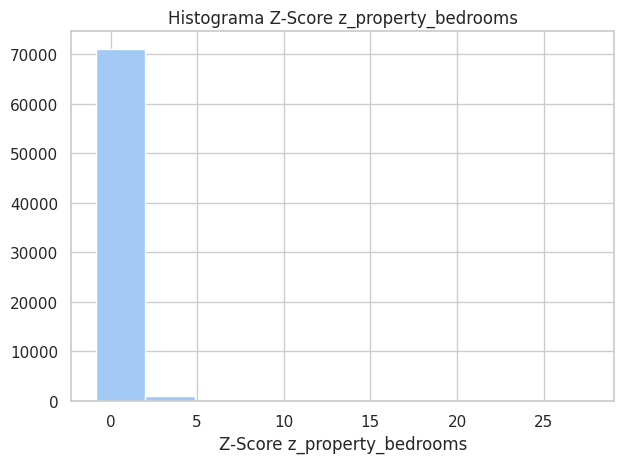

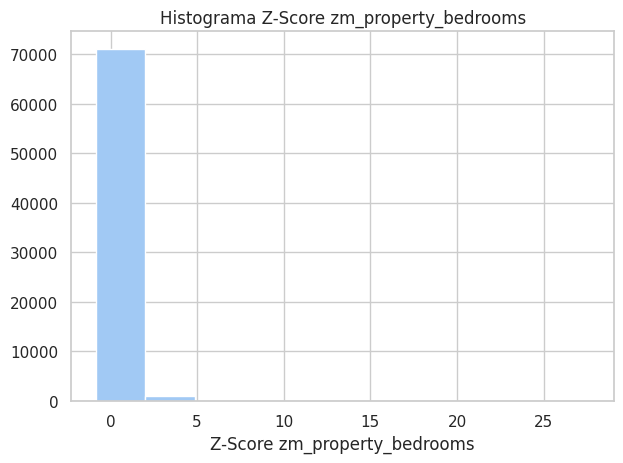

In [ ]:
# Z Score property_bedrooms
ds_train['z_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)
ds_train['zm_property_bedrooms'] = calculo_z_score(ds_train.property_bedrooms)

plot_z(ds_train, 'z_property_bedrooms')
plot_z(ds_train, 'zm_property_bedrooms')


In [ ]:
ds_train[(ds_train['z_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
383153  yKLi8zMqxDh2Z65UKO+PkQ==  2021-04-27  2021-06-05 2021-04-27   
396876  pk29cMkSq8YlsIdX3l5pnA==  2021-02-13  2021-04-13 2021-02-13   
1040    hg7z9YXumyiWLjMo6ed2Eg==  2021-09-09  2022-03-09 2021-09-09   
435004  LRiqymZEtyvNeISdcMo+Ag==  2021-08-25  2021-08-27 2021-08-25   
153687  hIYED3J2ES+FpL1hmHQ+RA==  2021-02-03  2022-01-05 2021-02-03   
...                          ...         ...         ...        ...   
329076  7pQB8q765/eK5r5+u1c/Jw==  2021-08-12  2021-09-02 2021-08-12   
147657  lDYicxwXwIHdylImPzFUtQ==  2021-08-19  2021-12-18 2021-08-19   
95788   3JcK/ixvJMkMLVWbpb+gJQ==  2021-07-02  2021-07-28 2021-07-02   
439713  WjSPOpNqWFCGBOdoVcvPQQ==  2021-07-20  2022-02-17 2021-07-20   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   

          latitud   longitud          place_l3 property_type  property_rooms  \
383153 -34.604356 -58.389095        Tribunales  Departamento             7.0   
396876 -34.604062 -58.405112              Once  Departamento            14.0   
1040   -34.620750 -58.502759        Villa Luro          Casa             8.0   
435004 -34.629113 -58.364345              Boca          Casa             7.0   
153687 -34.597022 -58.385681      Barrio Norte            PH            17.0   
...           ...        ...               ...           ...             ...   
329076 -34.643577 -58.402385  Parque Patricios          Casa            10.0   
147657 -34.609154 -58.383631          Congreso  Departamento            10.0   
95788  -34.658535 -58.481791         Mataderos          Casa            12.0   
439713 -34.616682 -58.370246         San Telmo            PH             8.0   
239181 -34.572554 -58.469842          Belgrano          Casa             8.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
383153                7.0                   114.0                     114.0   
396876               12.0                   301.0                     179.0   
1040                  6.0                   201.0                     201.0   
435004                6.0                   500.0                     400.0   
153687               14.0                   836.0                     836.0   
...                   ...                     ...                       ...   
329076                9.0                   519.0                     489.0   
147657                9.0                   240.0                     227.0   
95788                10.0                   370.0                     400.0   
439713                6.0                   247.0                     177.0   
239181                7.0                   400.0                     400.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
383153        260000.0             4.677254              4.677254  
396876        220000.0             9.269269              9.269269  
1040          345000.0             3.758851              3.758851  
435004        222000.0             3.758851              3.758851  
153687        950000.0            11.106075             11.106075  
...                ...                  ...                   ...  
329076        395000.0             6.514060              6.514060  
147657        370000.0             6.514060              6.514060  
95788         130000.0             7.432463              7.432463  
439713        320000.0             3.758851              3.758851  
239181        920000.0             4.677254              4.677254  

[415 rows x 15 columns]

In [ ]:
ds_train[(ds_train['zm_property_bedrooms'] > 3.5)]

id  start_date    end_date created_on  \
383153  yKLi8zMqxDh2Z65UKO+PkQ==  2021-04-27  2021-06-05 2021-04-27   
396876  pk29cMkSq8YlsIdX3l5pnA==  2021-02-13  2021-04-13 2021-02-13   
1040    hg7z9YXumyiWLjMo6ed2Eg==  2021-09-09  2022-03-09 2021-09-09   
435004  LRiqymZEtyvNeISdcMo+Ag==  2021-08-25  2021-08-27 2021-08-25   
153687  hIYED3J2ES+FpL1hmHQ+RA==  2021-02-03  2022-01-05 2021-02-03   
...                          ...         ...         ...        ...   
329076  7pQB8q765/eK5r5+u1c/Jw==  2021-08-12  2021-09-02 2021-08-12   
147657  lDYicxwXwIHdylImPzFUtQ==  2021-08-19  2021-12-18 2021-08-19   
95788   3JcK/ixvJMkMLVWbpb+gJQ==  2021-07-02  2021-07-28 2021-07-02   
439713  WjSPOpNqWFCGBOdoVcvPQQ==  2021-07-20  2022-02-17 2021-07-20   
239181  rFNKIoID3USomIB5PDqfKw==  2021-05-21  2021-06-05 2021-05-21   

          latitud   longitud          place_l3 property_type  property_rooms  \
383153 -34.604356 -58.389095        Tribunales  Departamento             7.0   
396876 -34.604062 -58.405112              Once  Departamento            14.0   
1040   -34.620750 -58.502759        Villa Luro          Casa             8.0   
435004 -34.629113 -58.364345              Boca          Casa             7.0   
153687 -34.597022 -58.385681      Barrio Norte            PH            17.0   
...           ...        ...               ...           ...             ...   
329076 -34.643577 -58.402385  Parque Patricios          Casa            10.0   
147657 -34.609154 -58.383631          Congreso  Departamento            10.0   
95788  -34.658535 -58.481791         Mataderos          Casa            12.0   
439713 -34.616682 -58.370246         San Telmo            PH             8.0   
239181 -34.572554 -58.469842          Belgrano          Casa             8.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
383153                7.0                   114.0                     114.0   
396876               12.0                   301.0                     179.0   
1040                  6.0                   201.0                     201.0   
435004                6.0                   500.0                     400.0   
153687               14.0                   836.0                     836.0   
...                   ...                     ...                       ...   
329076                9.0                   519.0                     489.0   
147657                9.0                   240.0                     227.0   
95788                10.0                   370.0                     400.0   
439713                6.0                   247.0                     177.0   
239181                7.0                   400.0                     400.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
383153        260000.0             4.677254              4.677254  
396876        220000.0             9.269269              9.269269  
1040          345000.0             3.758851              3.758851  
435004        222000.0             3.758851              3.758851  
153687        950000.0            11.106075             11.106075  
...                ...                  ...                   ...  
329076        395000.0             6.514060              6.514060  
147657        370000.0             6.514060              6.514060  
95788         130000.0             7.432463              7.432463  
439713        320000.0             3.758851              3.758851  
239181        920000.0             4.677254              4.677254  

[415 rows x 15 columns]

In [ ]:
ds_train[(ds_train['z_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

In [ ]:
ds_train[(ds_train['zm_property_bedrooms'] < -1)]

Empty DataFrame
Columns: [id, start_date, end_date, created_on, latitud, longitud, place_l3, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_property_bedrooms, zm_property_bedrooms]
Index: []

Siguiendo el Z score, podemos ver que no existen outliers negativos, incluso usando un valor mínimo de -1. Usando la regla de oro de 3.5, podemos ver que si lo existen positivos y en una cantidad bastante significativa (413 registros). Vamos a ampliar ligeramente este factor.

In [ ]:
ds_train[(ds_train['z_property_bedrooms'] > 5)]

id  start_date    end_date created_on  \
396876  pk29cMkSq8YlsIdX3l5pnA==  2021-02-13  2021-04-13 2021-02-13   
153687  hIYED3J2ES+FpL1hmHQ+RA==  2021-02-03  2022-01-05 2021-02-03   
204253  fSMToafHbqIsdZX8lHKyPg==  2021-05-10  2021-06-05 2021-05-10   
366101  8o3ZwoXgOddHoex/irib7g==  2021-04-10  2021-06-05 2021-04-10   
15418   JotqKLYZWWG/uHiM6+CThA==  2021-04-22  2021-04-25 2021-04-22   
...                          ...         ...         ...        ...   
257584  6DgfbrLE8weegpif/OGCag==  2021-11-03  2022-01-27 2021-11-03   
145396  EYDiK3sj2Zgtv3iZ7xmxcA==  2021-08-30  2021-09-27 2021-08-30   
329076  7pQB8q765/eK5r5+u1c/Jw==  2021-08-12  2021-09-02 2021-08-12   
147657  lDYicxwXwIHdylImPzFUtQ==  2021-08-19  2021-12-18 2021-08-19   
95788   3JcK/ixvJMkMLVWbpb+gJQ==  2021-07-02  2021-07-28 2021-07-02   

          latitud   longitud          place_l3 property_type  property_rooms  \
396876 -34.604062 -58.405112              Once  Departamento       14.000000   
153687 -34.597022 -58.385681      Barrio Norte            PH       17.000000   
204253 -34.597831 -58.388162      Barrio Norte  Departamento       11.000000   
366101 -34.648922 -58.380522          Barracas          Casa       18.000000   
15418  -34.620137 -58.374386         San Telmo            PH       12.000000   
...           ...        ...               ...           ...             ...   
257584 -34.627140 -58.373860         San Telmo            PH        9.000000   
145396 -34.598380 -58.389257      Barrio Norte          Casa       11.947525   
329076 -34.643577 -58.402385  Parque Patricios          Casa       10.000000   
147657 -34.609154 -58.383631          Congreso  Departamento       10.000000   
95788  -34.658535 -58.481791         Mataderos          Casa       12.000000   

        property_bedrooms  property_surface_total  property_surface_covered  \
396876               12.0                   301.0                     179.0   
153687               14.0                   836.0                     836.0   
204253               10.0                   636.0                     636.0   
366101               17.0                   515.0                     515.0   
15418                12.0                   688.0                     350.0   
...                   ...                     ...                       ...   
257584                8.0                   270.0                     270.0   
145396               10.0                   783.0                     714.0   
329076                9.0                   519.0                     489.0   
147657                9.0                   240.0                     227.0   
95788                10.0                   370.0                     400.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
396876        220000.0             9.269269              9.269269  
153687        950000.0            11.106075             11.106075  
204253        900000.0             7.432463              7.432463  
366101        135000.0            13.861284             13.861284  
15418         600000.0             9.269269              9.269269  
...                ...                  ...                   ...  
257584        430000.0             5.595657              5.595657  
145396       1600000.0             7.432463              7.432463  
329076        395000.0             6.514060              6.514060  
147657        370000.0             6.514060              6.514060  
95788         130000.0             7.432463              7.432463  

[138 rows x 15 columns]

PENDIENTE sacar conclusiones y reemplazar

## Análisis multivariado

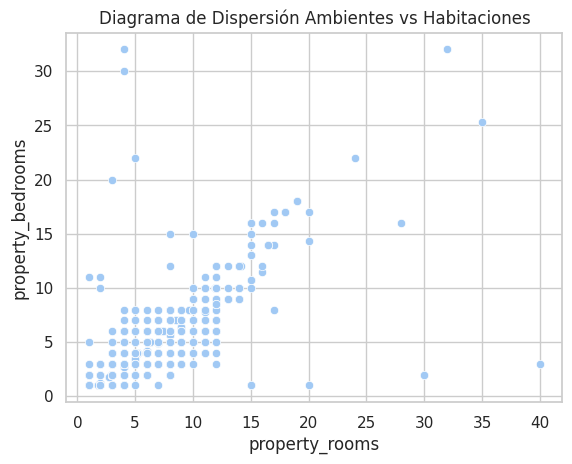

In [ ]:
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones")
plt.show()

En base a la correlación podemos ver claramente los outliers en el scatterplot.  

In [ ]:
ds_train[(ds_train['property_rooms'] > 17) & (ds_train['property_bedrooms'] < 5)]

id  start_date    end_date created_on  \
211468  6V2uE1M2Q2i4YsykmLoazw==  2021-11-16  9999-12-31 2021-11-16   
52157   HwHiC1DJIxRAjUAOmujXsg==  2021-02-07  2021-06-15 2021-02-07   
21009   bmop3OsDu5kJmbAVgJ5wzA==  2021-03-15  2021-06-05 2021-03-15   
356618  +e6yeZZqYElYRYq4/cd9qg==  2021-11-18  2021-12-02 2021-11-18   

          latitud   longitud           place_l3 property_type  property_rooms  \
211468 -34.618153 -58.362615      Puerto Madero  Departamento            20.0   
52157  -34.649872 -58.483012  Parque Avellaneda            PH            30.0   
21009  -34.616391 -58.456038          Caballito  Departamento            30.0   
356618 -34.588742 -58.422459            Palermo  Departamento            40.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
211468                1.0                    37.0                      31.0   
52157                 2.0                    72.0                      60.0   
21009                 2.0                    79.0                      79.0   
356618                3.0                    75.0                      68.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
211468        350000.0            -0.833164             -0.833164  
52157         123500.0             0.085239              0.085239  
21009         230000.0             0.085239              0.085239  
356618        145000.0             1.003642              1.003642

Viendo la relación entre ambientes y habitaciones en estos casos en especifico podemos asumir que el error es de tipeo. Reemplazamos las variables.

In [ ]:
condition = (ds_train['property_rooms'] > 17) & (ds_train['property_bedrooms'] < 5)
ds_train.loc[condition, 'property_rooms'] /= 10


In [ ]:
# Analizamos los otros outliers que se ven en el gráfico
ds_train[(ds_train['property_rooms'] < 5) & (ds_train['property_bedrooms'] >= 5)]

id  start_date    end_date created_on  \
258718  k8B5YFFJR/qAum7Vo/NTlg==  2021-11-03  2022-01-27 2021-11-03   
336451  FlzfC9jJJq01vtNEXDc7XQ==  2021-07-21  2022-02-09 2021-07-21   
381557  Hz71wQT60Hr3Lup+8/g+Dw==  2021-07-08  2021-07-17 2021-07-08   
385730  qgnjg2cQkLeAALjoJhJl1g==  2021-02-10  2021-03-25 2021-02-10   
276086  26ynaivxGjWUJwbcP5zKfg==  2021-12-23  2022-01-27 2021-12-23   
54021   hGQM/Ul+C0II9otOEBQnsA==  2021-09-22  2022-02-09 2021-09-22   
432156  bNrkEmRn2xrrFxVfXkhZ3A==  2021-12-16  2022-02-09 2021-12-16   
97734   +0qsKtd+p5A+2Et160DASw==  2021-11-25  2022-01-27 2021-11-25   
48279   r3sXlEIiCgBG5TtUkN93mw==  2021-03-14  2021-06-05 2021-03-14   
171569  zKrvUbrB7p50rDDxMp2yrw==  2021-04-19  2021-06-05 2021-04-19   
123725  h0fOMIAlpk6v/IWJFmjTLg==  2021-08-04  2022-02-09 2021-08-04   
36421   VoyodCc8rftOZHr4TeYcpw==  2021-09-21  2022-02-03 2021-09-21   
86014   pVG9sES9De/1eQ+tB90NjQ==  2021-03-26  2021-06-05 2021-03-26   
428097  5Q58aJJXojGC5f6ryqbJjw==  2021-12-16  2022-02-09 2021-12-16   
399560  qlMqnmUjGt7quE+h6uWNng==  2021-02-13  2021-05-31 2021-02-13   
304227  KnJPz4T2aLzhbWY8pjenWg==  2021-04-15  2021-04-16 2021-04-15   
158419  MhpIRj/S1WElERJxfCx6Lg==  2021-05-26  2021-06-05 2021-05-26   
27849   indoHQClfn3r0gDuKdqgLQ==  2021-12-03  2022-01-27 2021-12-03   
340427  uP+f4jupr3E/oT2T1TNTkg==  2021-09-28  2022-02-09 2021-09-28   
84147   fMWvtL8AM9C46nTizyJ0SQ==  2021-02-05  2021-03-25 2021-02-05   
41088   ngtAPqtsUhn8Y9+r/FgteA==  2021-07-19  9999-12-31 2021-07-19   
336275  3SWFBziGzgsAiLOjdK3MVw==  2021-07-21  2021-07-31 2021-07-21   
428691  wSKhYtj6JNFLu/pGuE4bbQ==  2021-12-16  2022-02-09 2021-12-16   

          latitud   longitud           place_l3 property_type  property_rooms  \
258718 -34.603809 -58.461512   Villa Pueyrredón            PH             3.0   
336451 -34.601997 -58.383625        San Nicolás  Departamento             4.0   
381557 -34.610394 -58.408642          Balvanera  Departamento             4.0   
385730 -34.623053 -58.447006          Caballito  Departamento             4.0   
276086 -34.639591 -58.442952   Parque Chacabuco            PH             3.0   
54021  -34.605454 -58.506832       Villa Devoto  Departamento             4.0   
432156 -34.650316 -58.481964  Parque Avellaneda            PH             4.0   
97734  -34.598309 -58.379852             Retiro  Departamento             1.0   
48279  -34.608645 -58.485619   Villa del Parque  Departamento             4.0   
171569 -34.617993 -58.361880      Puerto Madero  Departamento             4.0   
123725 -34.607034 -58.382298        San Nicolás  Departamento             4.0   
36421  -34.576061 -58.421289            Palermo  Departamento             3.0   
86014  -34.591110 -58.400685           Recoleta  Departamento             4.0   
428097 -34.595668 -58.389490           Recoleta  Departamento             4.0   
399560 -34.601997 -58.383625        San Nicolás  Departamento             4.0   
304227 -34.568785 -58.457129           Belgrano  Departamento             1.0   
158419 -34.639591 -58.442952   Parque Chacabuco            PH             3.0   
27849  -34.592121 -58.401069           Recoleta  Departamento             2.0   
340427 -34.621660 -58.381734       Constitución            PH             4.0   
84147  -34.614128 -58.437675          Caballito  Departamento             4.0   
41088  -34.614573 -58.480650   Villa del Parque  Departamento             2.0   
336275 -34.595668 -58.389490           Recoleta  Departamento             4.0   
428691 -34.613152 -58.454014          Caballito            PH             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
258718                6.0                   232.0                148.979178   
336451                6.0                   284.0                284.000000   
381557                5.0                   147.0                137.000000   
385730                5.0                   145.0               

In [ ]:
# Caso sin sentido: más habitaciones que ambientes, más superficie cubierta que total y el z_score sea mayor al umbral aceptable.
condition= (ds_train['property_rooms'] < ds_train['property_bedrooms']) & (ds_train['z_property_bedrooms'] > 3.5) & (ds_train['property_surface_covered'] > ds_train['property_surface_total'])
ds_train[condition]

id  start_date    end_date created_on    latitud  \
41088  ngtAPqtsUhn8Y9+r/FgteA==  2021-07-19  9999-12-31 2021-07-19 -34.614573   

       longitud          place_l3 property_type  property_rooms  \
41088 -58.48065  Villa del Parque  Departamento             2.0   

       property_bedrooms  property_surface_total  property_surface_covered  \
41088               11.0                    14.0                      35.0   

       property_price  z_property_bedrooms  zm_property_bedrooms  
41088         95000.0             8.350866              8.350866

In [ ]:
# Eliminamos outlier por indice
id_outlier = ds_train[condition].index
ds_train.drop(id_outlier,inplace=True)

<ipython-input-479-3b723bcbada7>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



reemplazos PENDIENTE

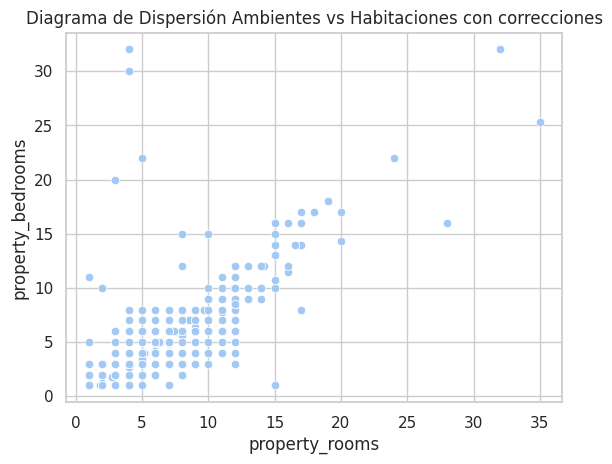

In [ ]:
# Visualización después de correcciones
sns.scatterplot(y=ds_train["property_bedrooms"], x=ds_train["property_rooms"])
plt.title("Diagrama de Dispersión Ambientes vs Habitaciones con correcciones")
plt.show()


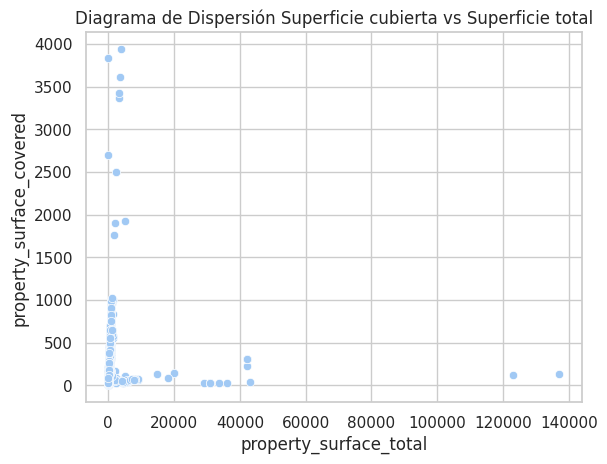

In [ ]:
sns.scatterplot(y=ds_train["property_surface_covered"], x=df["property_surface_total"])
plt.title("Diagrama de Dispersión Superficie cubierta vs Superficie total")
plt.show()

En primer lugar, vamos a distinguir los casos triviales donde la superficie cubierta es mayor a la superficie total.

Vamos a ignorar aquellos que sean del tipo casa ya que prácticas deceptivas de promoción de propiedades pueden generar éste tipo de datos. Por ejemplo, una casa con varios pisos en un terreno pequeño. Éste tipo de casos no puede ser posible en los departamentos. (Se ignorará solo en este analisis trivial)

In [ ]:
# Casos donde la superficie cubierta es mayor a la total
ds_train[(ds_train['property_surface_total'] < ds_train['property_surface_covered']) & (ds_train['property_type'] != 'Casa')]

id  start_date    end_date created_on  \
264632  tQWEYBW7MYM+1Us0MP7L9w==  2021-02-26  2021-06-05 2021-02-26   
185064  4VSgMPv37iUrWBY8HYH+Uw==  2021-06-06  2021-06-17 2021-06-06   
27569   JUQH31OSbyvBkW/2fwkOcw==  2021-12-03  2022-01-27 2021-12-03   
279185  LdP8hoW3xbpbKlaG0MmhPA==  2021-10-21  2022-01-18 2021-10-21   
344228  FLLCgE7bE8xeEQtQPNCqvQ==  2021-12-02  2022-01-27 2021-12-02   
...                          ...         ...         ...        ...   
26012   wWZ3DhHIW9gj1TtG74bNNg==  2021-06-24  2021-06-30 2021-06-24   
3954    fYUUpvt66QtbS9cbfRvOxg==  2021-02-20  2022-05-23 2021-02-20   
55022   OkfqSBCPmShtyiu+tKfo0w==  2021-01-11  2021-01-19 2021-01-11   
149140  ZMmONWXFs+RrNbPFGfOZEg==  2021-05-12  2021-06-05 2021-05-12   
288906  P6MkhXP67H4ol1Oqr6tzng==  2021-02-25  2021-03-08 2021-02-25   

          latitud   longitud       place_l3 property_type  property_rooms  \
264632 -34.560800 -58.483016  Villa Urquiza  Departamento             3.0   
185064 -34.593390 -58.415588        Palermo  Departamento             2.0   
27569  -34.581136 -58.440411        Palermo  Departamento             3.0   
279185 -34.597716 -58.448322   Villa Crespo  Departamento             3.0   
344228 -34.597315 -58.388163       Recoleta            PH             4.0   
...           ...        ...            ...           ...             ...   
26012  -34.562956 -58.467425       Belgrano  Departamento             4.0   
3954   -34.600260 -58.379689    San Nicolás  Departamento             2.0   
55022  -34.578823 -58.412058        Palermo  Departamento             2.0   
149140 -34.578854 -58.413613        Palermo  Departamento             2.0   
288906 -34.567172 -58.430634        Palermo  Departamento             5.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
264632                2.0                    65.0                 72.412509   
185064                1.0                    32.0                 38.560892   
27569                 2.0                    60.0                 70.624537   
279185                2.0                    64.0                 72.054915   
344228                2.0                    70.0                 75.000000   
...                   ...                     ...                       ...   
26012                 3.0                    80.0                 99.827427   
3954                  1.0                    42.0                 42.136836   
55022                 1.0                    40.0                 41.421647   
149140                1.0                    33.0                 38.918486   
288906                4.0                   377.0                400.000000   

        property_price  z_property_bedrooms  zm_property_bedrooms  
264632        165000.0             0.085239              0.085239  
185064         80000.0            -0.833164             -0.833164  
27569         159000.0             0.085239              0.085239  
279185        103000.0             0.085239              0.085239  
344228        180000.0             0.085239              0.085239  
...                ...                  ...                   ...  
26012         238000.0             1.003642              1.003642  
3954          105000.0            -0.833164             -0.833164  
55022         135000.0            -0.833164             -0.833164  
149140         89900.0            -0.833164             -0.833164  
288906       3200000.0             1.922045              1.922045  

[921 rows x 15 columns]

### **Isolation forest**

In [ ]:
# Cargo los datos
X =ds_train.copy()
X.head()

id  start_date    end_date created_on  \
308580  2tDcWrPW06OU2VTLqlOaBw==  2021-04-28  2021-05-01 2021-04-28   
368781  y3AnoNhKDUkaPR22VUfb3Q==  2021-05-06  2021-06-05 2021-05-06   
449679  SZLiwyscxtmDnQUa+AgGpQ==  2021-12-16  2022-02-09 2021-12-16   
428026  QOOeCO6nYiu9hgF66L7n7Q==  2021-12-16  2022-02-09 2021-12-16   
137647  u74hGoL0NcwJtn6RvwikCg==  2021-01-22  2021-03-08 2021-01-22   

          latitud   longitud  place_l3 property_type  property_rooms  \
308580 -34.582632 -58.421627   Palermo  Departamento             4.0   
368781 -34.562958 -58.446183  Belgrano  Departamento             3.0   
449679 -34.592420 -58.384979    Retiro  Departamento             4.0   
428026 -34.598637 -58.389624  Recoleta  Departamento             3.0   
137647 -34.591705 -58.395967  Recoleta  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
308580                3.0                    75.0                      74.0   
368781                2.0                   171.0                     171.0   
449679                3.0                    90.0                      90.0   
428026                2.0                    68.0                      61.0   
137647                3.0                   106.0                     106.0   

        property_price  z_property_bedrooms  zm_property_bedrooms  
308580        165000.0             1.003642              1.003642  
368781       1200000.0             0.085239              0.085239  
449679        210000.0             1.003642              1.003642  
428026        170000.0             0.085239              0.085239  
137647        360000.0             1.003642              1.003642

In [ ]:
# Limpio el dataset
X.drop(columns=['latitud', 'longitud', 'created_on', 'end_date', 'start_date', 'z_property_bedrooms', 'zm_property_bedrooms'], inplace=True)
X.head()

id  place_l3 property_type  property_rooms  \
308580  2tDcWrPW06OU2VTLqlOaBw==   Palermo  Departamento             4.0   
368781  y3AnoNhKDUkaPR22VUfb3Q==  Belgrano  Departamento             3.0   
449679  SZLiwyscxtmDnQUa+AgGpQ==    Retiro  Departamento             4.0   
428026  QOOeCO6nYiu9hgF66L7n7Q==  Recoleta  Departamento             3.0   
137647  u74hGoL0NcwJtn6RvwikCg==  Recoleta  Departamento             4.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
308580                3.0                    75.0                      74.0   
368781                2.0                   171.0                     171.0   
449679                3.0                    90.0                      90.0   
428026                2.0                    68.0                      61.0   
137647                3.0                   106.0                     106.0   

        property_price  
308580        165000.0  
368781       1200000.0  
449679        210000.0  
428026        170000.0  
137647        360000.0

In [ ]:
# Label encoding de los nombres de las ciudades y el tipo de propiedad

label_encoder = LabelEncoder()
X['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
ds_train['place_encoded'] = label_encoder.fit_transform(X['place_l3'])
X['type_encoded'] = label_encoder.fit_transform(X['property_type'])
ds_train['type_encoded'] = label_encoder.fit_transform(X['place_l3'])

X

<ipython-input-485-64ff5b082a66>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-485-64ff5b082a66>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



id      place_l3 property_type  property_rooms  \
308580  2tDcWrPW06OU2VTLqlOaBw==       Palermo  Departamento             4.0   
368781  y3AnoNhKDUkaPR22VUfb3Q==      Belgrano  Departamento             3.0   
449679  SZLiwyscxtmDnQUa+AgGpQ==        Retiro  Departamento             4.0   
428026  QOOeCO6nYiu9hgF66L7n7Q==      Recoleta  Departamento             3.0   
137647  u74hGoL0NcwJtn6RvwikCg==      Recoleta  Departamento             4.0   
...                          ...           ...           ...             ...   
266136  gPAeY72eMPRwWnKUGmpV8Q==       Almagro  Departamento             3.0   
212646  +7jikm4C77ZqcOtfGpaWXg==      Belgrano  Departamento             2.0   
34826   HasIklIrRuGL0scsyIHSTA==    Colegiales  Departamento             1.0   
263867  uGfK8507dYdwzzaXP+bTyw==         Nuñez  Departamento             3.0   
254773  5OBAnzFRi0UA8ky2jHVpvQ==  Villa Devoto  Departamento             3.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
308580                3.0                    75.0                      74.0   
368781                2.0                   171.0                     171.0   
449679                3.0                    90.0                      90.0   
428026                2.0                    68.0                      61.0   
137647                3.0                   106.0                     106.0   
...                   ...                     ...                       ...   
266136                2.0                    63.0                      57.0   
212646                1.0                    43.0                      43.0   
34826                 1.0                    36.0                      36.0   
263867                2.0                   104.0                      94.0   
254773                2.0                    55.0                      55.0   

        property_price  place_encoded  type_encoded  
308580        165000.0             26             1  
368781       1200000.0              6             1  
449679        210000.0             36             1  
428026        170000.0             35             1  
137647        360000.0             35             1  
...                ...            ...           ...  
266136        139000.0              2             1  
212646        136000.0              6             1  
34826          95000.0             14             1  
263867        410000.0             24             1  
254773        130000.0             46             1  

[72220 rows x 10 columns]

In [ ]:
X.drop(columns=['place_l3', 'property_type', 'id'], inplace=True)

In [ ]:
# Creo el modelo
iforest = IsolationForest(
    n_estimators=100,
    max_samples="auto",
    contamination=0.05,
    max_features=5,
    bootstrap=False,
    n_jobs=-1,
    random_state=1,
)

# Entreno y genero la predicción
pred = iforest.fit_predict(X)

# Almaceno scores y etiquetas
X["scores"] = iforest.decision_function(X)
X["outlier_label"] = pred

# Observaciones anómalas
X[X.outlier_label == -1]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



property_rooms  property_bedrooms  property_surface_total  \
211830        4.000000                3.0                   518.0   
173878        5.000000                3.0                   300.0   
389009        8.000000                2.0                   303.0   
263308        5.190378                4.0                   398.0   
61542         6.000000                4.0                   166.0   
...                ...                ...                     ...   
263314        5.000000                3.0                   369.0   
152939        8.000000                5.0                   550.0   
288906        5.000000                4.0                   377.0   
407539        5.000000                3.0                   270.0   
239181        8.000000                7.0                   400.0   

        property_surface_covered  property_price  place_encoded  type_encoded  \
211830                     168.0       1050000.0             26             0   
173878                     300.0       2500000.0             26             1   
389009                     303.0        340000.0             17             2   
263308                     398.0        950000.0              5             0   
61542                      114.0        320000.0             56             0   
...                          ...             ...            ...           ...   
263314                     180.0        599000.0             46             0   
152939                     500.0        690000.0             29             0   
288906                     400.0       3200000.0             26             1   
407539                     270.0        149900.0             55             0   
239181                     400.0        920000.0              6             0   

          scores  outlier_label  
211830 -0.062552             -1  
173878 -0.057333             -1  
389009 -0.070625             -1  
263308 -0.084987             -1  
61542  -0.034588             -1  
...          ...            ...  
263314 -0.037560             -1  
152939 -0.122309             -1  
288906 -0.089047             -1  
407539 -0.039523             -1  
239181 -0.132299             -1  

[3611 rows x 9 columns]

In [ ]:
# Cantidad de obs. anómalas
X.outlier_label.value_counts()

outlier_label
 1    68609
-1     3611
Name: count, dtype: int64

Obtuvimos 3611 anomalías. Visualizamos.

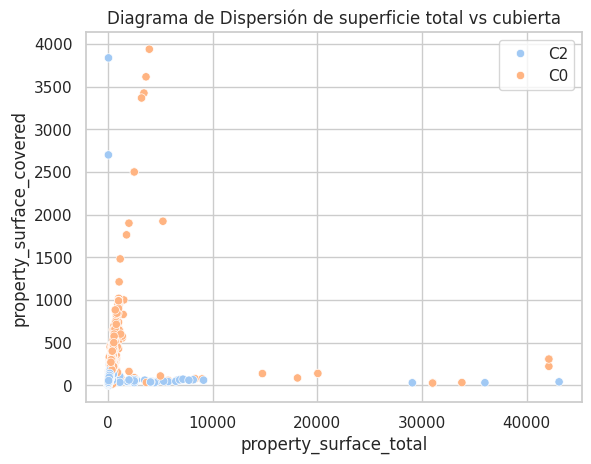

In [ ]:
# Grafico dispersograma
color = [f"C{n+1}" for n in (X["outlier_label"].values)]

sns.scatterplot(x=X["property_surface_total"], y=X["property_surface_covered"], hue=color)
plt.title("Diagrama de Dispersión de superficie total vs cubierta")
plt.show()

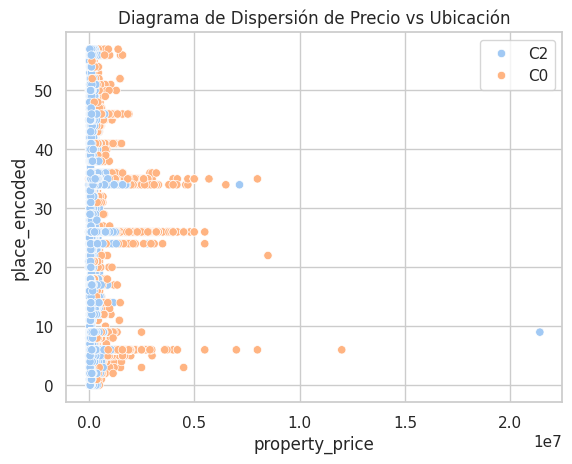

In [ ]:
sns.scatterplot(x=X["property_price"], y=X["place_encoded"], hue=color)
plt.title("Diagrama de Dispersión de Precio vs Ubicación")
plt.show()

In [ ]:
# # Selecciono el árbol
# estimator = iforest.estimators_[5]

# # Grafico
# plt.figure(figsize=(25, 25))
# sk.tree.plot_tree(estimator, feature_names=X.columns, filled=True, max_depth=3)
# plt.show()

PENDIENTE no se que hacer con estos resultados :))))

### **LOF**

Vamos a intentar detectar outliers multivariados usando LOF.

In [ ]:
def lof(df, var1, var2, name):
  # CÁLCULO
  # Conjunto de entrenamiento
  X = df[[var1, var2]].values

  # Creo el clasificador
  clf = LocalOutlierFactor(n_neighbors=20)

  # Genero prediccion
  y_pred = clf.fit_predict(X)

  # Guardo los scores
  df[name] = clf.negative_outlier_factor_

  #VISUALIZACION
  # Calculo radio para plotear score
  radius = (df[name].max() - df[name]) / (df[name].max() - df[name].min())

  # Grafico LOF
  plt.figure(figsize=(10, 10))
  plt.title("Local Outlier Factor (LOF)" + name)
  plt.scatter(
      ds_train[var1].values,
      ds_train[var2].values,
      edgecolor="grey",
      s=30,
      label="datos",
      facecolors="none",
  )
  plt.scatter(
      ds_train[var1].values,
      ds_train[var2].values,
      s=1300 * radius,
      edgecolors="red",
      facecolors="none",
      label="Outlier scores",
  )
  legend = plt.legend(loc="upper left")
  legend.legendHandles[0]._sizes = [10]
  legend.legendHandles[1]._sizes = [20]
  plt.show()
  return

#### Superficie cubierta vs superficie total

<ipython-input-492-b3a232dd2da9>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-492-b3a232dd2da9>:39: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-492-b3a232dd2da9>:40: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



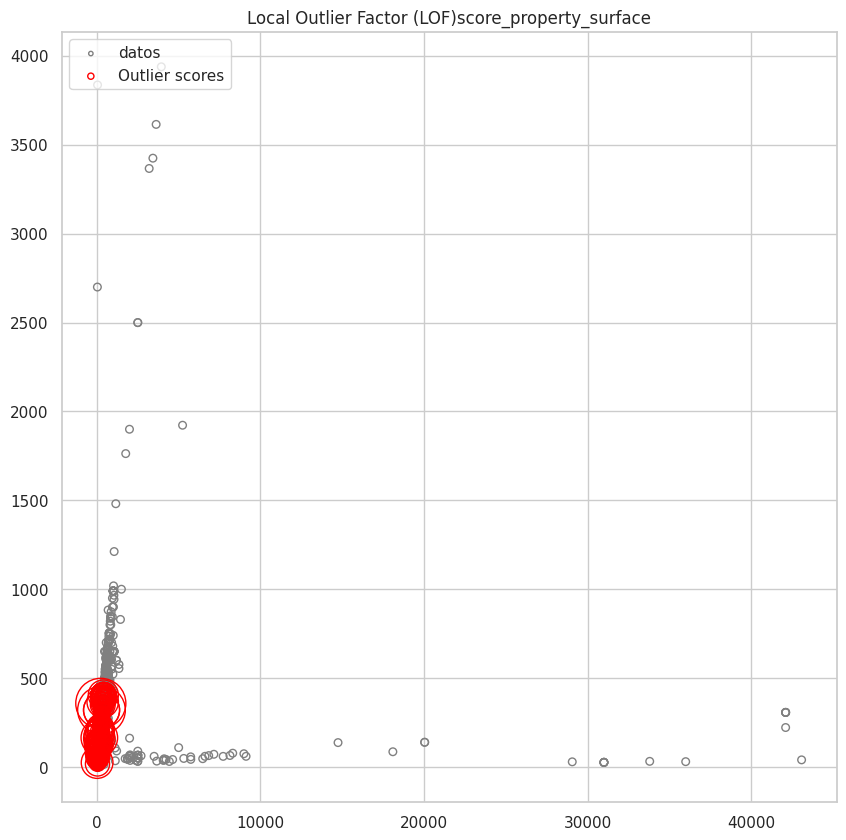

In [ ]:
lof(ds_train, 'property_surface_total', 'property_surface_covered', 'score_property_surface')

Precio vs Superficie total

<ipython-input-492-b3a232dd2da9>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-492-b3a232dd2da9>:39: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-492-b3a232dd2da9>:40: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



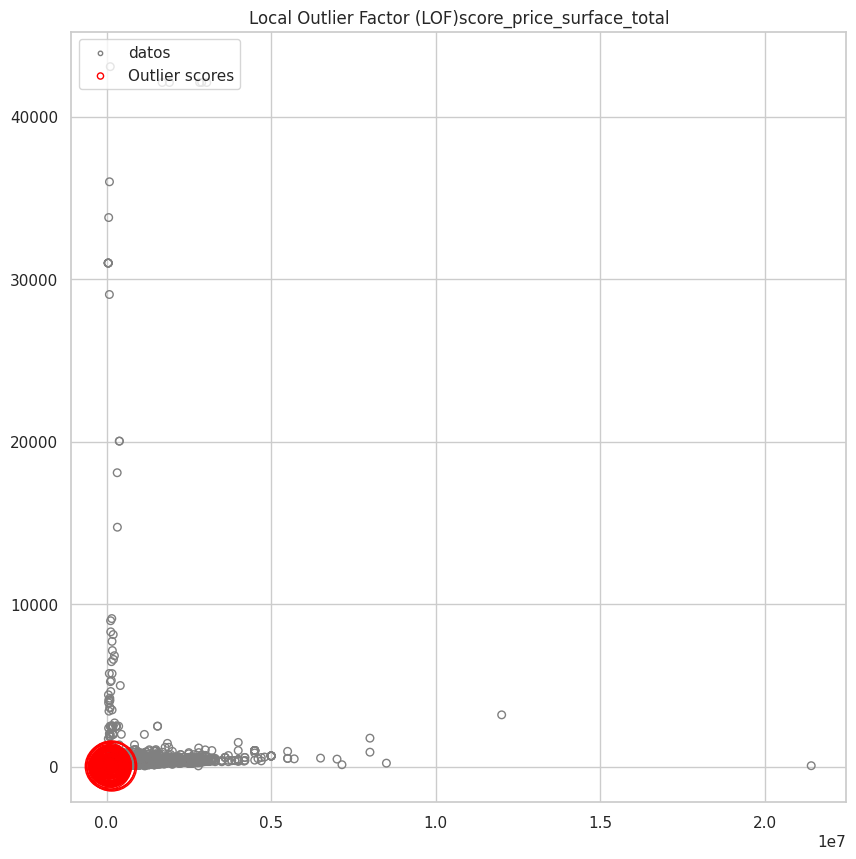

In [ ]:
lof(ds_train, 'property_price', 'property_surface_total', 'score_price_surface_total')

<ipython-input-492-b3a232dd2da9>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-492-b3a232dd2da9>:39: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-492-b3a232dd2da9>:40: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



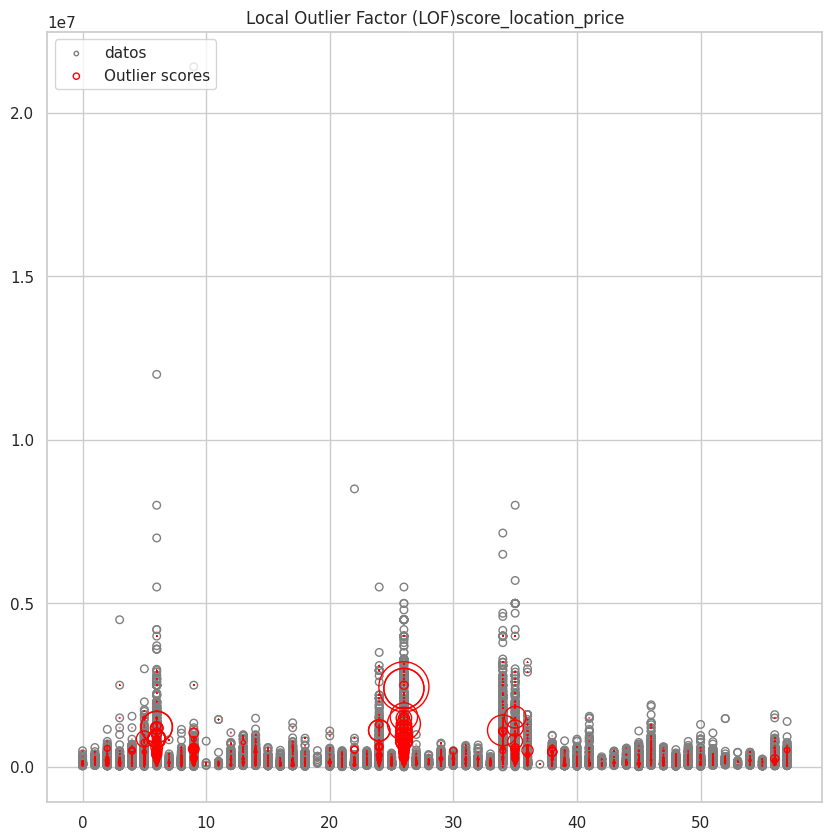

In [ ]:
lof(ds_train, 'place_encoded', 'property_price', 'score_location_price')

<ipython-input-492-b3a232dd2da9>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-492-b3a232dd2da9>:39: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.

<ipython-input-492-b3a232dd2da9>:40: MatplotlibDeprecationWarning:

The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.



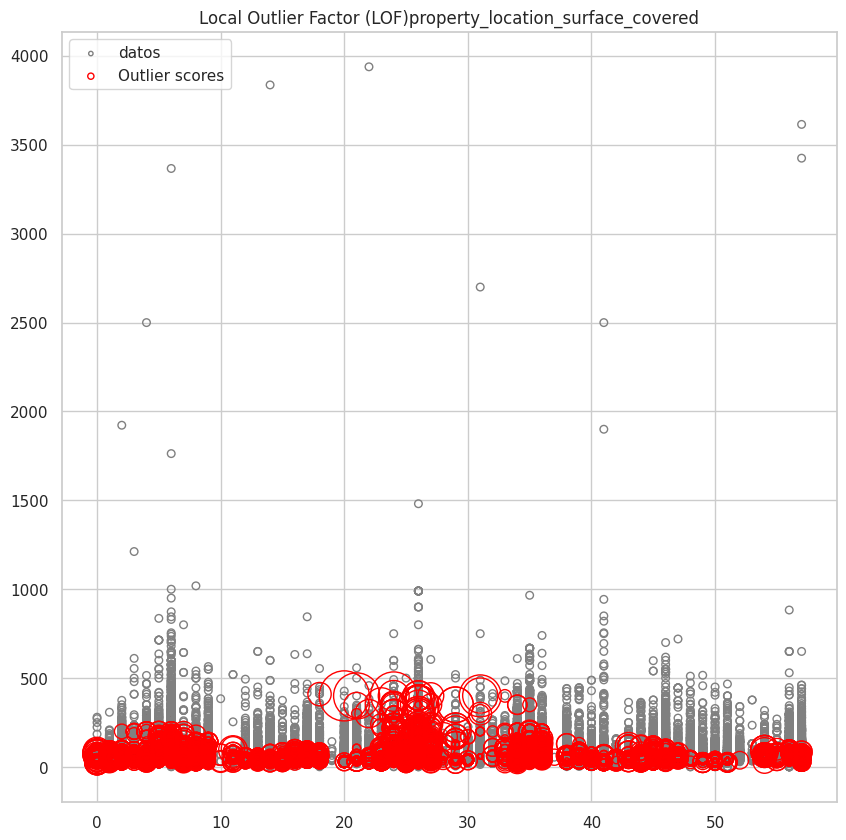

In [ ]:
lof(ds_train, 'place_encoded', 'property_surface_covered', 'property_location_surface_covered')

## Relación precio de venta-metros de superficie



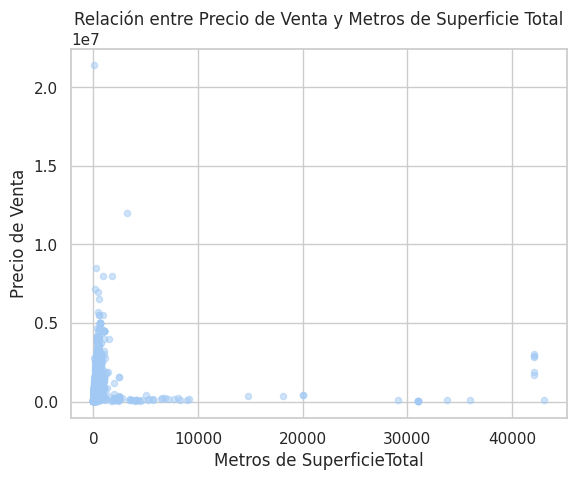

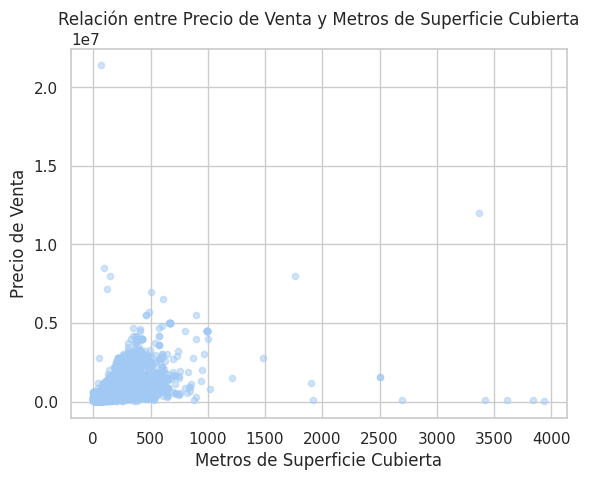

In [ ]:
ds_train.plot.scatter(x='property_surface_total', y='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Total')
plt.xlabel('Metros de SuperficieTotal')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()


ds_train.plot.scatter(x='property_surface_covered', y='property_price', alpha=0.5)
plt.title('Relación entre Precio de Venta y Metros de Superficie Cubierta')
plt.xlabel('Metros de Superficie Cubierta')
plt.ylabel('Precio de Venta')
plt.grid(True)
plt.show()

Podemos ver algunos datos atípicos donde a pesar de muchos precios de superficie, el precio es demasiado bajo, y su opuesto, precio muy alto para supercie muy limitada.

PENDIENTE

# Agrupamiento
En este punto se busca analizar si es posible agrupar los datos en función de algún criterio.

## Clustering
Analizar la tendencia al clustering del dataset.

In [ ]:
ds_train.head()

id  start_date    end_date created_on  \
308580  2tDcWrPW06OU2VTLqlOaBw==  2021-04-28  2021-05-01 2021-04-28   
368781  y3AnoNhKDUkaPR22VUfb3Q==  2021-05-06  2021-06-05 2021-05-06   
449679  SZLiwyscxtmDnQUa+AgGpQ==  2021-12-16  2022-02-09 2021-12-16   
428026  QOOeCO6nYiu9hgF66L7n7Q==  2021-12-16  2022-02-09 2021-12-16   
137647  u74hGoL0NcwJtn6RvwikCg==  2021-01-22  2021-03-08 2021-01-22   

          latitud   longitud  place_l3 property_type  property_rooms  \
308580 -34.582632 -58.421627   Palermo  Departamento             4.0   
368781 -34.562958 -58.446183  Belgrano  Departamento             3.0   
449679 -34.592420 -58.384979    Retiro  Departamento             4.0   
428026 -34.598637 -58.389624  Recoleta  Departamento             3.0   
137647 -34.591705 -58.395967  Recoleta  Departamento             4.0   

        property_bedrooms  ...  property_surface_covered  property_price  \
308580                3.0  ...                      74.0        165000.0   
368781                2.0  ...                     171.0       1200000.0   
449679                3.0  ...                      90.0        210000.0   
428026                2.0  ...                      61.0        170000.0   
137647                3.0  ...                     106.0        360000.0   

        z_property_bedrooms  zm_property_bedrooms  place_encoded  \
308580             1.003642              1.003642             26   
368781             0.085239              0.085239              6   
449679             1.003642              1.003642             36   
428026             0.085239              0.085239             35   
137647             1.003642              1.003642             35   

        type_encoded  score_property_surface  score_price_surface_total  \
308580            26           -3.500000e+09                  -1.000774   
368781             6           -1.000000e+00                  -0.973192   
449679            36           -1.000000e+00                  -1.001133   
428026            35           -1.000000e+00                  -1.002379   
137647            35           -1.000000e+00                  -0.976358   

        score_location_price  property_location_surface_covered  
308580         -1.000000e+00                      -1.000000e+00  
368781         -1.000000e+00                      -1.000000e+00  
449679         -4.000000e+09                      -3.500000e+09  
428026         -1.000000e+00                      -1.000000e+00  
137647         -1.000000e+00                      -4.774929e+08  

[5 rows x 21 columns]

Para agrupar, podemos dejar de lado la columna 'place_l3', ya que podemos completar los datos necesarios para realizar el clustering utilizando las columnas de latitud y longitud. Además, podemos eliminar la columna 'id', ya que generalmente solo sirve como un identificador único para cada fila y no es una característica relevante para el clustering. Similarmente, podemos descartar cualquier información relacionada con fechas, ya que no es necesaria para nuestro análisis de clustering.

In [ ]:
ds_cluster_train = ds_train.copy()
ds_cluster_test = ds_test.copy()

columnas_a_eliminar = ['place_l3','id','start_date','end_date','created_on']
ds_cluster_train.drop(columns = columnas_a_eliminar,inplace=True)
ds_cluster_test.drop(columns = columnas_a_eliminar,inplace=True)

In [ ]:
ds_cluster_train.head()

latitud   longitud property_type  property_rooms  property_bedrooms  \
308580 -34.582632 -58.421627  Departamento             4.0                3.0   
368781 -34.562958 -58.446183  Departamento             3.0                2.0   
449679 -34.592420 -58.384979  Departamento             4.0                3.0   
428026 -34.598637 -58.389624  Departamento             3.0                2.0   
137647 -34.591705 -58.395967  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
308580                    75.0                      74.0        165000.0   
368781                   171.0                     171.0       1200000.0   
449679                    90.0                      90.0        210000.0   
428026                    68.0                      61.0        170000.0   
137647                   106.0                     106.0        360000.0   

        z_property_bedrooms  zm_property_bedrooms  place_encoded  \
308580             1.003642              1.003642             26   
368781             0.085239              0.085239              6   
449679             1.003642              1.003642             36   
428026             0.085239              0.085239             35   
137647             1.003642              1.003642             35   

        type_encoded  score_property_surface  score_price_surface_total  \
308580            26           -3.500000e+09                  -1.000774   
368781             6           -1.000000e+00                  -0.973192   
449679            36           -1.000000e+00                  -1.001133   
428026            35           -1.000000e+00                  -1.002379   
137647            35           -1.000000e+00                  -0.976358   

        score_location_price  property_location_surface_covered  
308580         -1.000000e+00                      -1.000000e+00  
368781         -1.000000e+00                      -1.000000e+00  
449679         -4.000000e+09                      -3.500000e+09  
428026         -1.000000e+00                      -1.000000e+00  
137647         -1.000000e+00                      -4.774929e+08

<ipython-input-501-0ae634a64398>:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-501-0ae634a64398>:11: UserWarning:

The palette list has more values (10) than needed (3), which may not be intended.



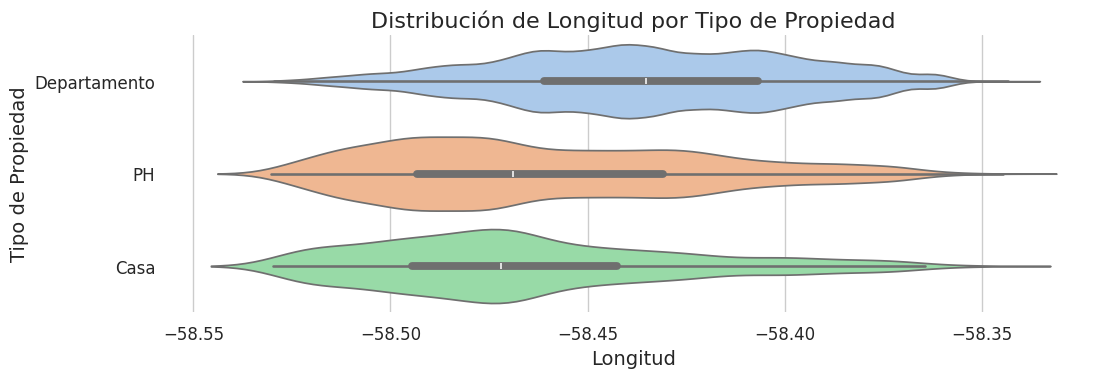

In [ ]:
# @title property_type vs longitud
# Configuración de estilo y paleta de colores
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")

# Ajuste del tamaño de la figura
figsize = (12, 1.2 * len(ds_cluster_train['property_type'].unique()))
plt.figure(figsize=figsize)

# Creación del gráfico de violín
sns.violinplot(ds_cluster_train, x='longitud', y='property_type', inner='box', palette=palette)

# Eliminación de los ejes
sns.despine(top=True, right=True, bottom=True, left=True)

# Ajustes de título y etiquetas
plt.title("Distribución de Longitud por Tipo de Propiedad", fontsize=16)
plt.xlabel("Longitud", fontsize=14)
plt.ylabel("Tipo de Propiedad", fontsize=14)

# Ajuste del tamaño de fuente de las etiquetas
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

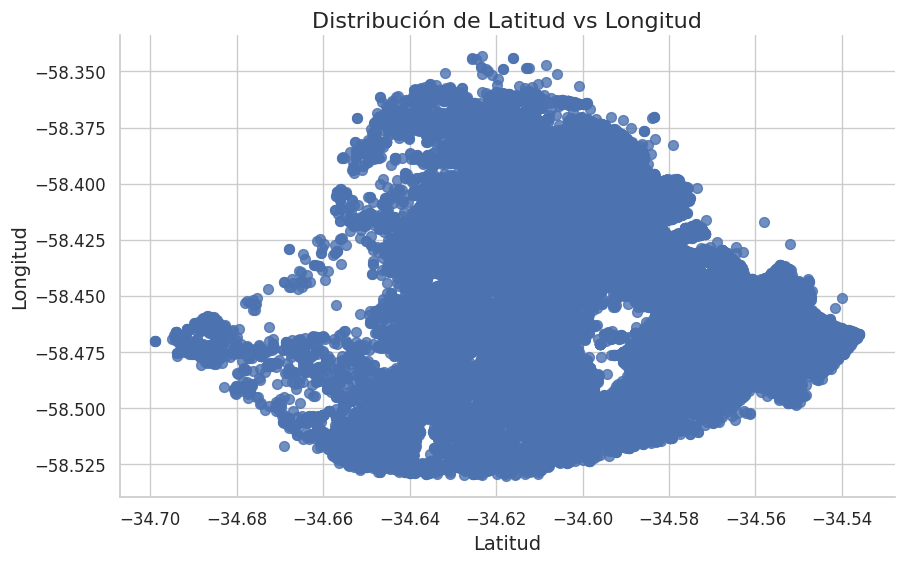

In [ ]:
# @title latitud vs longitud

# Configuración de la figura y los ejes
plt.figure(figsize=(10, 6))

# Creación del gráfico de dispersión
plt.scatter(ds_cluster_train['latitud'], ds_cluster_train['longitud'], s=50, alpha=0.8)

# Ajustes del título y etiquetas
plt.title("Distribución de Latitud vs Longitud", fontsize=16)
plt.xlabel("Latitud", fontsize=14)
plt.ylabel("Longitud", fontsize=14)

# Ocultar los ejes superior y derecho
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ajustar tamaño de fuente de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [ ]:
ds_cluster_test.head()

latitud   longitud property_type  property_rooms  property_bedrooms  \
194510 -34.582420 -58.498516  Departamento             3.0                2.0   
398572 -34.594870 -58.403794  Departamento             2.0                1.0   
92904  -34.619612 -58.374833  Departamento             3.0                1.0   
257125 -34.595069 -58.384554  Departamento             2.0                1.0   
27921  -34.619019 -58.433216  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  
194510                    54.0                      54.0        119000.0  
398572                    43.0                      32.0        125000.0  
92904                     58.0                      55.0        119000.0  
257125                    35.0                      35.0        115000.0  
27921                    147.0                     137.0        473000.0

Vamos a realizar una transformación de variables para trabajar con todos datos numéricos. En este caso, vamos a utilizar la regresión logística para la variable proterty_type

In [ ]:
ds_cluster_train = pd.get_dummies(ds_cluster_train, columns=["property_type"])
ds_cluster_train.head()

latitud   longitud  property_rooms  property_bedrooms  \
308580 -34.582632 -58.421627             4.0                3.0   
368781 -34.562958 -58.446183             3.0                2.0   
449679 -34.592420 -58.384979             4.0                3.0   
428026 -34.598637 -58.389624             3.0                2.0   
137647 -34.591705 -58.395967             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
308580                    75.0                      74.0        165000.0   
368781                   171.0                     171.0       1200000.0   
449679                    90.0                      90.0        210000.0   
428026                    68.0                      61.0        170000.0   
137647                   106.0                     106.0        360000.0   

        z_property_bedrooms  zm_property_bedrooms  place_encoded  \
308580             1.003642              1.003642             26   
368781             0.085239              0.085239              6   
449679             1.003642              1.003642             36   
428026             0.085239              0.085239             35   
137647             1.003642              1.003642             35   

        type_encoded  score_property_surface  score_price_surface_total  \
308580            26           -3.500000e+09                  -1.000774   
368781             6           -1.000000e+00                  -0.973192   
449679            36           -1.000000e+00                  -1.001133   
428026            35           -1.000000e+00                  -1.002379   
137647            35           -1.000000e+00                  -0.976358   

        score_location_price  property_location_surface_covered  \
308580         -1.000000e+00                      -1.000000e+00   
368781         -1.000000e+00                      -1.000000e+00   
449679         -4.000000e+09                      -3.500000e+09   
428026         -1.000000e+00                      -1.000000e+00   
137647         -1.000000e+00                      -4.774929e+08   

        property_type_Casa  property_type_Departamento  property_type_PH  
308580               False                        True             False  
368781               False                        True             False  
449679               False                        True             False  
428026               False                        True             False  
137647               False                        True             False

In [ ]:
ds_cluster_test = pd.get_dummies(ds_cluster_test, columns=["property_type"])
ds_cluster_test.head()

latitud   longitud  property_rooms  property_bedrooms  \
194510 -34.582420 -58.498516             3.0                2.0   
398572 -34.594870 -58.403794             2.0                1.0   
92904  -34.619612 -58.374833             3.0                1.0   
257125 -34.595069 -58.384554             2.0                1.0   
27921  -34.619019 -58.433216             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
194510                    54.0                      54.0        119000.0   
398572                    43.0                      32.0        125000.0   
92904                     58.0                      55.0        119000.0   
257125                    35.0                      35.0        115000.0   
27921                    147.0                     137.0        473000.0   

        property_type_Casa  property_type_Departamento  property_type_PH  
194510               False                        True             False  
398572               False                        True             False  
92904                False                        True             False  
257125               False                        True             False  
27921                False                        True             False

Aplico máximos y minimos para el dataset

In [ ]:
def aplicar_max_min(ds, columnas):
    scaler = MinMaxScaler()
    for columna in columnas:
        ds[[columna]] = scaler.fit_transform(ds[[columna]])

aplicar_max_min(ds_cluster_train,columnas_con_numeros)

## Grupos
Estimar la cantidad apropiada de grupos que se deben formar.

Para ello vamos a utilizar la Regla del codo (Elbow Method).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

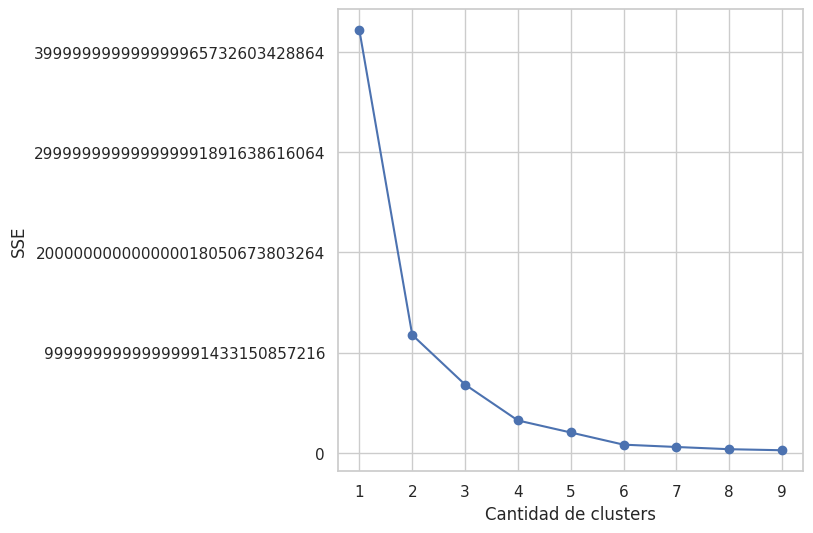

In [ ]:
# Corro el algoritmo con K entre 2 y 10 y voy guardando el error para luego graficarlo.
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(ds_cluster_train)
    sse.append(km.inertia_)

# Grafico el SSE por K
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')

# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Al ver el gráfico no tenemos un codo pronunciadamente. Entonces verificamos la cantidad de conjuntos a elegir con el método de Silhouette.

## Grupos con Silhouette <font color='red'> REVISAR </font>
Evaluar la calidad de los grupos formados realizando un análisis de Silhouette

In [ ]:
list_k = list(range(2, 6))

for n_clusters in list_k:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(ds_cluster_train)

    score = silhouette_score (ds_cluster_train, preds)
    print ("\n\nFor n_clusters =" + str(n_clusters) + " silhouette score is " + str(score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning





For n_clusters =2 silhouette score is 0.9994471459325235


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning





For n_clusters =3 silhouette score is 0.9982368947757163


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning





For n_clusters =4 silhouette score is 0.9981277074602604


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning





For n_clusters =5 silhouette score is 0.9960665988201756


## Análisis de grupo
Realizar un análisis de cada grupo intentando entender en función de qué características
fueron formados.

## Mapa de CABA
Graficar sobre un mapa de CABA los avisos coloreados según el grupo al que pertenecen.

## Análisis con tres grupos
Repetir el análisis anterior, utilizando sólo 3 grupos.